# 서울시 골목상권 탐색적 자료 분석 프로젝트

#### 메인 데이터 - 유동인구, 매출 + (상권 변화, 직장 인구, 거주 인구) (출처 - 서울 열린데이터 광장)
상권 데이터 탐색적 분석

1. 유동인구 분석
    - 구별
    - 상권별
    - 골목시장
2. 매출 분석
    - 구별
    - 직장 인구 상관관계
    - 종목별
    - 연령별
3. 유동인구와 매출 결합

In [1]:
import matplotlib.pyplot as plt

from matplotlib import pyplot

from matplotlib import font_manager

f_path = "C:\Windows\Fonts\Malgun.ttf"

font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc

rc('font', family='Malgun Gothic')

In [2]:
sns.set_style('whitegrid', {'font.family':'Malgun Gothic'})

# 1. 유동인구 데이터 분석

유동인구란?
- 서울시와 KT가 공공빅데이터와 통신데이터를 이용하여 추계한 서울의 특정지역, 특정시점에 존재하는 모든 인구

#### 서울시 유동인구 데이터 로드

In [3]:
pop = pd.read_csv("서울시 우리마을가게 상권분석서비스(상권-추정유동인구).csv", encoding='euc-kr')

#### 서울시 상권 코드 데이터 로드

In [4]:
reg = pd.read_csv("서울시 우리마을가게 상권분석서비스(상권영역).csv", encoding="euc-kr")

#### 서울시 2019년도 유동인구 & 상권 코드 데이터 결합

In [5]:
join = pd.merge(pop, reg, on="상권_코드")

#### 시군구 코드 데이터 로드

In [6]:
code = pd.read_csv("서울특별시 건축물대장 법정동 코드정보.csv", encoding='euc-kr')
code = code[["시군구코드", "시군구명"]].drop_duplicates('시군구코드', keep='first')

#### 서울시 2019년도 유동인구 & 상권 코드 & 시군구 코드 데이터 결합

In [7]:
join2 = pd.merge(join, code, left_on="시군구_코드", right_on="시군구코드")
join2["구"] = [gu[:2] if len(gu)<=3 else gu[:3] for gu in join2['시군구명']]

In [8]:
join2

기준 년코드  기준_분기_코드  상권_구분_코드  상권_구분_코드_명    상권_코드 상권_코드_명_x  총_유동인구_수  \
0        2014         1         A        골목상권  1000001       계동길    147154   
1        2014         2         A        골목상권  1000001       계동길    164593   
2        2014         3         A        골목상권  1000001       계동길    166128   
3        2014         4         A        골목상권  1000001       계동길    135676   
4        2015         1         A        골목상권  1000001       계동길    107573   
...       ...       ...       ...         ...      ...       ...       ...   
32803    2018         2         R        전통시장  1001490   길동복조리시장    212281   
32804    2018         3         R        전통시장  1001490   길동복조리시장    228878   
32805    2018         4         R        전통시장  1001490   길동복조리시장    207466   
32806    2019         1         R        전통시장  1001490   길동복조리시장    206428   
32807    2019         2         R        전통시장  1001490   길동복조리시장    220748   

       남성_유동인구_수  여성_유동인구_수  연령대_10_유동인구_수  ...  상권_구분_코드_명  상권_코드_명_y  \
0          85726      61430           3250  ...        골목상권        계동길   
1          93204      71387           5989  ...        골목상권        계동길   
2          94632      71495           5416  ...        골목상권        계동길   
3          77984      57692           3671  ...        골목상권        계동길   
4          64734      42835           2003  ...        골목상권        계동길   
...          ...        ...            ...  ...         ...        ...   
32803     103987     108300          11308  ...        전통시장    길동복조리시장   
32804     112207     116670          13844  ...        전통시장    길동복조리시장   
32805     102348     105121          10578  ...        전통시장    길동복조리시장   
32806     104505     101924          12979  ...        전통시장    길동복조리시장   
32807     108957     111792          11285  ...        전통시장    길동복조리시장   

       엑스좌표_값  와이좌표_값  시군구_코드    행정동_코드  형태정보  시군구코드  시군구명   구  
0      198799  453610   11110  11110600   NaN  11110   종로구  종로  
1      198799  453610   11110  11110600   NaN  11110   종로구  종로  
2      198799  453610   11110  11110600   NaN  11110   종로구  종로  
3      198799  453610   11110  11110600   NaN  11110   종로구  종로  
4      198799  453610   11110  11110600   NaN  11110   종로구  종로  
...       ...     ...     ...       ...   ...    ...   ...  ..  
32803  212698  448781   11740  11740685   NaN  11740   강동구  강동  
32804  212698  448781   11740  11740685   NaN  11740   강동구  강동  
32805  212698  448781   11740  11740685   NaN  11740   강동구  강동  
32806  212698  448781   11740  11740685   NaN  11740   강동구  강동  
32807  212698  448781   11740  11740685   NaN  11740   강동구  강동  

[32808 rows x 544 columns]

#### 서울시 2019년도 유동인구 & 상권 코드 & 시군구 코드 & 직장인 인구수 데이터 결합

In [9]:
work = pd.read_csv("서울시 우리마을가게 상권분석서비스(상권-직장인구).csv", encoding='euc-kr')
join3 = pd.merge(join2, work, on="상권_코드")

### 상권별 유동인구 비교
- 골목상권의 총 유동인구수가 많지만 개별 상권의 유동 인구수는 발달 상권의 1/3 수준

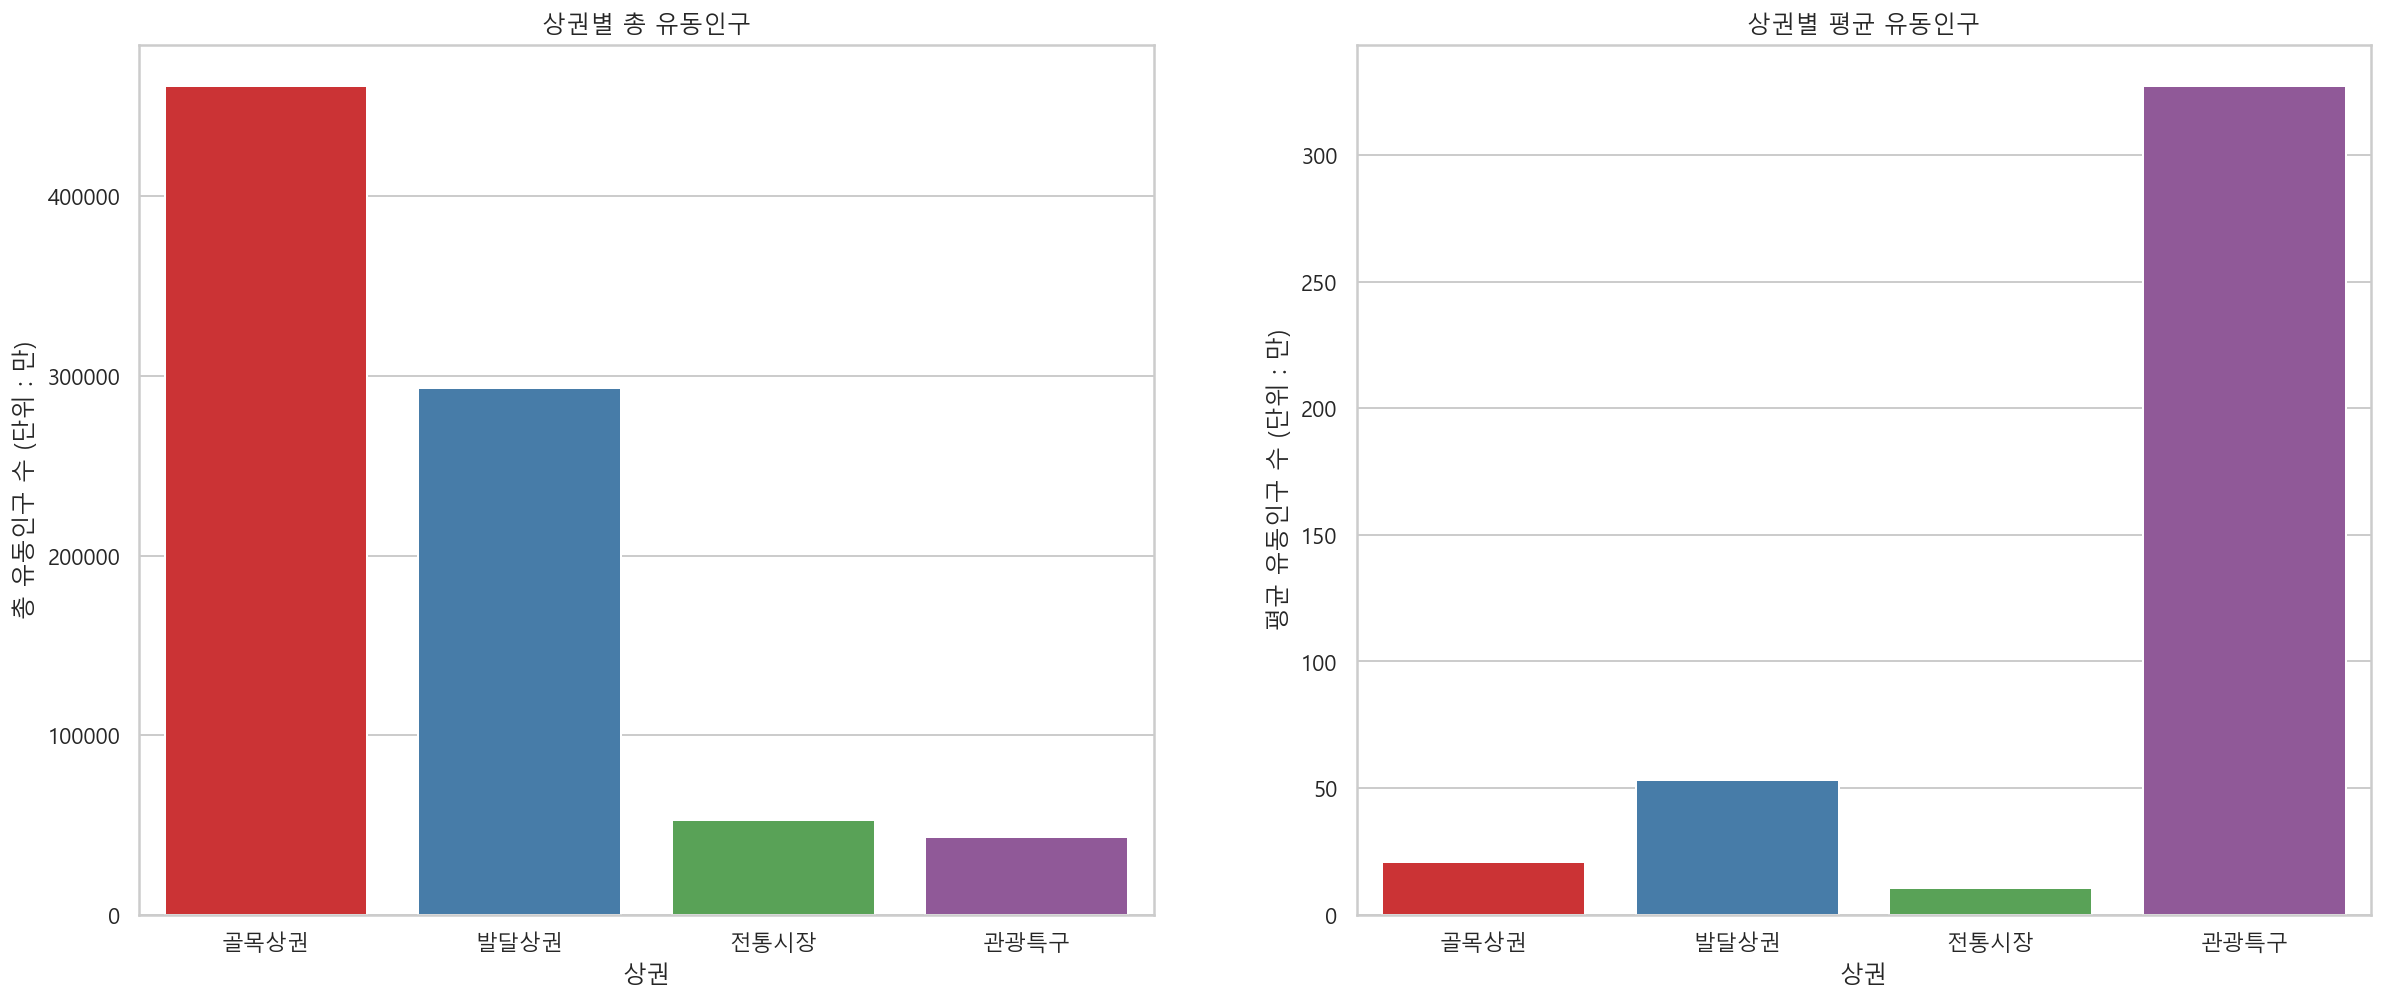

In [10]:
join2["총_유동인구_수1"] = (join2["총_유동인구_수"]/10000).round(2)

fig, ax = plt.subplots(1,2,figsize=(20, 8))

sns.barplot(x='상권_구분_코드_명', y='총_유동인구_수1', data = join2, ci = None, ax=ax[0], palette="Set1", estimator=sum).set_title("상권별 총 유동인구")
ax[0].set(xlabel="상권", ylabel = "총 유동인구 수 (단위 : 만)")

sns.barplot(x='상권_구분_코드_명', y='총_유동인구_수1', data = join2, ci = None, ax=ax[1], palette="Set1").set_title("상권별 평균 유동인구")
ax[1].set(xlabel="상권", ylabel = "평균 유동인구 수 (단위 : 만)")
plt.show()
fig.savefig("상권별 유동인구.png", dpi=200)

### 기간별 유동인구 비교
- 2016년도에 급격하게 하락하다가 점차 회복하는 추세를 보임
- 1, 4분기에 유동인구 수가 조금씩 줄어듬

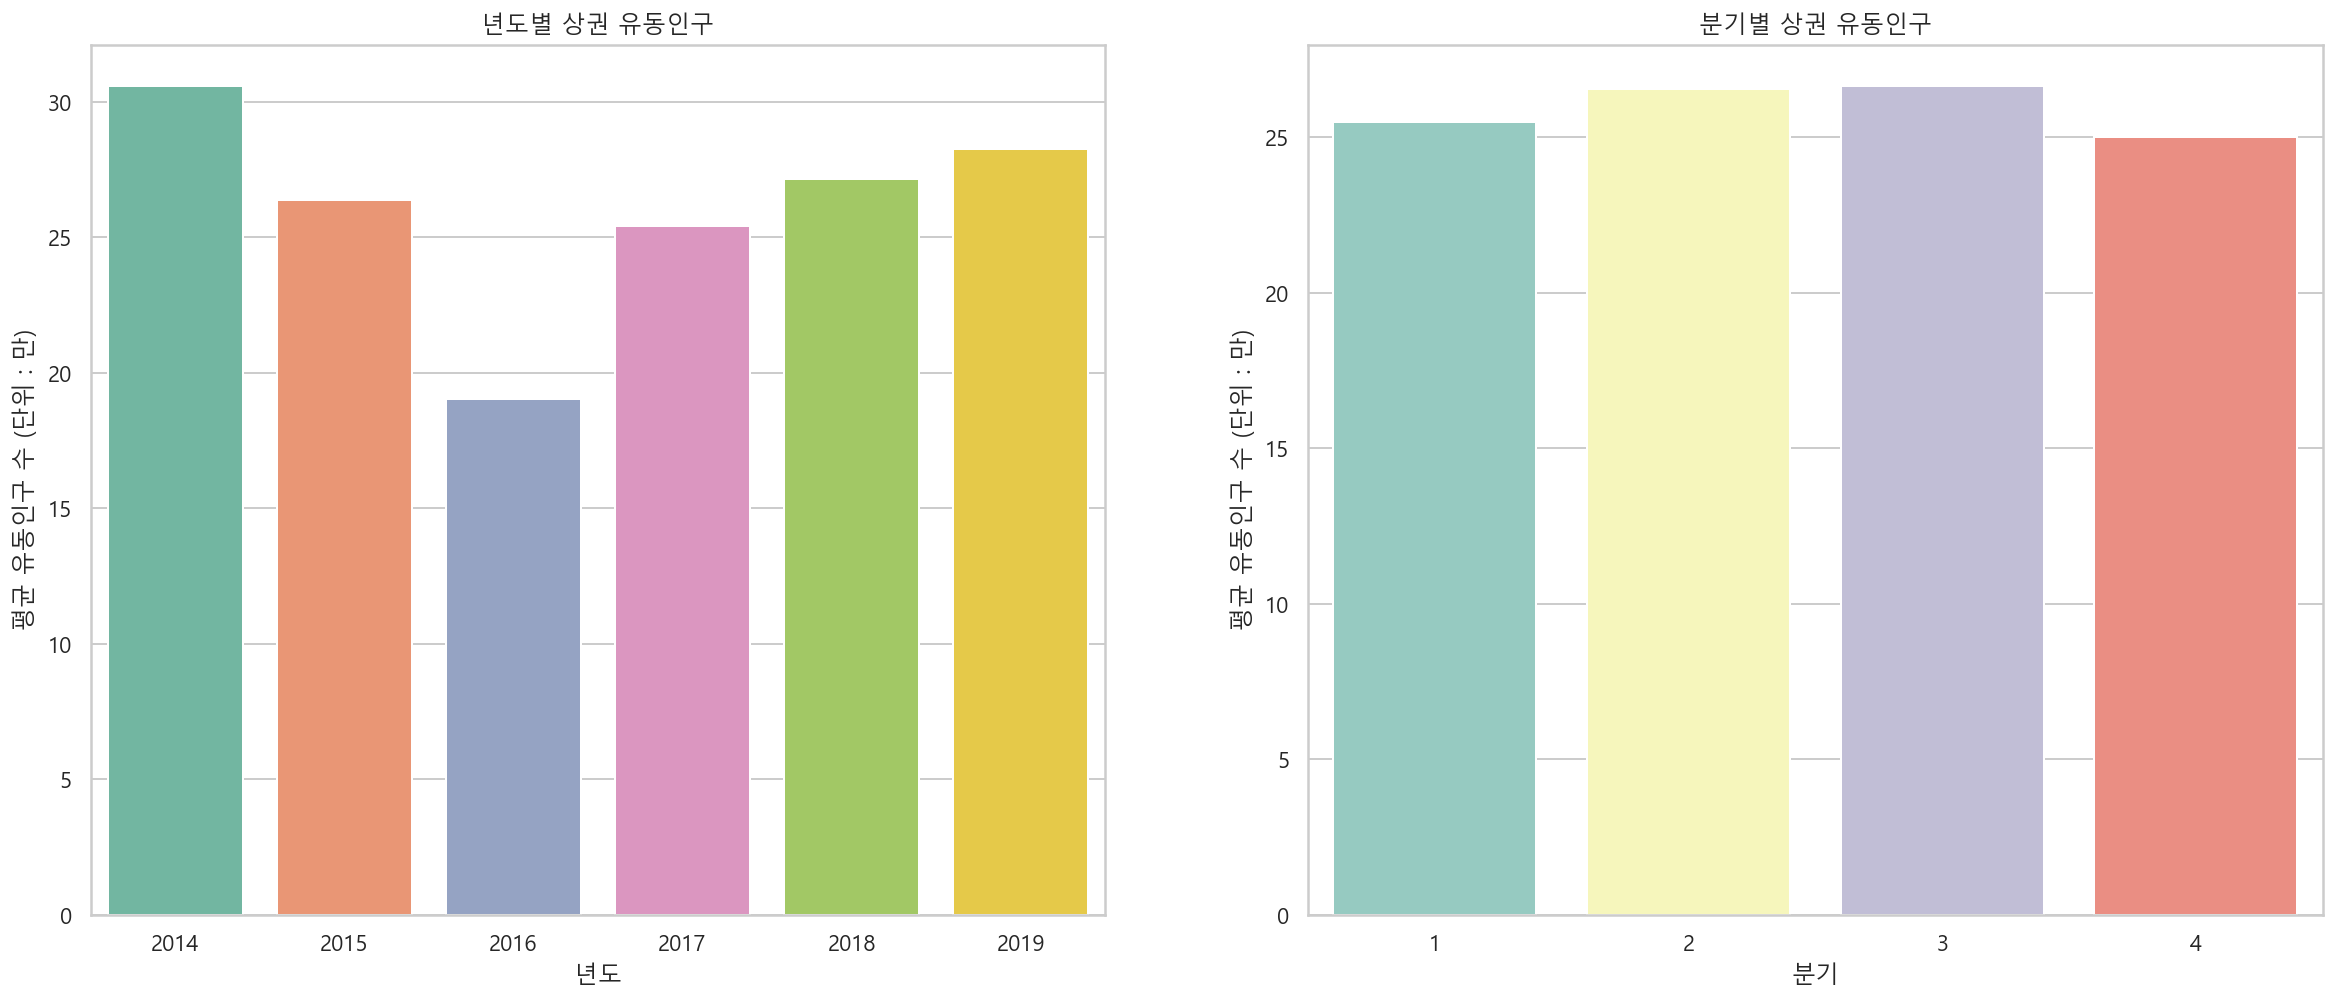

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))

sns.barplot(x='기준 년코드', y='총_유동인구_수1', data = join2, ci = None, ax=ax[0], palette="Set2").set_title("년도별 상권 유동인구")
ax[0].set(xlabel="년도", ylabel = "평균 유동인구 수 (단위 : 만)")
sns.barplot(x='기준_분기_코드', y='총_유동인구_수1', data = join2, ci = None, ax=ax[1], palette="Set3").set_title("분기별 상권 유동인구")
ax[1].set(xlabel="분기", ylabel = "평균 유동인구 수 (단위 : 만)")
plt.show()
fig.savefig("기간별 유동인구.png", dpi=200)

### 연령별 유동인구 비교
- 10대의 유동인구 수가 가장 낮고 30대를 최고점으로 점차 하락

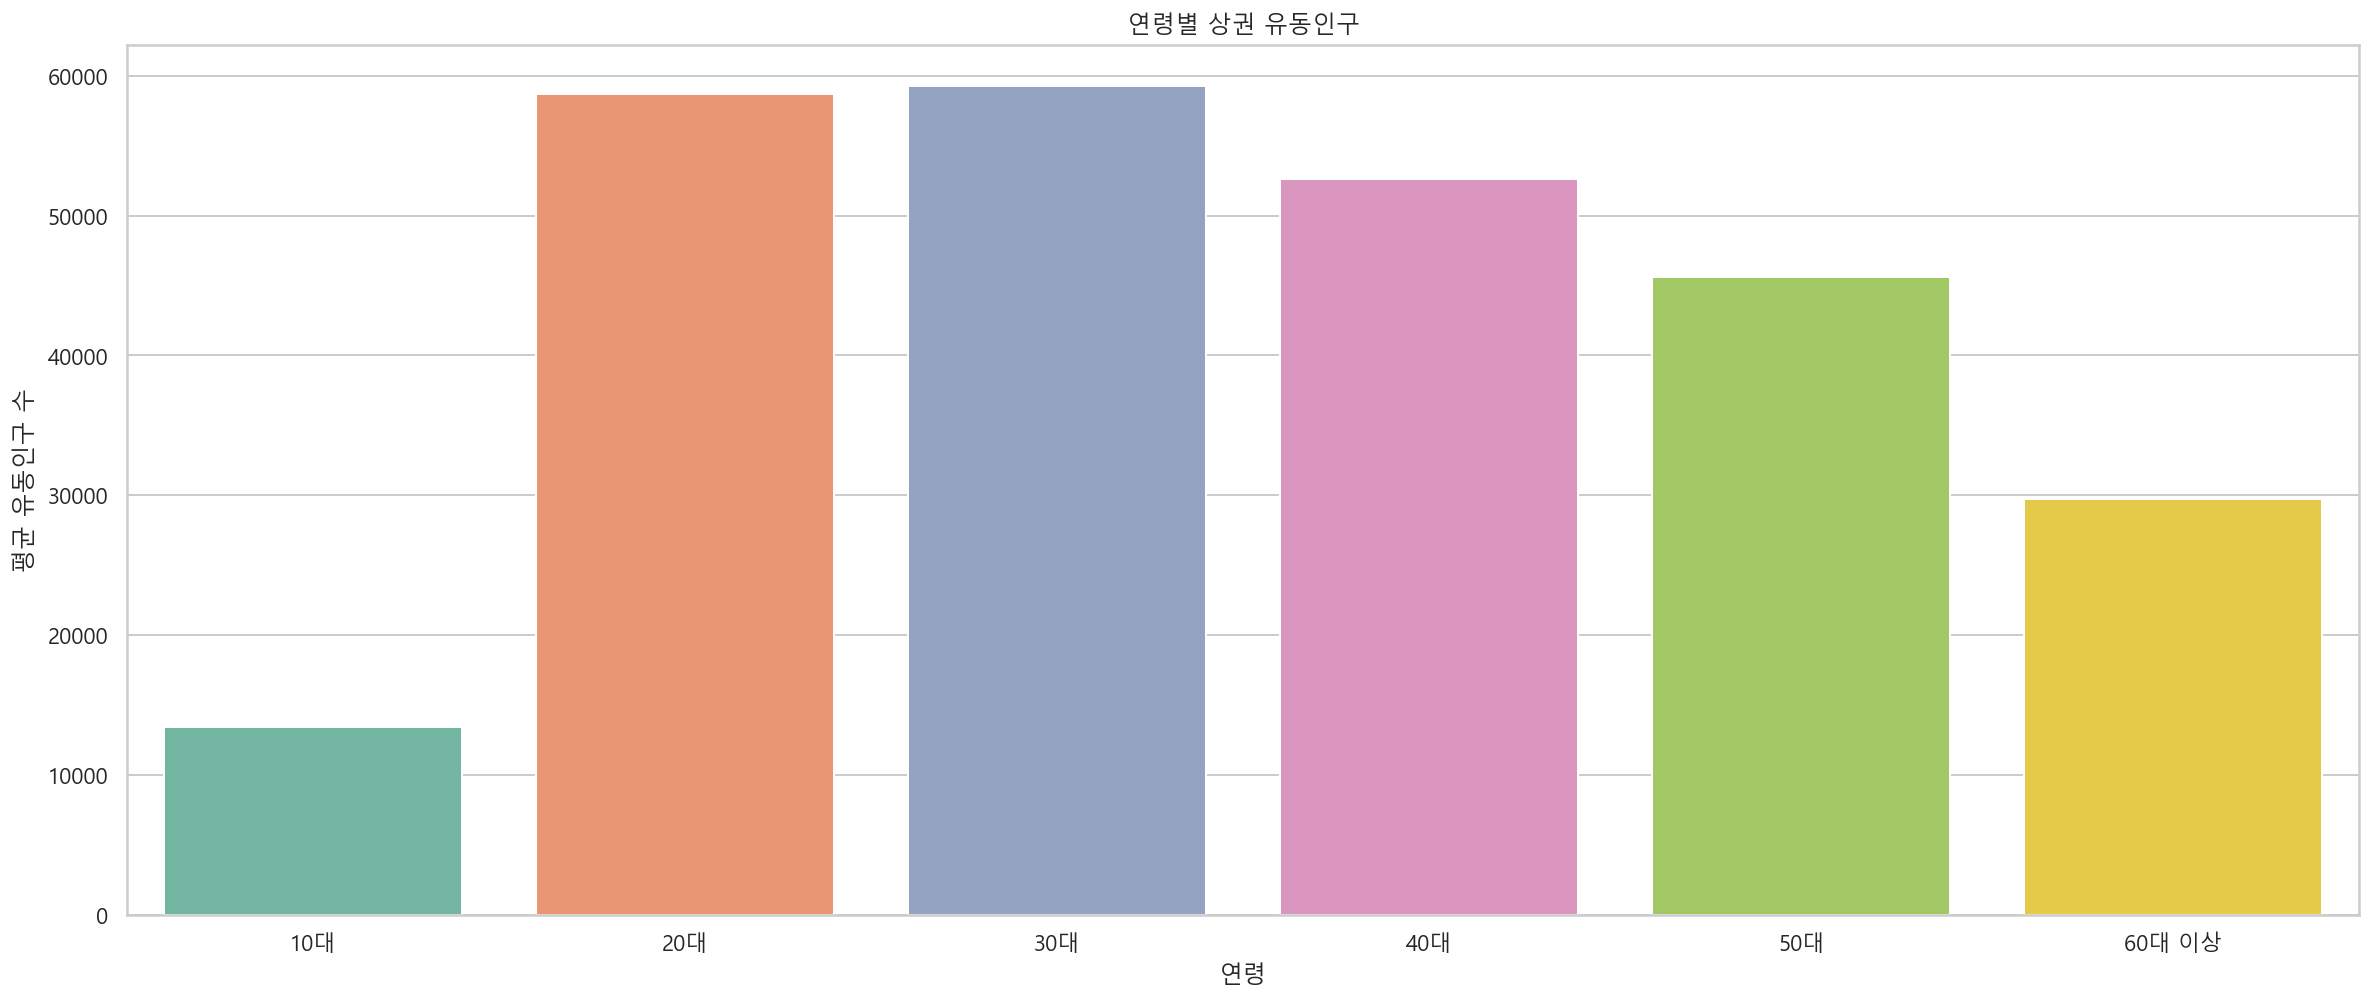

In [12]:
a2 = join2[['연령대_10_유동인구_수','연령대_20_유동인구_수','연령대_30_유동인구_수','연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수']]
a2 = a2.mean().round()
a2 = pd.DataFrame(a2).T
a2.columns = ["10대", "20대", "30대", "40대", "50대", "60대 이상"]

fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(data = a2, ci = None, palette="Set2").set_title("연령별 상권 유동인구")
ax.set(xlabel="연령", ylabel = "평균 유동인구 수")
plt.show()
fig.savefig("연령별 유동인구.png", dpi=200)

## a. 구별 유동인구 분석

### 평균 유동인구 비교
- 중구가 눈에 띄게 높음

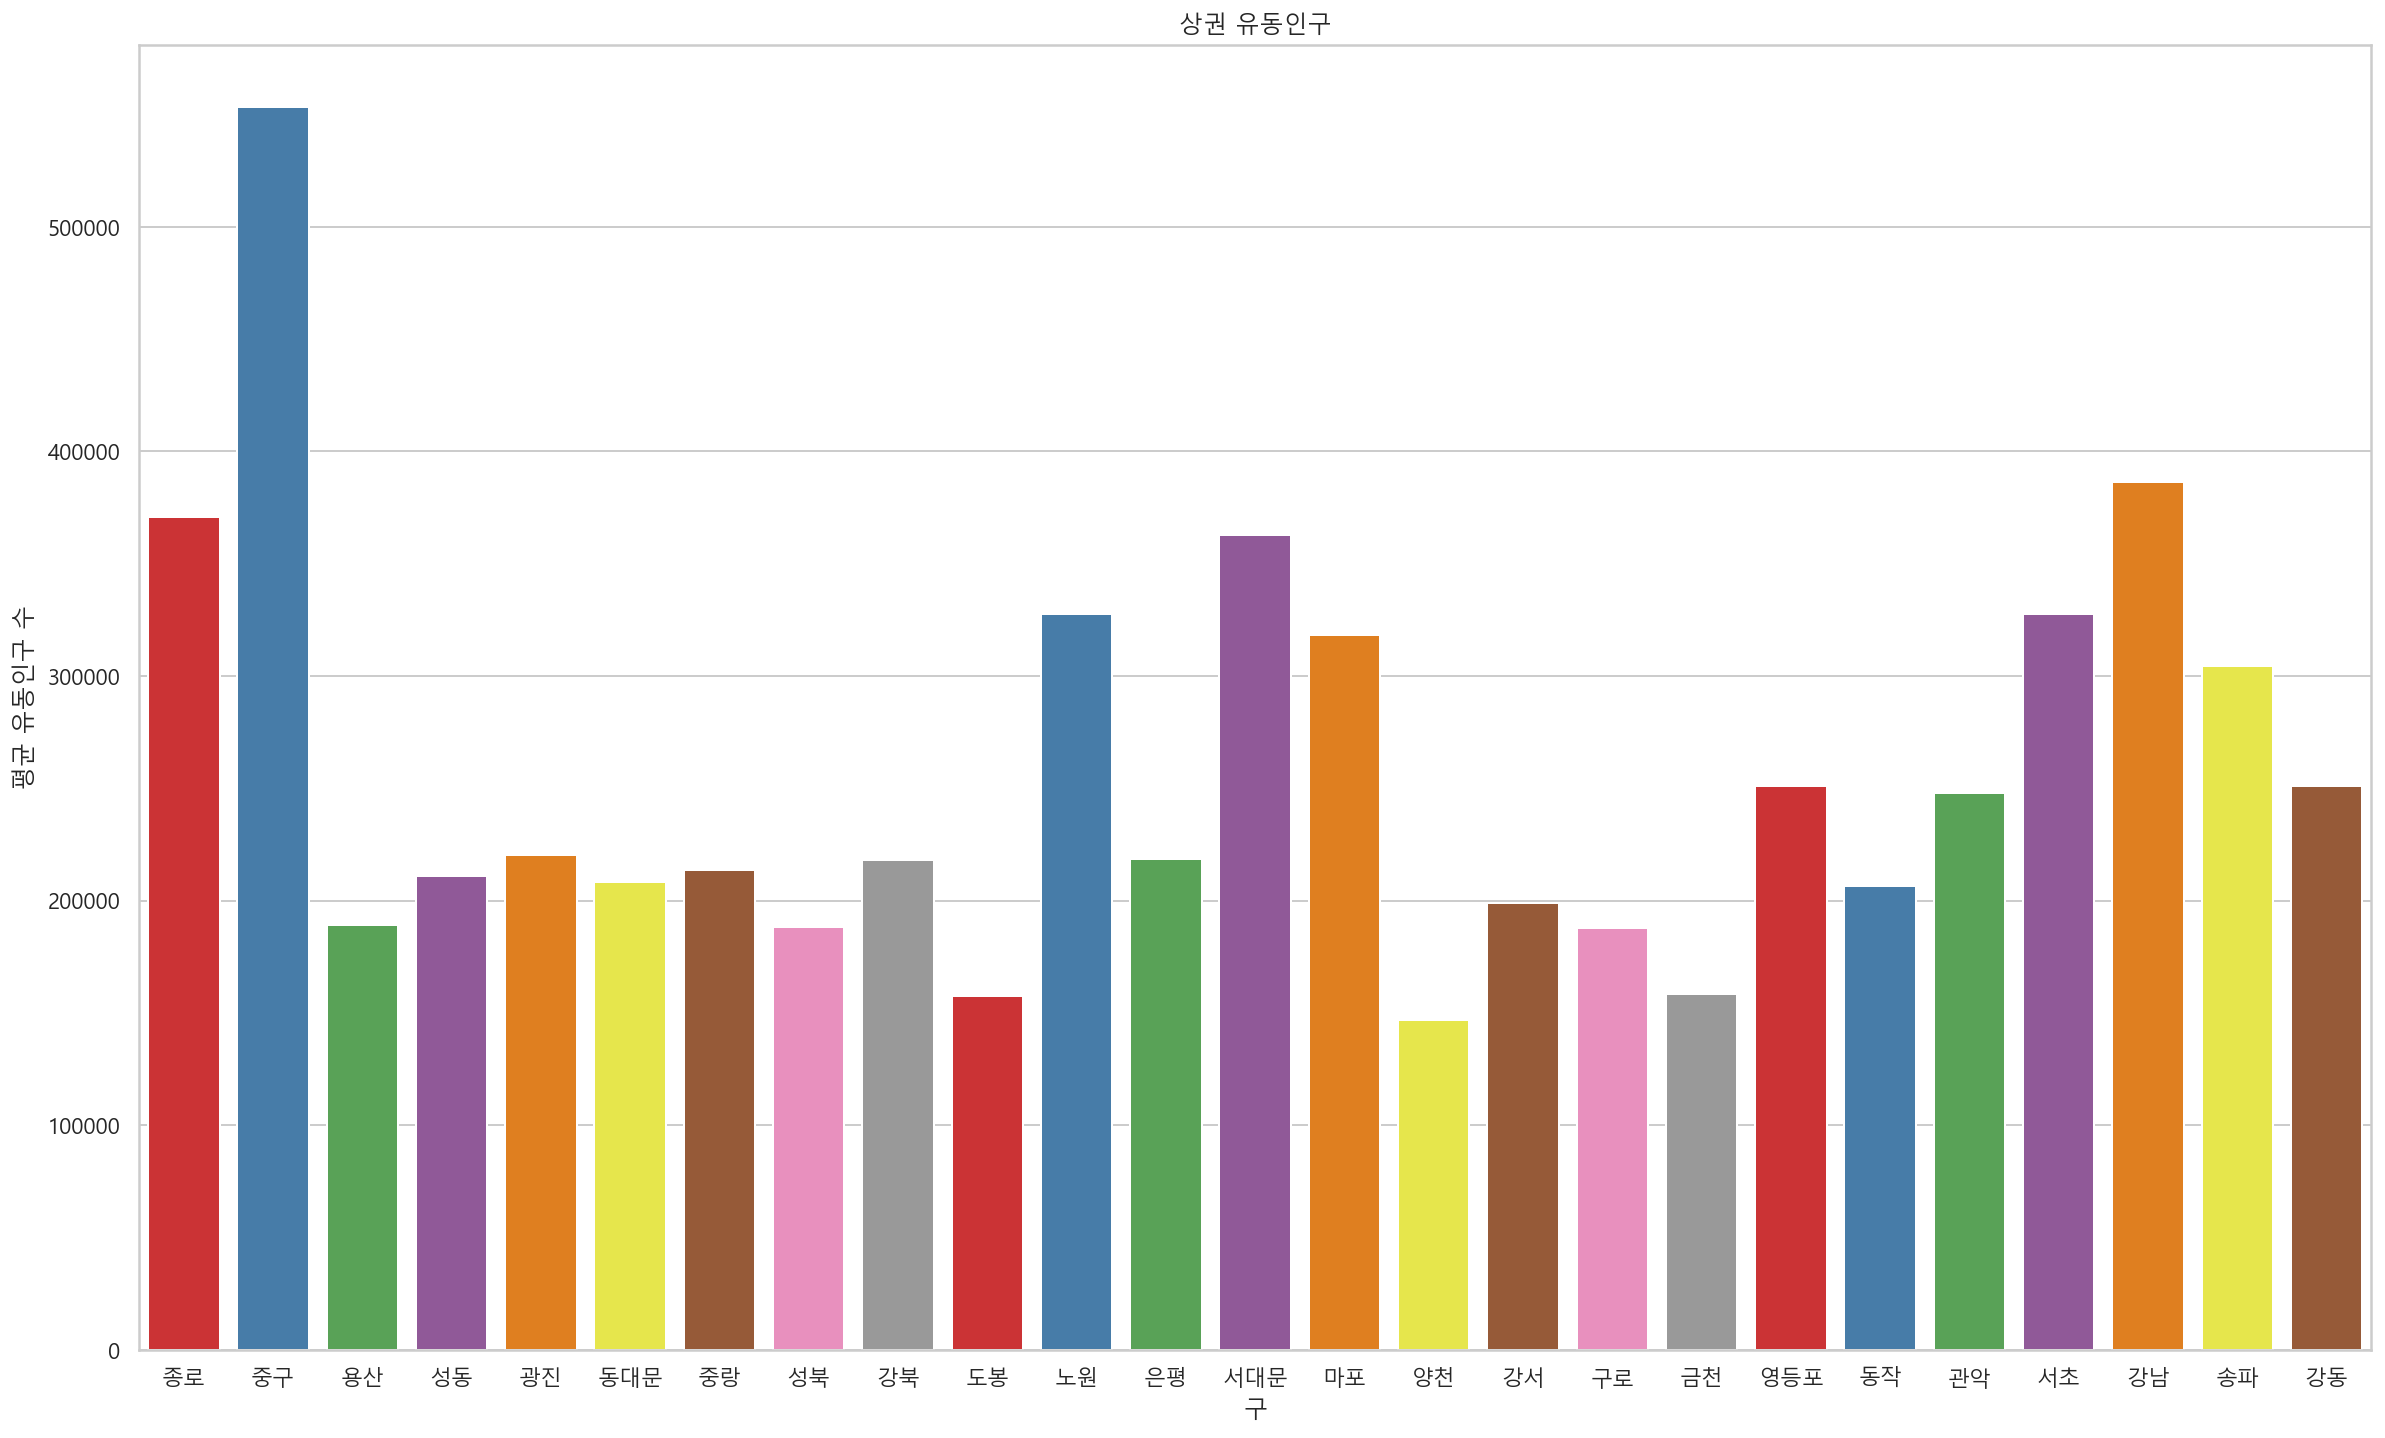

In [13]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x='구', y='총_유동인구_수', data = join2, ci = None, palette="Set1").set_title("상권 유동인구")
ax.set(xlabel="구", ylabel = "평균 유동인구 수")
plt.show()
fig.savefig("구별 유동인구.png", dpi=200)

#### 직장인수 비교
- 중구, 강남, 서초, 종로 등의 직장인 수가 높고 이것이 유동인구수에 반영된 것으로 보임
- 서대문구는 유동인구수에 비해 직장인 수는 상대적으로 낮음

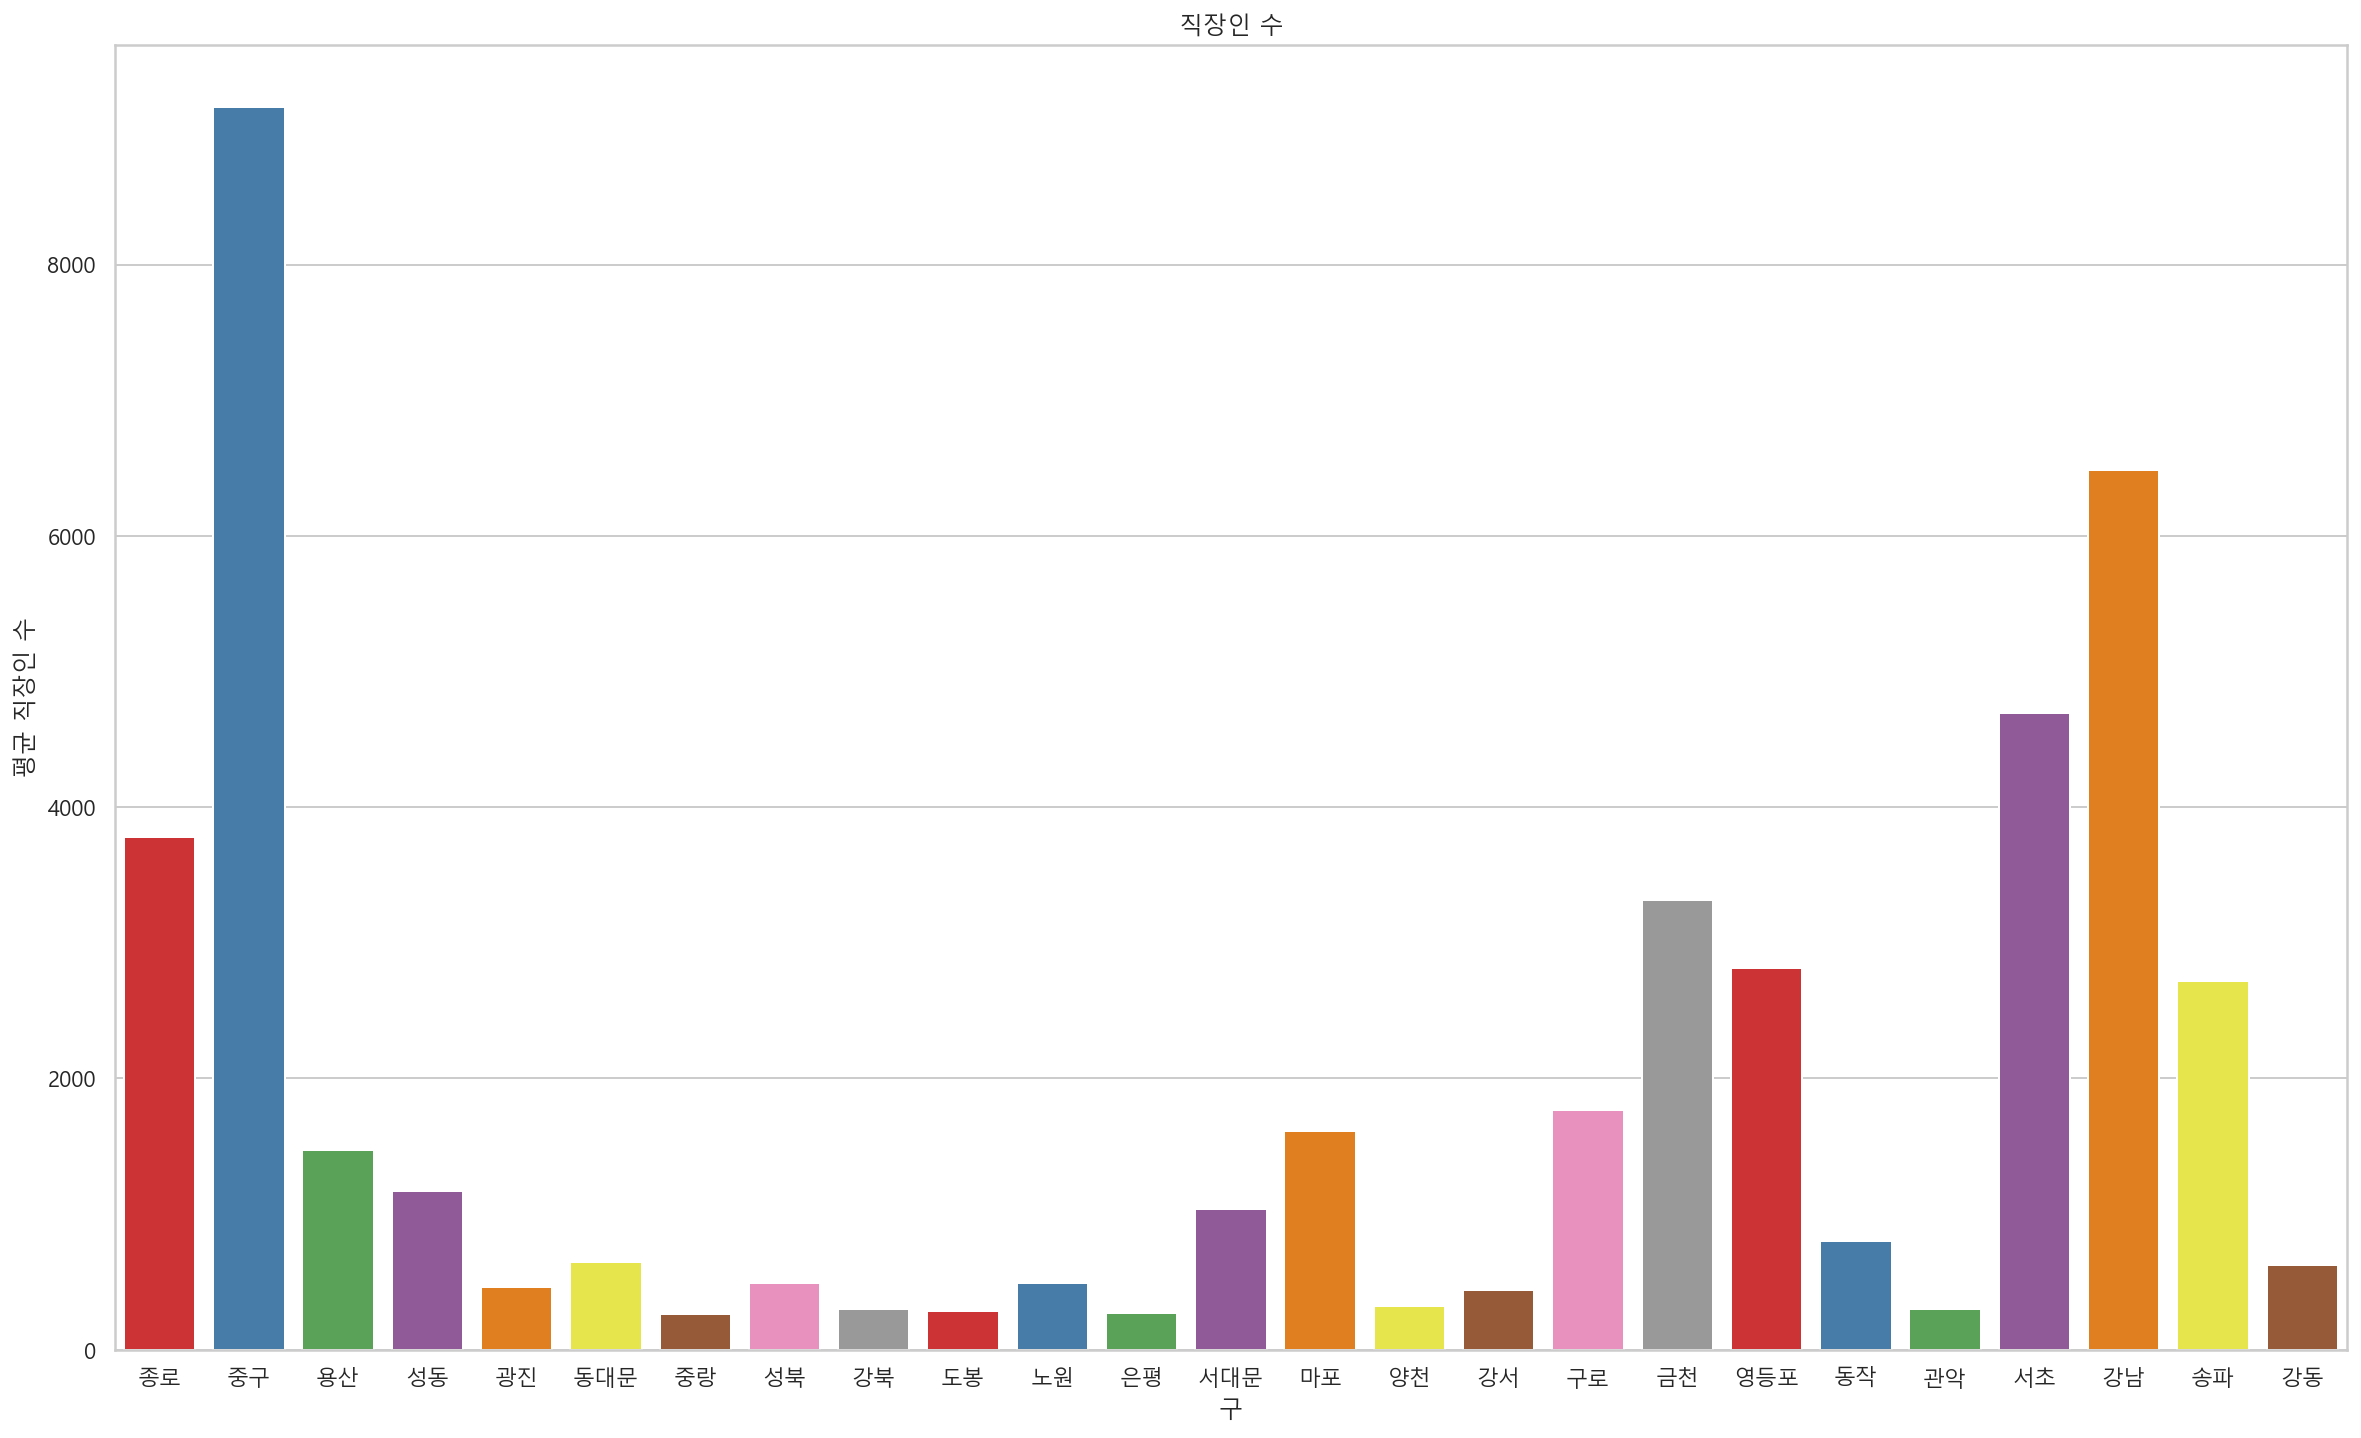

In [14]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x='구', y='총_직장_인구_수', data = join3, ci = None, palette="Set1").set_title("직장인 수")
ax.set(xlabel="구", ylabel = "평균 직장인 수")
plt.show()
fig.savefig("구별 직장인수.png", dpi=200)

### 남녀 유동인구 비교
- 구별 유동인구 성별 비율이 50대 50에 근접함
- 종로가 남성 유동인구 비율이 가장 높음

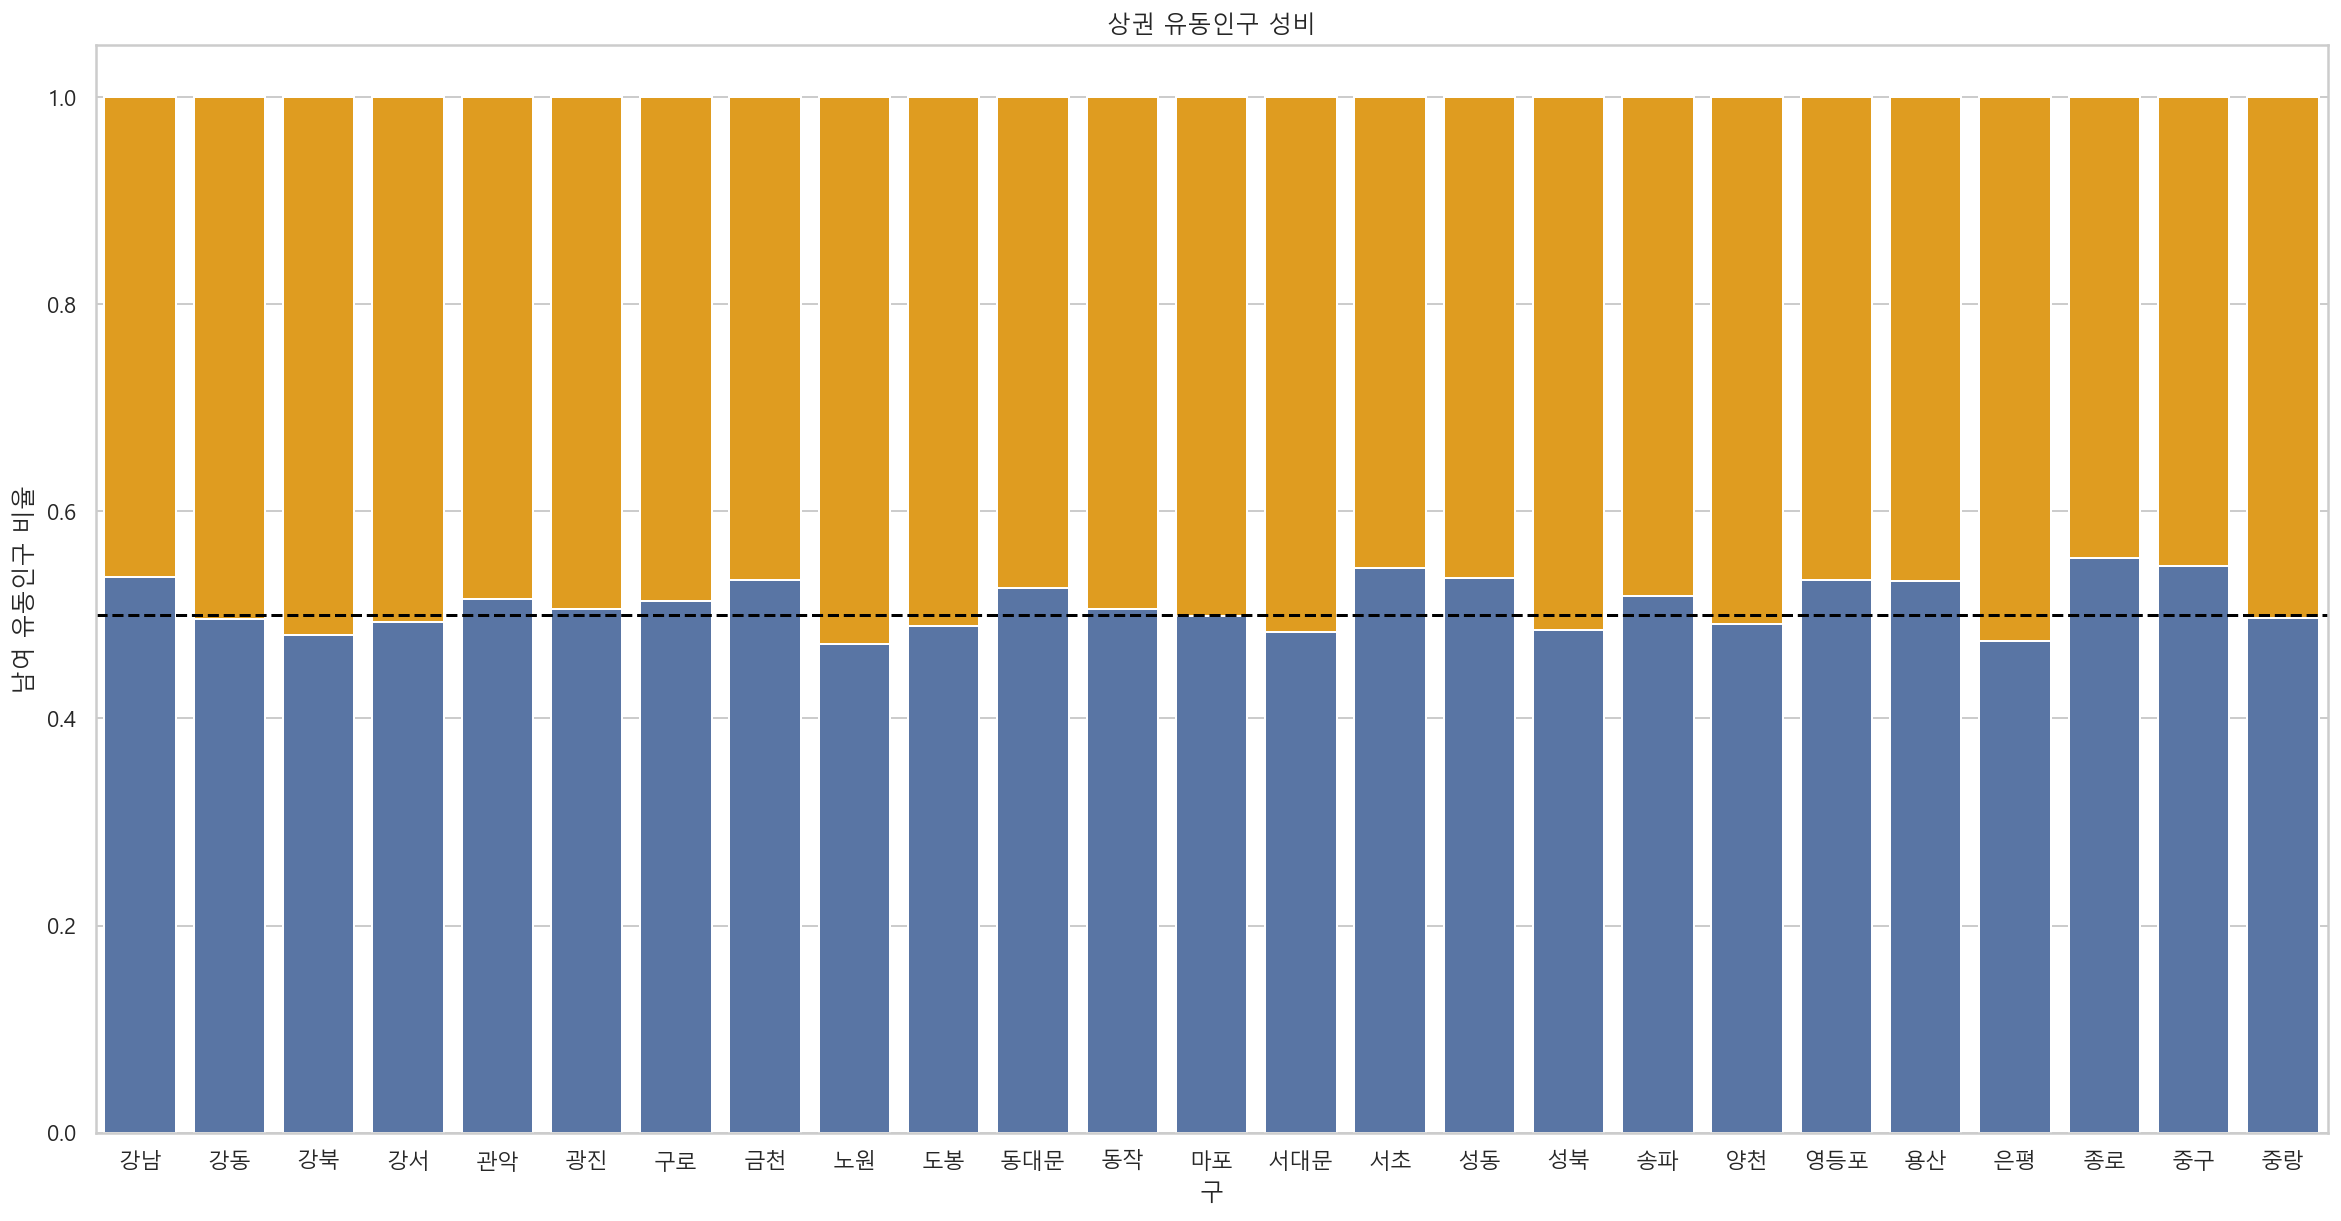

In [15]:
a = join2[['구','남성_유동인구_수','여성_유동인구_수']].groupby(by="구").sum().reset_index()
a["남성_비율"] = (a['남성_유동인구_수'] / (a['남성_유동인구_수'] + a['여성_유동인구_수']))

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='구', y= 1, data = a, ci = None, color="orange").set_title("상권 유동인구 성비")
sns.barplot(x='구', y='남성_비율', data = a, ci = None, color="b")
ax.set(xlabel="구", ylabel = "남여 유동인구 비율")
ax.axhline(0.5, ls='--', color="black")
plt.show()
fig.savefig("구별 성비.png", dpi=200)

### 요일별 유동인구 비교
- 모든 구에서 주말에 유동인구가 하락하는 경향을 보임
- 특히 직장인 비율이 높은 중구에서 가장 하락폭이 큼

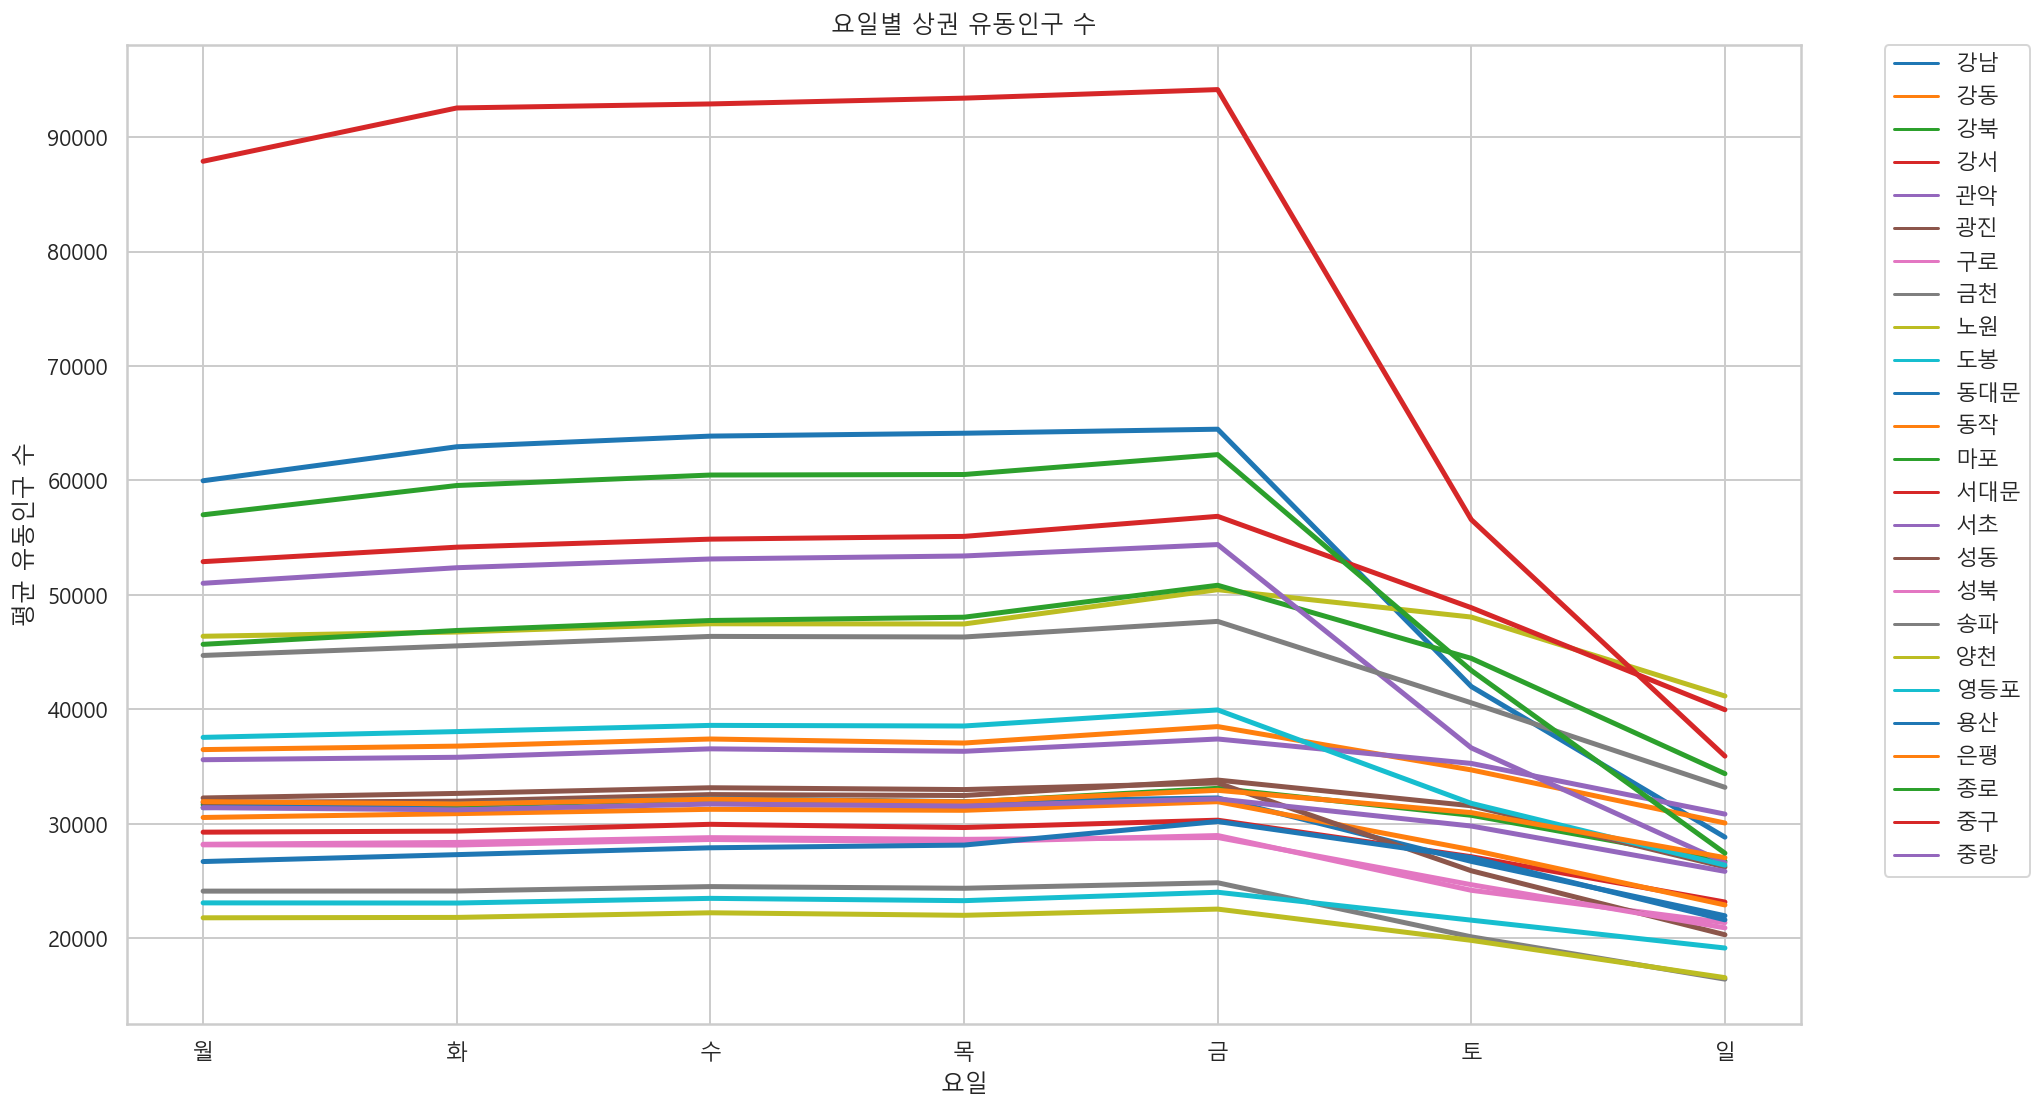

In [16]:
a1 = join2[['구', '월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수','토요일_유동인구_수','일요일_유동인구_수']]
a1 = a1.groupby('구').mean().round()
a1.columns = ['월','화','수','목','금','토','일']
fig, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(data=a1.T, palette="tab10", linewidth=2.5, dashes=False, sort=False).set_title("요일별 상권 유동인구 수")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel="요일", ylabel = "평균 유동인구 수")
plt.show()
fig.savefig("구&요일별 유동인구.png", dpi=200)

### 연령대별 유동인구 비교
- 서대문구의 20대 유동인구가 유난히 높음 -> 신촌&이대에 20대 유동인구가 많이 몰림

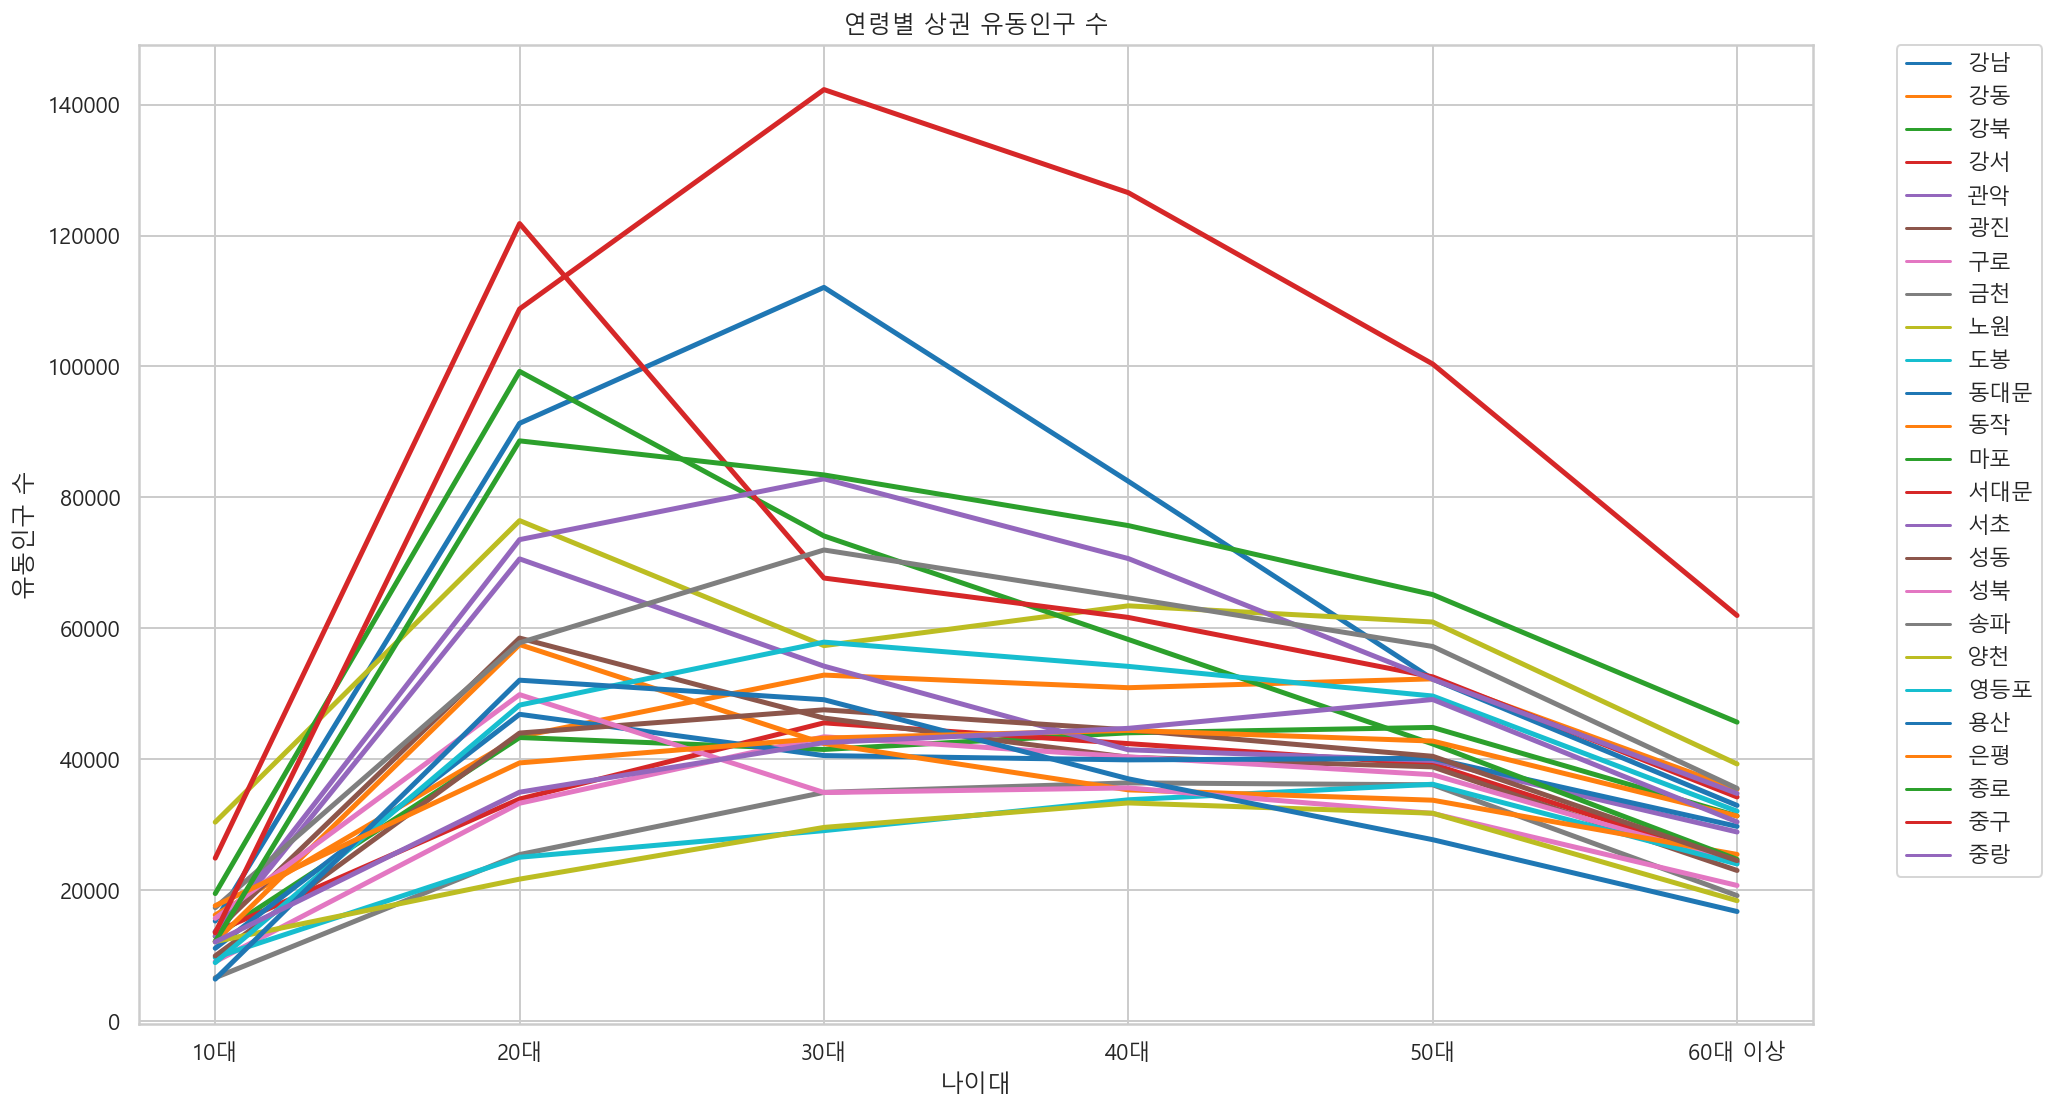

In [17]:
a2 = join2[['구', '연령대_10_유동인구_수','연령대_20_유동인구_수','연령대_30_유동인구_수','연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수']]
a2 = a2.groupby('구').mean().round()
a2.columns = ['10대','20대','30대','40대','50대','60대 이상']
fig, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(data=a2.T, palette="tab10", linewidth=2.5, dashes=False, sort=False).set_title("연령별 상권 유동인구 수")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel="나이대", ylabel = "유동인구 수")
plt.show()
fig.savefig("구&연령별 유동인구.png", dpi=200)

- 직장인이 많은 중구와 비교했을 때 확연한 차이를 보임

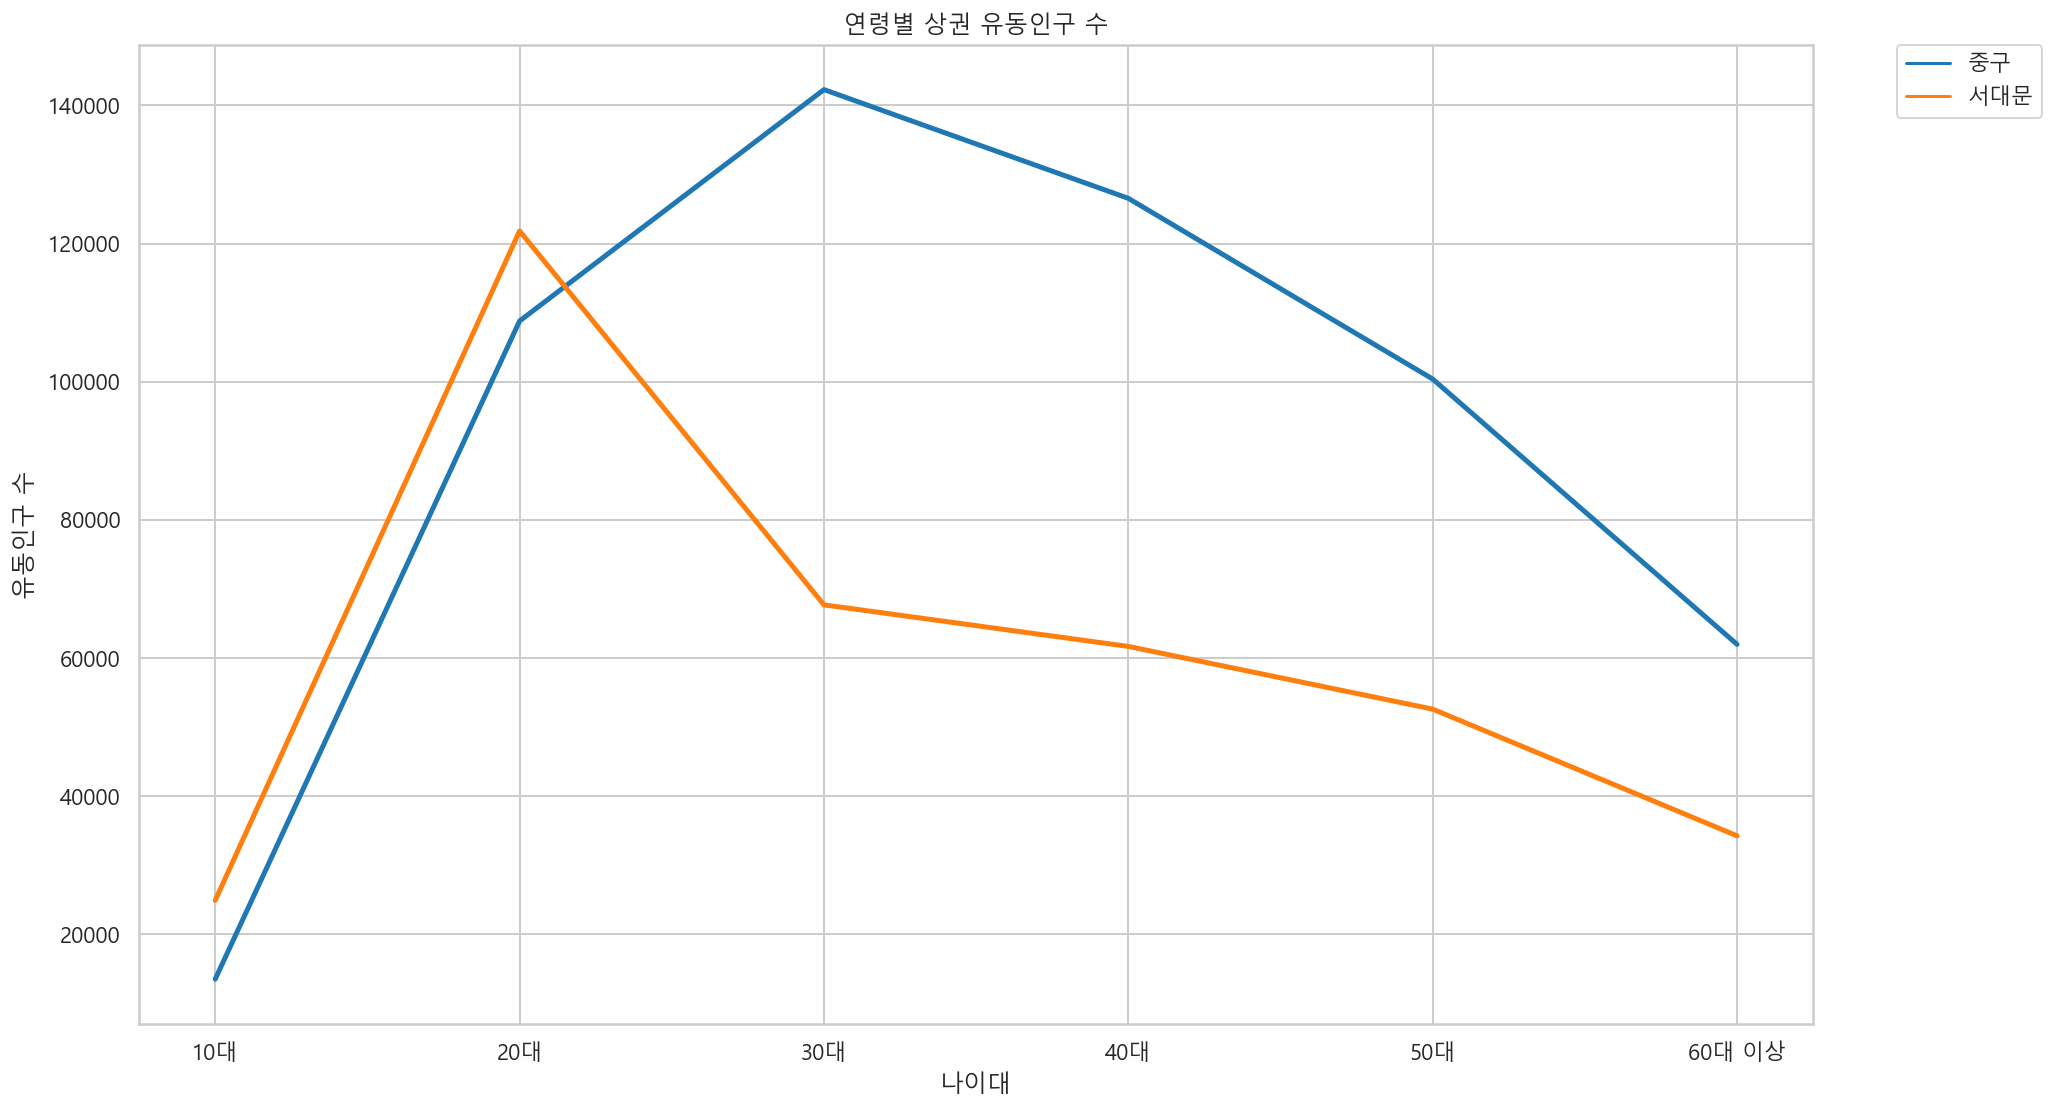

In [18]:
a2 = join2[['구', '연령대_10_유동인구_수','연령대_20_유동인구_수','연령대_30_유동인구_수','연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수']]
a2 = a2.groupby('구').mean().round()
a2.columns = ['10대','20대','30대','40대','50대','60대 이상']
fig, ax = plt.subplots(figsize=(15, 9))
sns.lineplot(data=a2.T[['중구','서대문']], palette="tab10", linewidth=2.5, dashes=False, sort=False).set_title("연령별 상권 유동인구 수")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel="나이대", ylabel = "유동인구 수")
plt.show()
fig.savefig("서대문, 중구&연령별 유동인구.png", dpi=200)

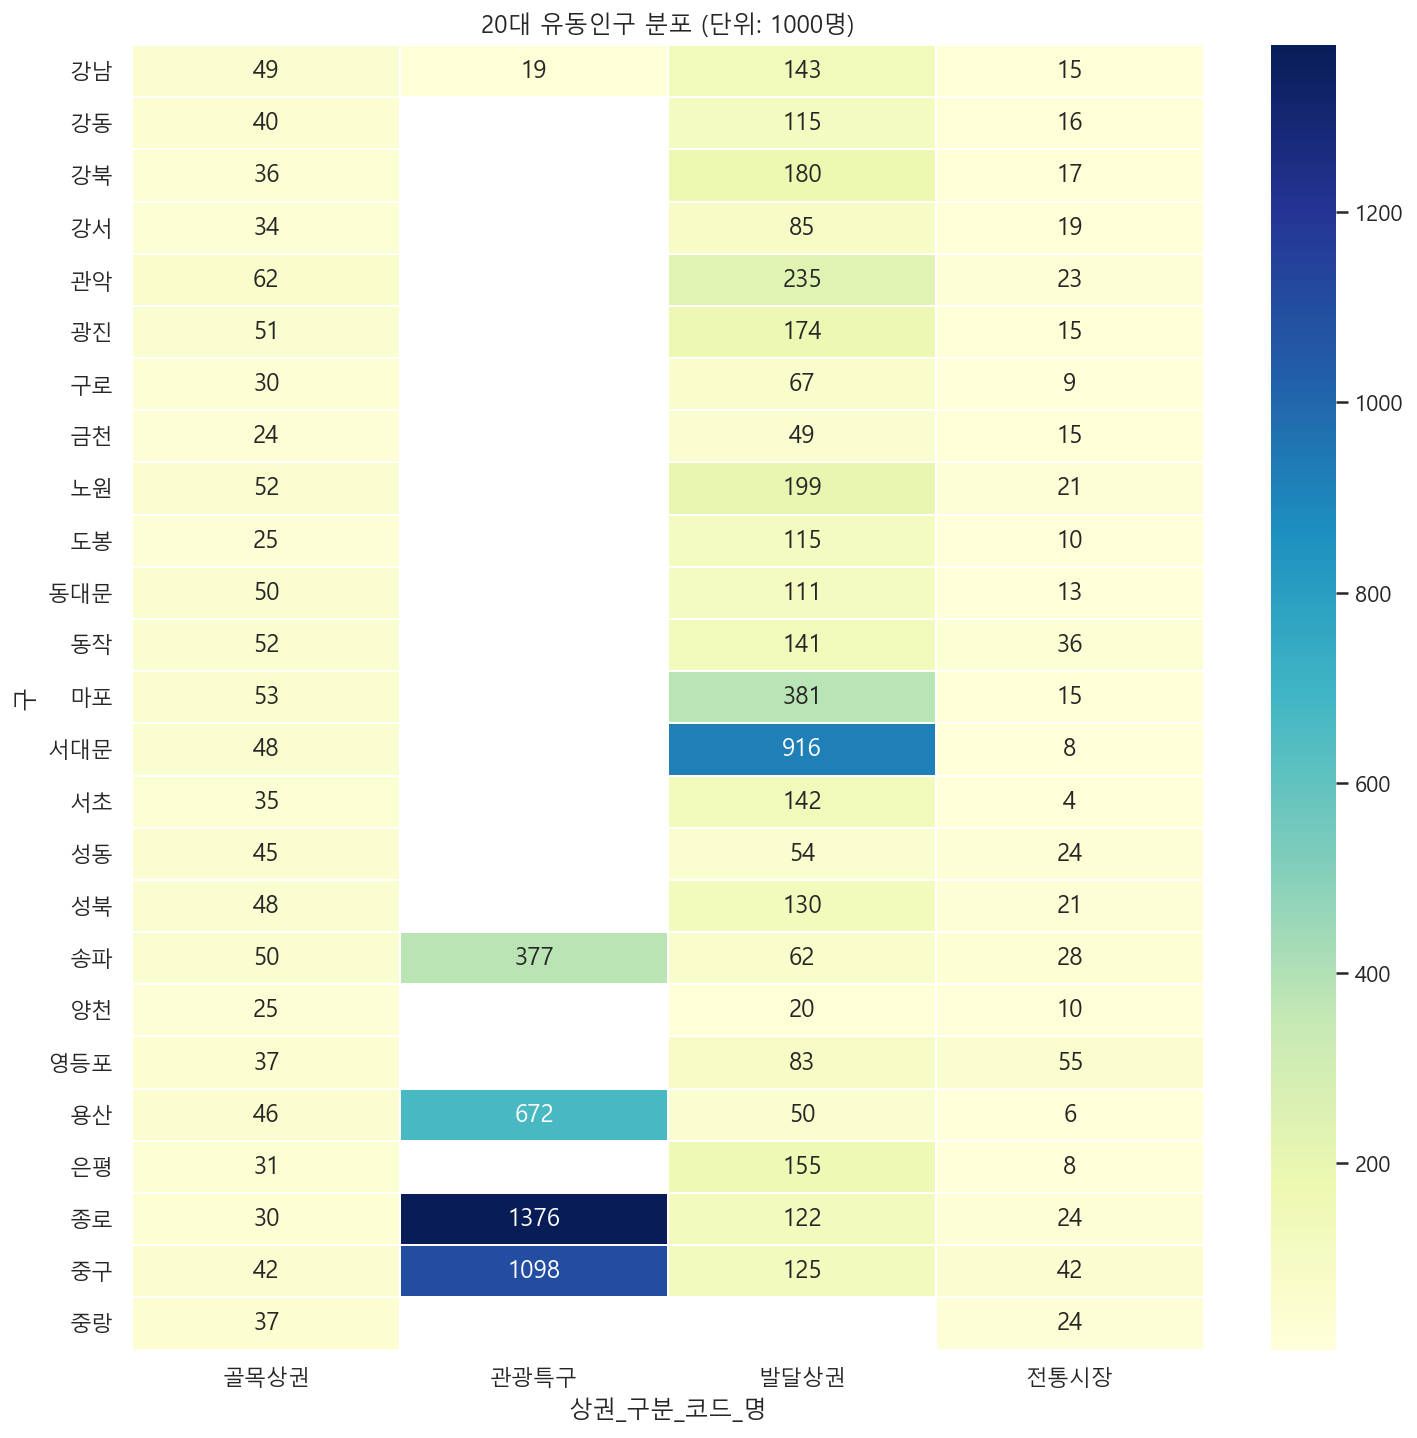

In [19]:
gu_20 = join2.pivot_table("연령대_20_유동인구_수", "구", "상권_구분_코드_명")
gu_20 = round(gu_20 / 1000)

f, ax = plt.subplots(figsize=(12, 12))
heat = sns.heatmap(gu_20, annot=True, linewidths=.5, fmt=".0f", cmap="YlGnBu")
plt.title("20대 유동인구 분포 (단위: 1000명)")
plt.show()
figure = heat.get_figure()    
figure.savefig('20대 유동인구 분포.png', dpi=400)

- 서대문구와 마포구의 20대 비율이 눈에 띄게 높음

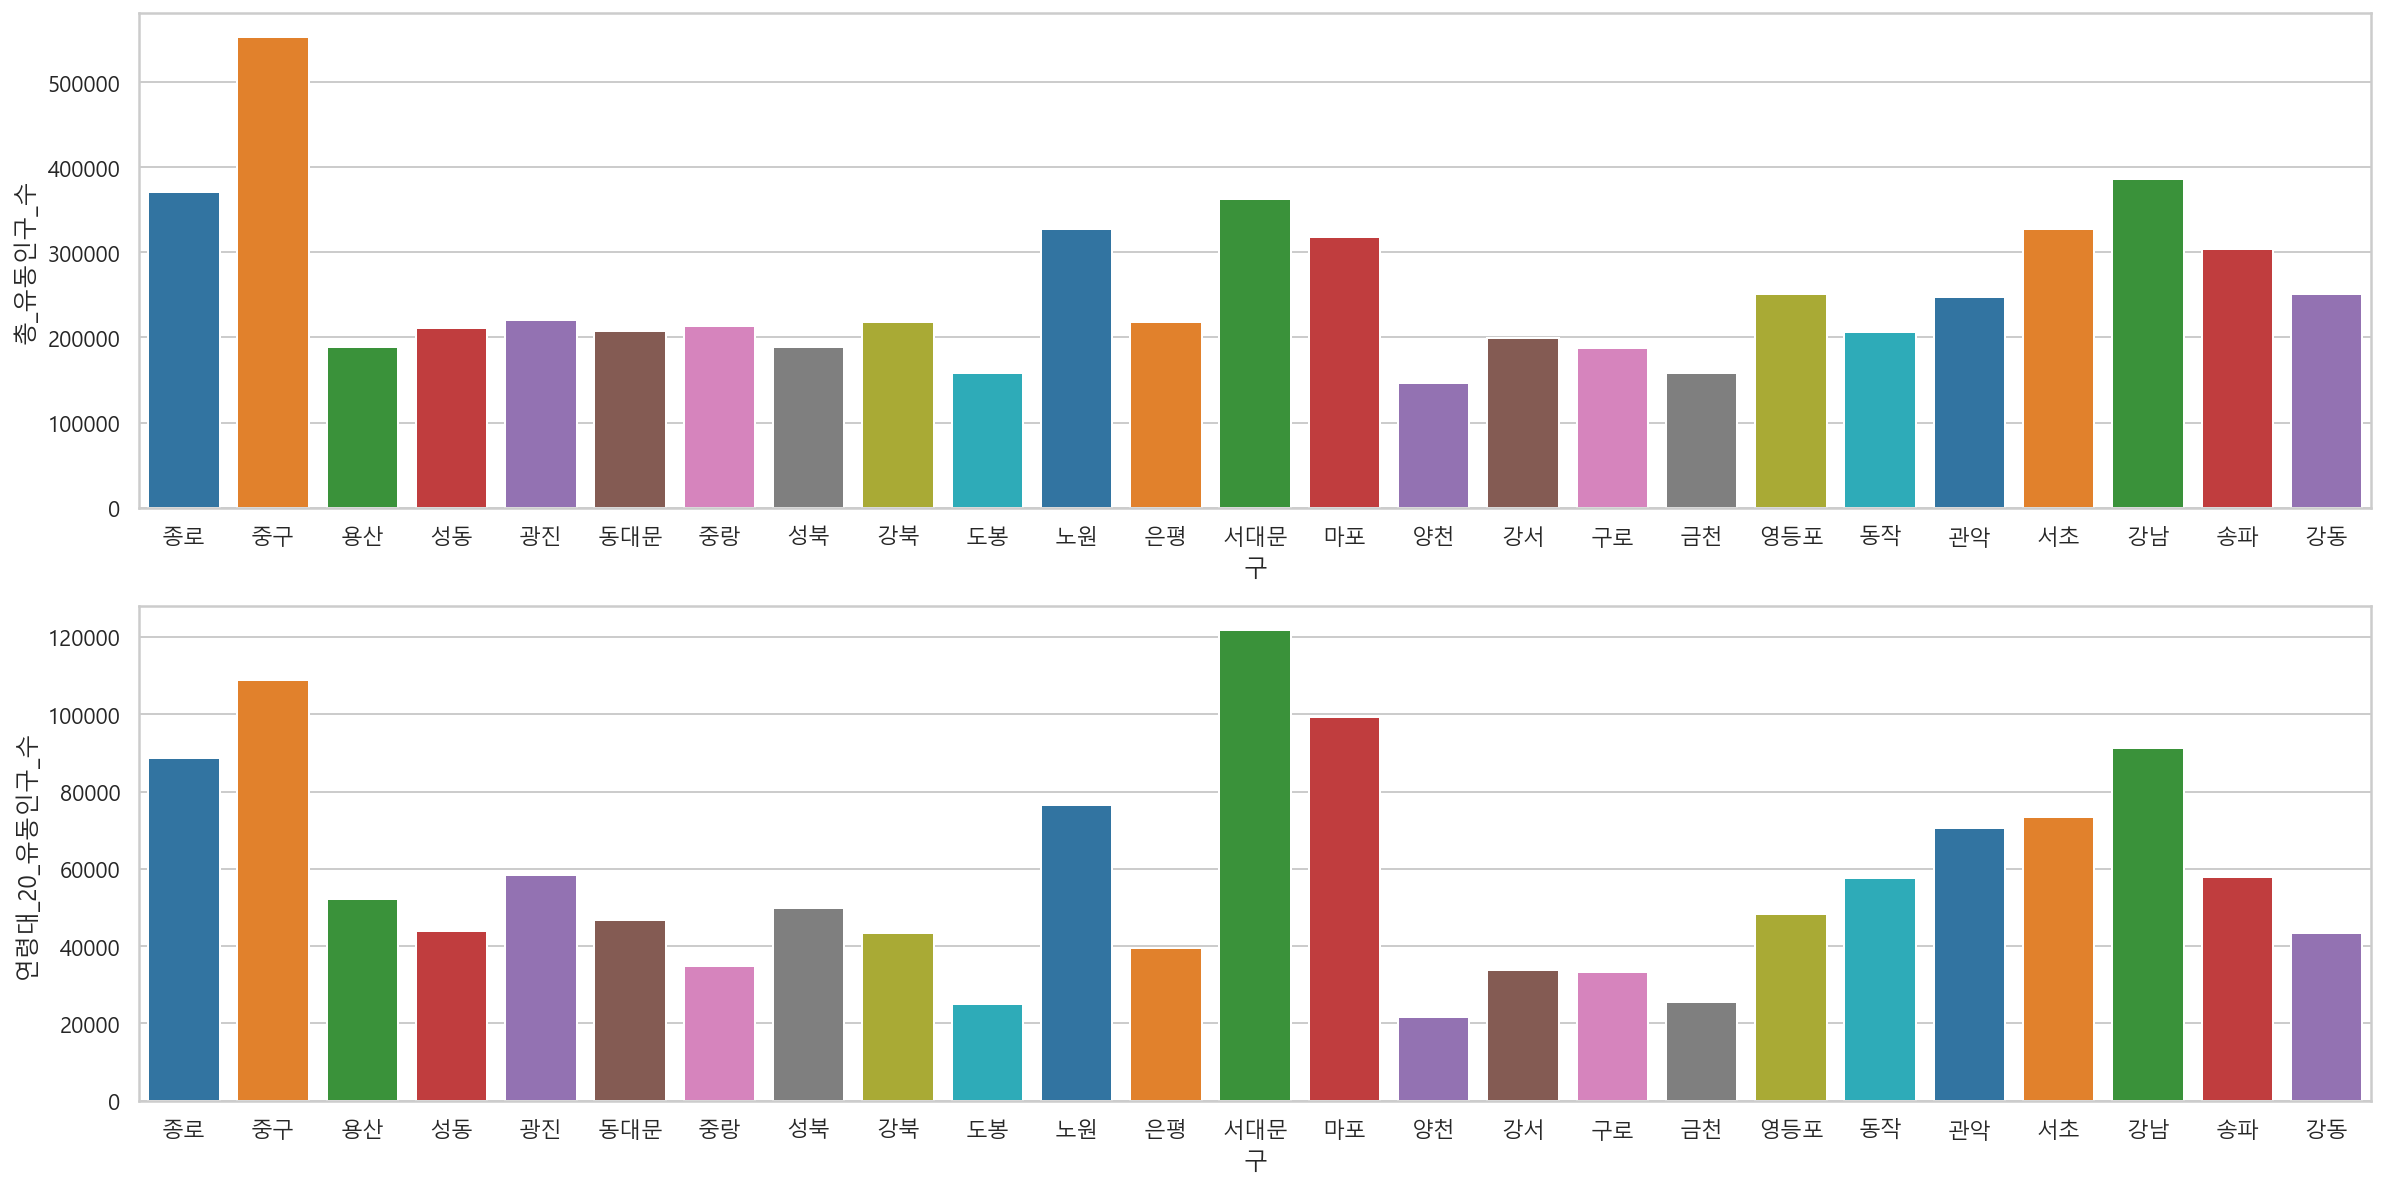

In [20]:
fig, ax = plt.subplots(2,1,figsize=(20, 10))
sns.barplot(x='구', y='총_유동인구_수', data = join2, ci = None, ax=ax[0], palette="tab10")
sns.barplot(x='구', y='연령대_20_유동인구_수', data = join2, ci = None, ax=ax[1], palette="tab10")
plt.show()
fig.savefig("총&20대 유동인구.png", dpi=200)

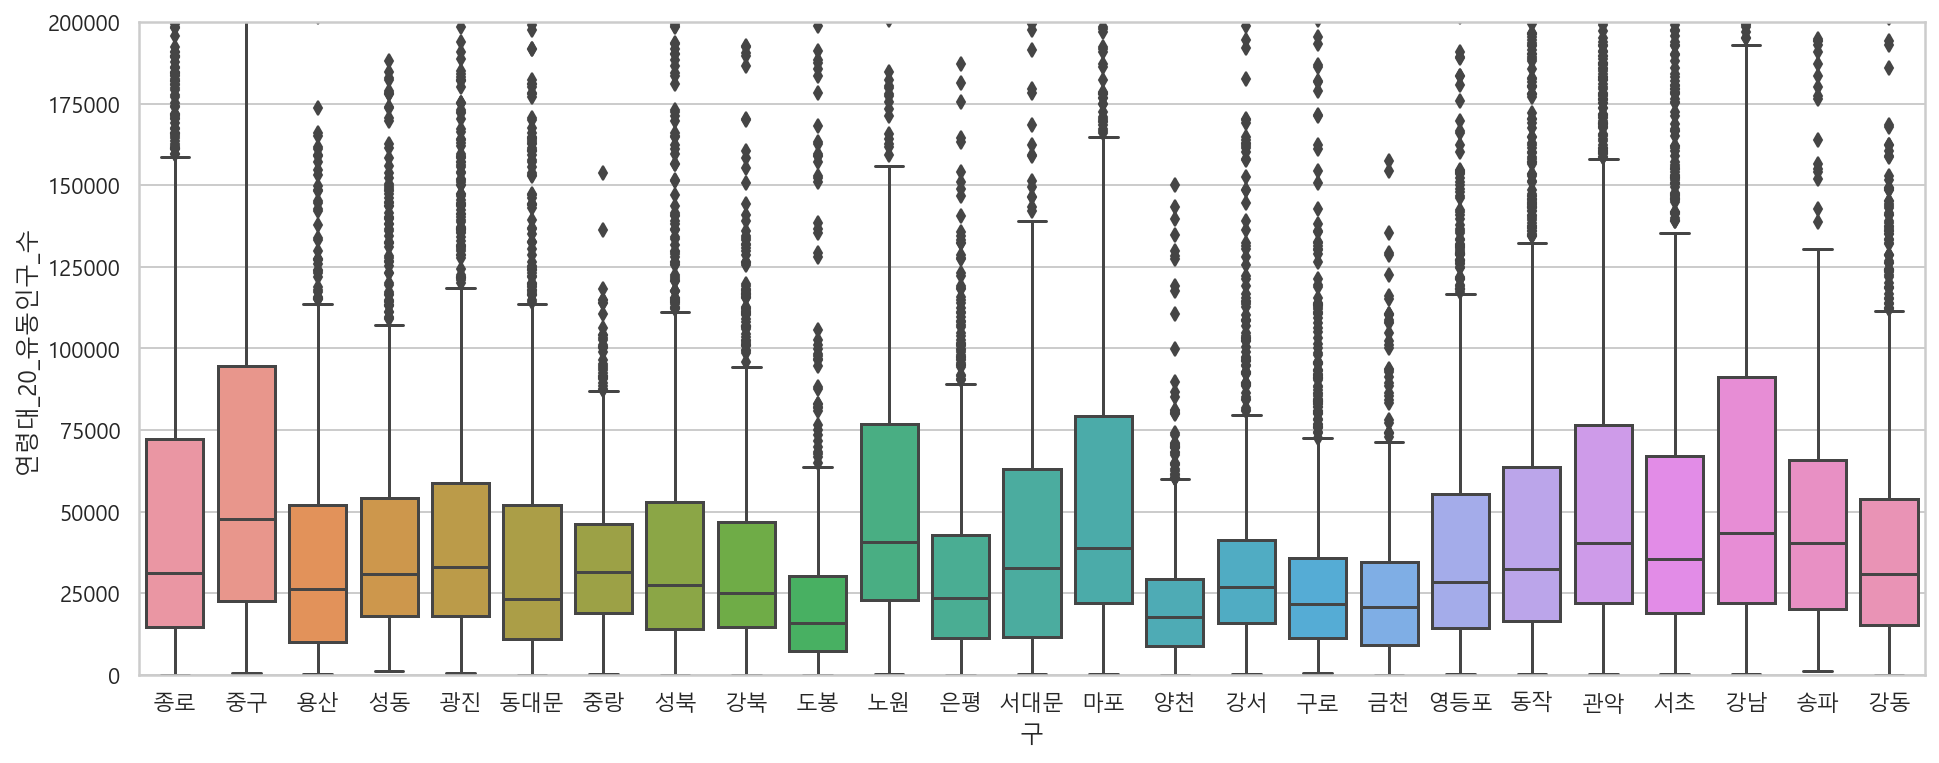

In [21]:
plt.figure(figsize=(16,6))
box = sns.boxplot(x="구", y="연령대_20_유동인구_수", data=join2)
plt.ylim([0,200000])
plt.show()
figure = box.get_figure()    
figure.savefig('20대 유동인구 분포.png', dpi=400)

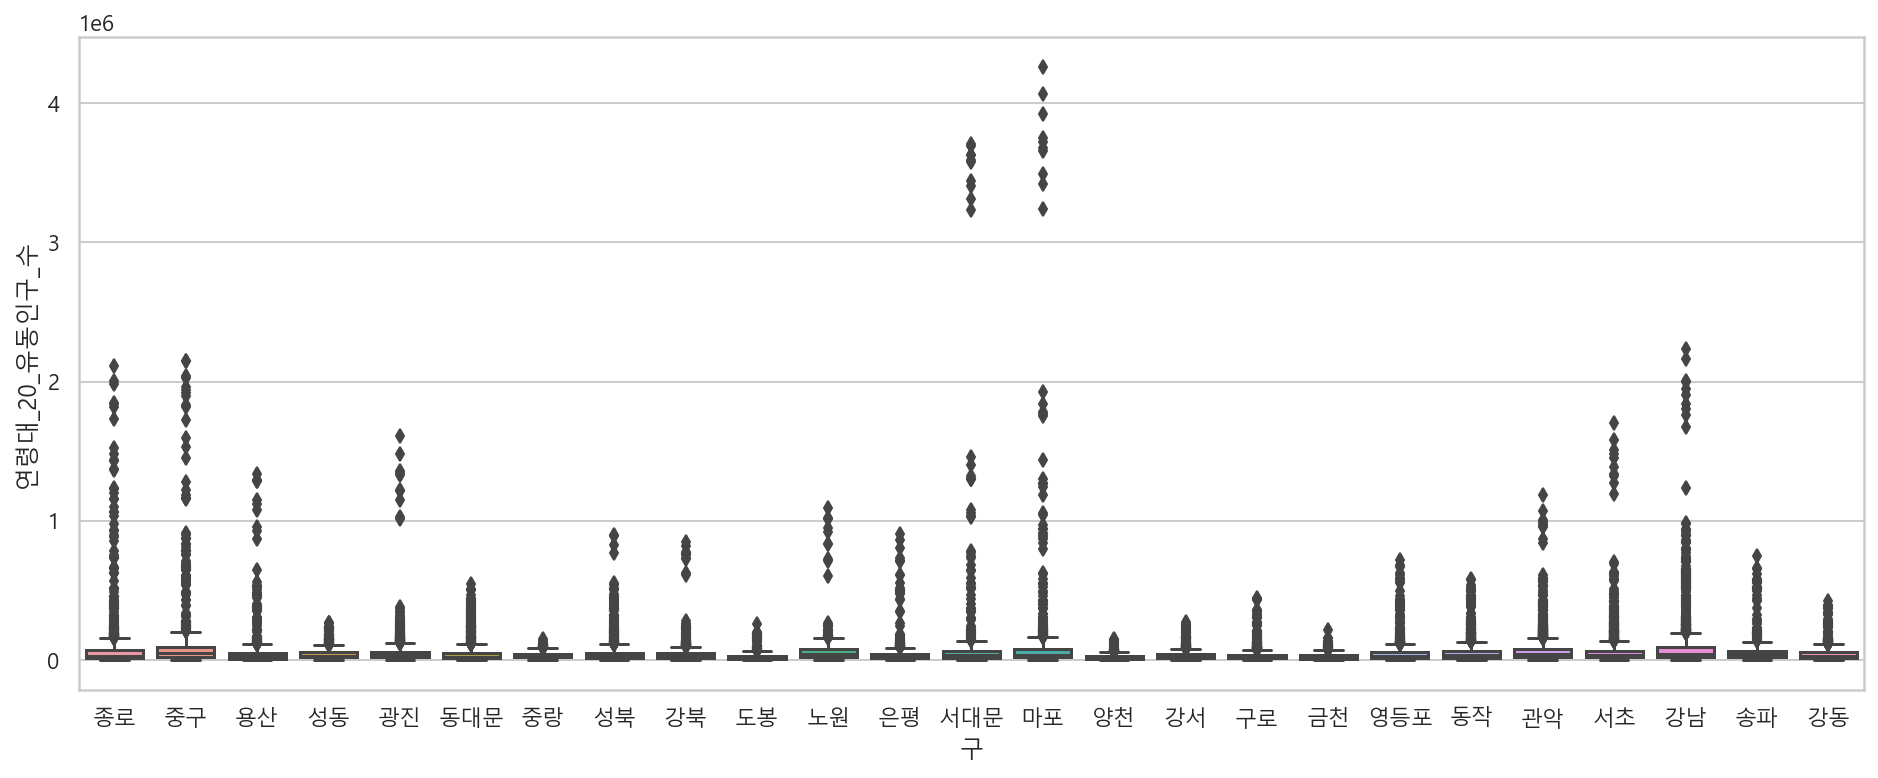

In [22]:
plt.figure(figsize=(16,6))
box = sns.boxplot(x="구", y="연령대_20_유동인구_수", data=join2)
plt.show()
figure = box.get_figure()    
figure.savefig('20대 유동인구 분포(큰 그림).png', dpi=400)

- 서대문구와 마포구에는 신촌, 이대, 홍대라는 outlier가 크게 작용함

In [23]:
seo = join2[join2['구'] == '서대문']
print(seo[seo['연령대_20_유동인구_수'] > 300000]["상권_코드_명_x"].unique())

['북아현로4길' '서울 서대문구 신촌역' '서울 서대문구 이대역']


In [24]:
seo = join2[join2['구'] == '마포']
print(seo[seo['연령대_20_유동인구_수'] > 300000]["상권_코드_명_x"].unique())

['신촌역' '홍익대학교 주변' '서울 마포구 홍대입구역_3']


### 서울시 전체 유동인구 비율 대비 20대 유동인구 비율
- 정확한 비교를 위해 비율로 시각화

In [25]:
test = pd.pivot_table(join2, index='구', aggfunc=np.sum).reset_index()
test["20_구_인구_비율"] = round(test["연령대_20_유동인구_수"] / test["연령대_20_유동인구_수"].sum() * 100, 2)
test["구_인구_비율"] = round(test["총_유동인구_수"] / test["총_유동인구_수"].sum() * 100, 2)
test["20_총_차이"] = round(test["20_구_인구_비율"] / test["구_인구_비율"] * 100, 2)

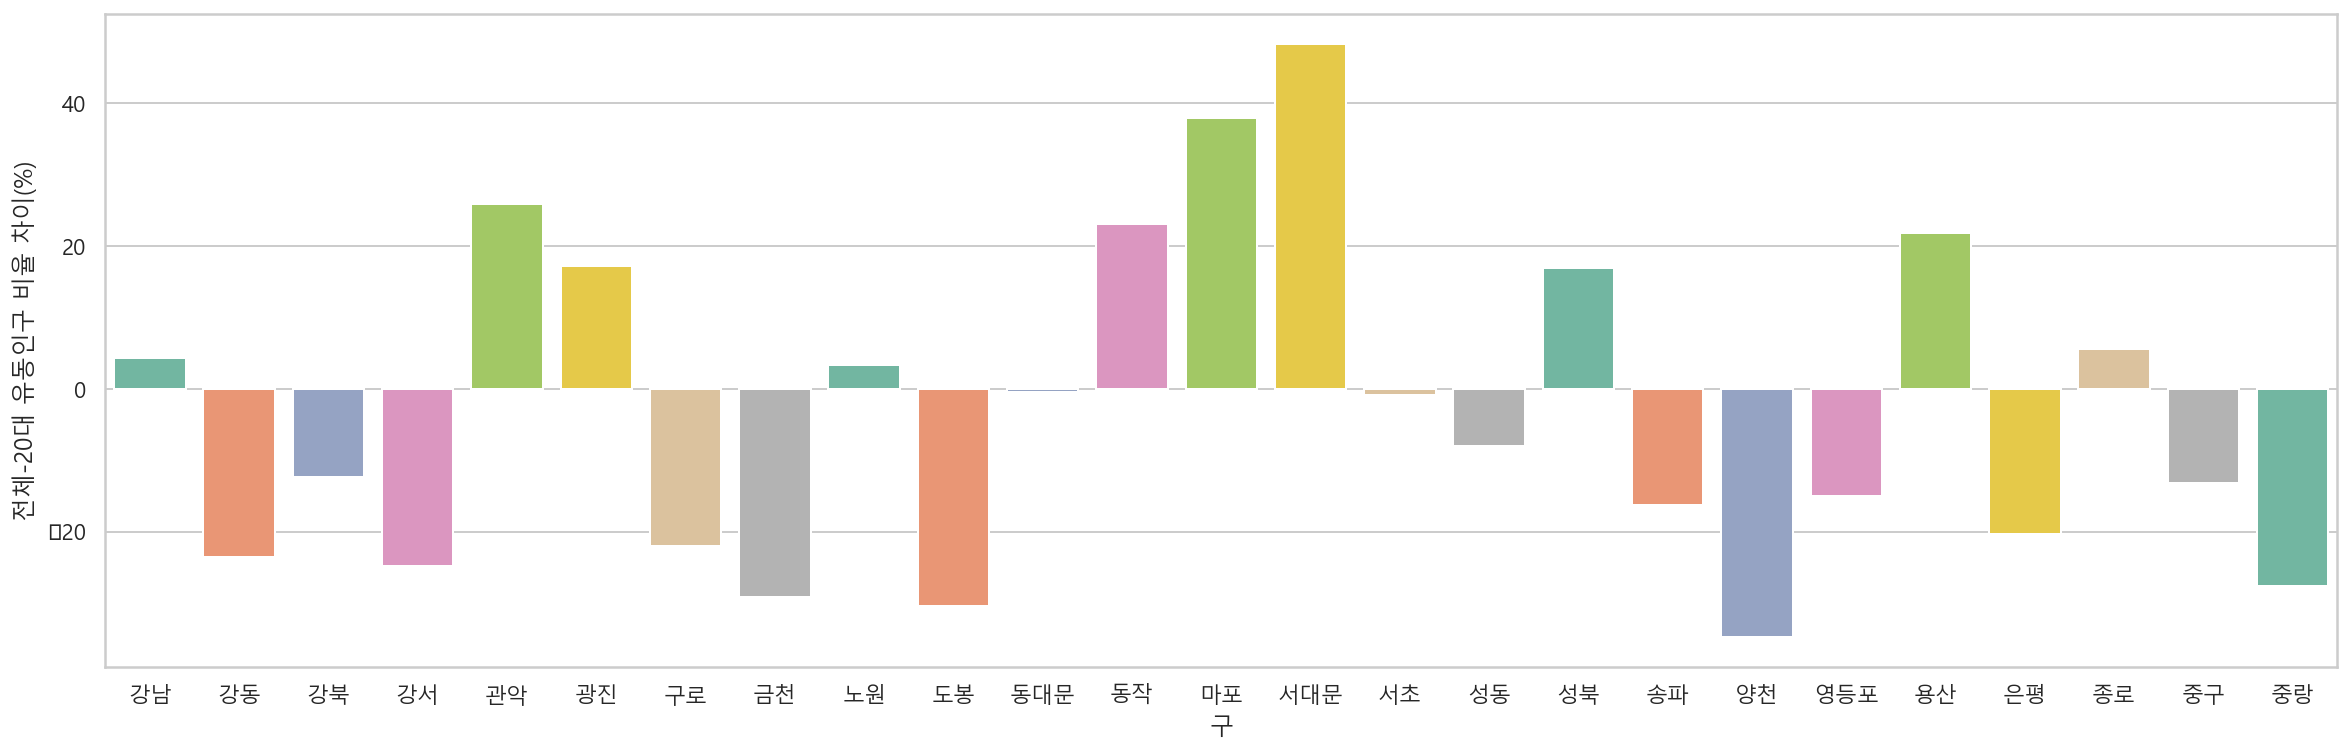

In [26]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x=test['구'], y=test["20_총_차이"]-100, data = test, ci = None, palette="Set2")
ax.set_ylabel("전체-20대 유동인구 비율 차이(%)")
plt.show()
fig.savefig("20대 유동인구 비율 비교.png", dpi=200)

### 20대 지역 거주 & 골목시장 유동인구 비율 비교
- 혹시 거주자 중 10대 비율이 높아서 유동인구 비율이 높은걸까?
- 2019년 인구 데이터랑 비교
- 모든 구에서 20대 유동인구 비율은 해당 지역 10대 거주 인구 비율보다도 높다.

In [27]:
age = pd.read_csv("report1.txt", sep='\t')
age["계"] = [int(age.replace(",","")) for age in age["계"]]
age["20~24세"] = [int(age.replace(",","")) for age in age["20~24세"]]
age["25~29세"] = [int(age.replace(",","")) for age in age["25~29세"]]
age["20대_거주_비율"] = round((age["20~24세"] + age["25~29세"]) / age["계"] * 100, 2)
age_tot = age[age["구분"] == "계"].reset_index()
age_tot["구"] = [gu[:2] if len(gu)<=3 else gu[:3] for gu in age_tot['행정구역별']]
test["20_유동인구_비율"] = round(test["연령대_20_유동인구_수"] / test["총_유동인구_수"] * 100, 2)
teen = pd.merge(test[["구", "20_유동인구_비율"]], age_tot[["구", "20대_거주_비율"]], on="구")

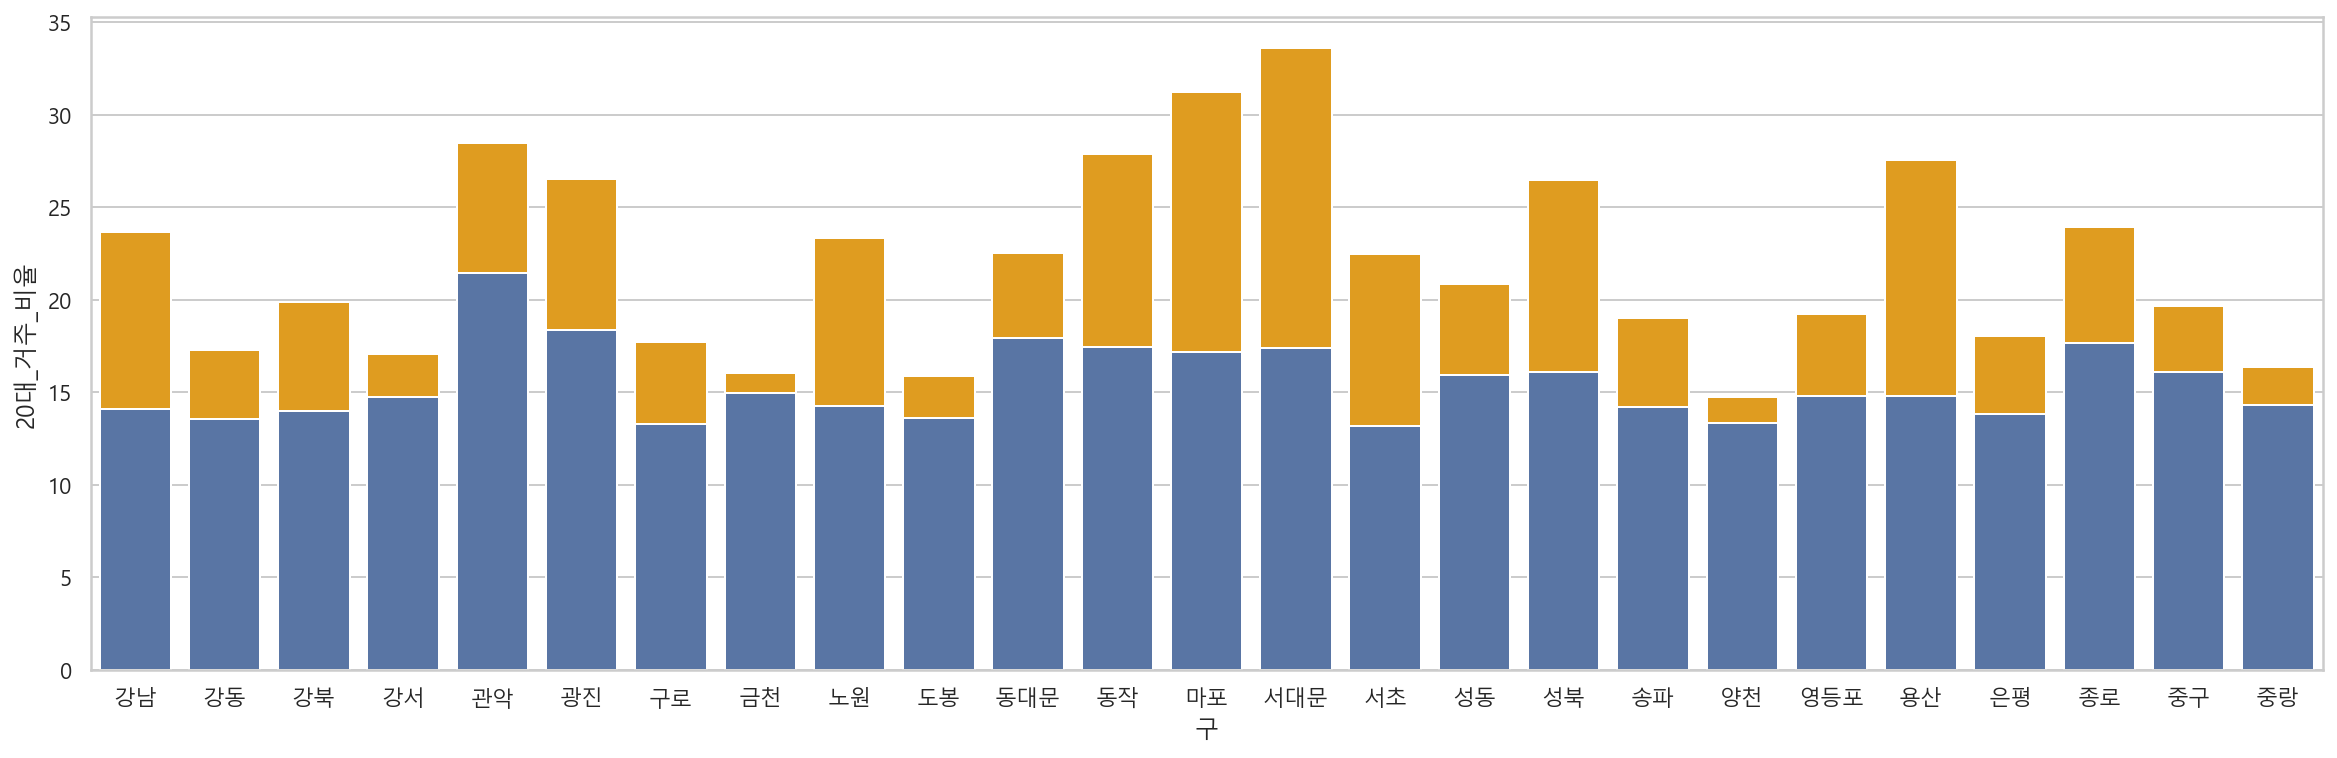

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='구', y='20_유동인구_비율', data = teen, ci = None, color = 'orange')
sns.barplot(x='구', y='20대_거주_비율', data = teen, ci = None, color = 'B')
plt.show()
fig.savefig("20대 거주인구&유동인구.png", dpi=200)

## b. 상권별 데이터 분석

### 구 피봇테이블

In [29]:
pivot = pd.pivot_table(join2, index='구', aggfunc=np.sum)

### 상권별 피봇테이블 ver 0.1

In [30]:
pivot2 = pd.pivot_table(join2, index=' 상권_구분_코드_명', aggfunc=np.sum)

### 상권별 피봇테이블 ver 0.2

In [31]:
pivot3 = pd.pivot_table(join2, columns=' 상권_구분_코드_명', aggfunc=np.sum)

### 상권별 피봇테이블 유동인구 비율 추가 ver 0.3

In [32]:
pivot3.loc["10_유동인구_비율"] = round(pivot3.loc["연령대_10_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["20_유동인구_비율"] = round(pivot3.loc["연령대_20_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["30_유동인구_비율"] = round(pivot3.loc["연령대_30_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["40_유동인구_비율"] = round(pivot3.loc["연령대_40_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["50_유동인구_비율"] = round(pivot3.loc["연령대_50_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["60_이상_유동인구_비율"] = round(pivot3.loc["연령대_60_이상_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)

### 상권&연령별 유동인구 비율 그래프
- 관광특구, 발달상권은 2,30대 유동인구 비율이 높고 전통시장, 골목상권은 50대 이상 비율이 높다.

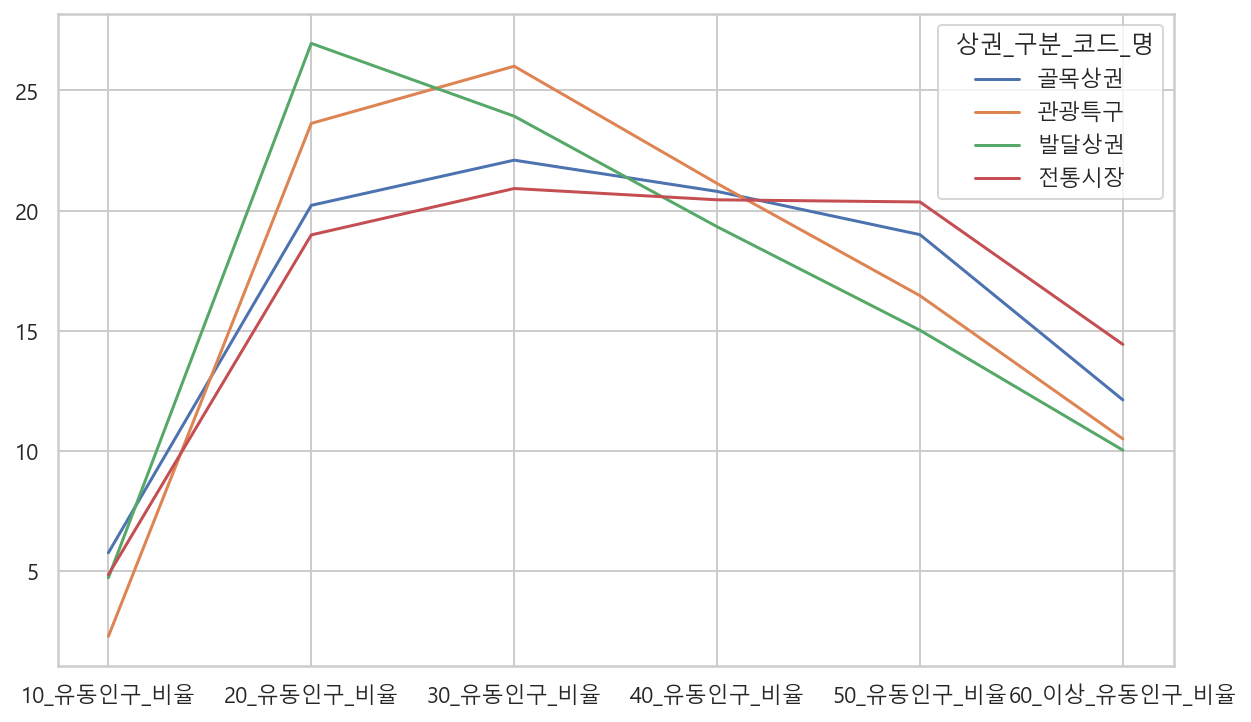

In [33]:
pivot3.loc[["10_유동인구_비율","20_유동인구_비율","30_유동인구_비율","40_유동인구_비율","50_유동인구_비율","60_이상_유동인구_비율"]].plot(figsize=(10,6))
plt.show()

### 상권&시간대별 피봇테이블 월요일 20대 남성 유동 인구 비율 추가 ver 0.4

In [34]:
pivot3

상권_구분_코드_명            골목상권          관광특구          발달상권          전통시장
금요일_유동인구_수     7.122211e+08  7.317738e+07  4.827686e+08  8.290464e+07
기준 년코드         4.480158e+07  2.661480e+05  1.114803e+07  9.934248e+06
기준_년월_코드       4.484218e+09  2.663892e+07  1.115807e+09  9.943179e+08
기준_분기_코드       5.353000e+04  3.180000e+02  1.332300e+04  1.187300e+04
남성_유동인구_수      2.347735e+09  2.346361e+08  1.552376e+09  2.677694e+08
...                     ...           ...           ...           ...
20_유동인구_비율     2.022000e+01  2.363000e+01  2.696000e+01  1.899000e+01
30_유동인구_비율     2.210000e+01  2.601000e+01  2.393000e+01  2.092000e+01
40_유동인구_비율     2.080000e+01  2.113000e+01  1.933000e+01  2.045000e+01
50_유동인구_비율     1.900000e+01  1.646000e+01  1.502000e+01  2.036000e+01
60_이상_유동인구_비율  1.212000e+01  1.050000e+01  1.003000e+01  1.443000e+01

[543 rows x 4 columns]

In [35]:
pivot3.index

Index(['금요일_유동인구_수', '기준 년코드', '기준_년월_코드', '기준_분기_코드', '남성_유동인구_수',
       '남성연령대_10_금요일시간대_1_유동인구_수', '남성연령대_10_금요일시간대_2_유동인구_수',
       '남성연령대_10_금요일시간대_3_유동인구_수', '남성연령대_10_금요일시간대_4_유동인구_수',
       '남성연령대_10_금요일시간대_5_유동인구_수',
       ...
       '토요일_유동인구_수', '행정동_코드', '형태정보', '화요일_유동인구_수', '10_유동인구_비율',
       '20_유동인구_비율', '30_유동인구_비율', '40_유동인구_비율', '50_유동인구_비율',
       '60_이상_유동인구_비율'],
      dtype='object', length=543)

In [36]:
pivot3.loc["남성연령대_20_월요일_유동인구_수"] = pivot3.loc["남성연령대_20_월요일시간대_1_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_2_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_3_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_4_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_5_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_6_유동인구_수"]
pivot3.loc["남_20_월_0006_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_1_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_0611_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_2_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_1114_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_3_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_1417_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_4_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_1721_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_5_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_2124_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_6_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)

In [37]:
pivot4 = pivot3.loc[["남_20_월_0006_유동비","남_20_월_0611_유동비","남_20_월_1114_유동비","남_20_월_1417_유동비","남_20_월_1721_유동비","남_20_월_2124_유동비"]]

### 월요일 상권&시간대별 20대 남성 유동 인구 비율
- `06~11시 -> 11~14시 등락 차이?`
- 점심시간대에 골목상권, 전통시장보다 관광특구, 발달상권을 선호한다.

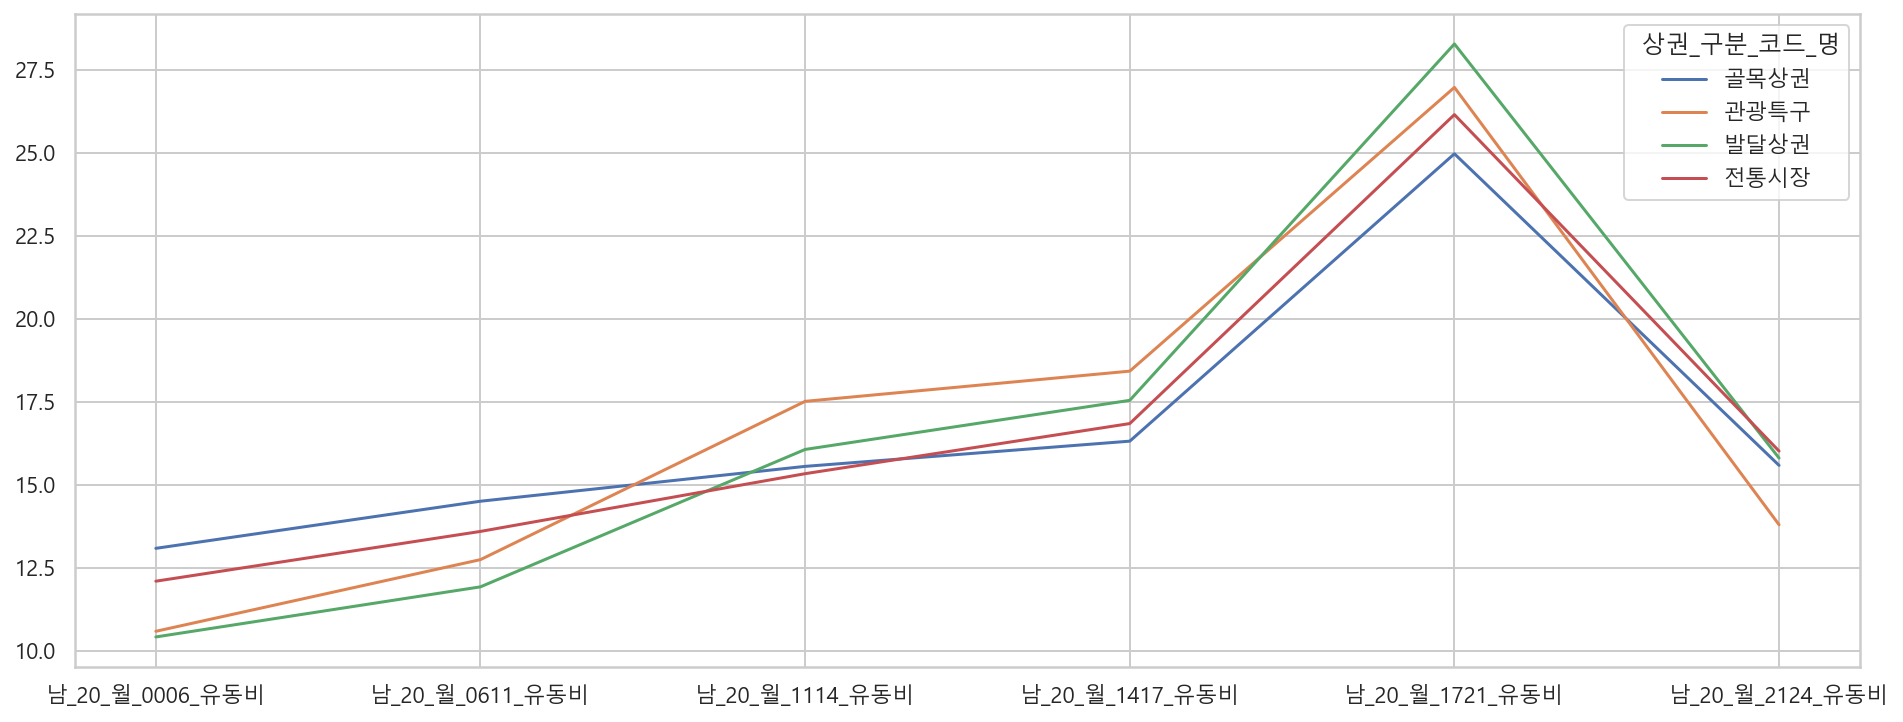

In [38]:
pivot4.plot(figsize=(16,6))
plt.show()

## c. 원본 데이터에서 골목시장 데이터만 분류

In [39]:
street = pop[pop[" 상권_구분_코드_명"] == "골목상권"]
street.reset_index(inplace=True)

In [40]:
street = pd.merge(street, reg, on="상권_코드")
street = pd.merge(street, code, left_on="시군구_코드", right_on="시군구코드")
street["구"] = [gu[:2] if len(gu)<=3 else gu[:3] for gu in street['시군구명']]

In [41]:
street["남_인구_비율"] = round(street["남성_유동인구_수"] / street["총_유동인구_수"] * 100, 2)
street["여_인구_비율"] = round(street["여성_유동인구_수"] / street["총_유동인구_수"] * 100, 2)

In [42]:
piv = pd.pivot_table(street, columns = "구", aggfunc = np.sum)

### 금요일 시간대별 20대 남성 인구 비율
- 관악, 광진, 노원, 은평의 0006 비율이 상대적으로 높고 0611 비율이 낮음
- 강남, 구로, 서초, 성동, 양천, 영등포, 용산은 위와 반대 경향

In [43]:
piv.loc["남_20_금_인구수"] = piv.loc["남성연령대_20_금요일시간대_1_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_2_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_3_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_4_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_5_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_6_유동인구_수"]
piv.loc["남_20_금_0006_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_1_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_0611_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_2_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_1114_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_3_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_1417_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_4_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_1721_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_5_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_2124_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_6_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)

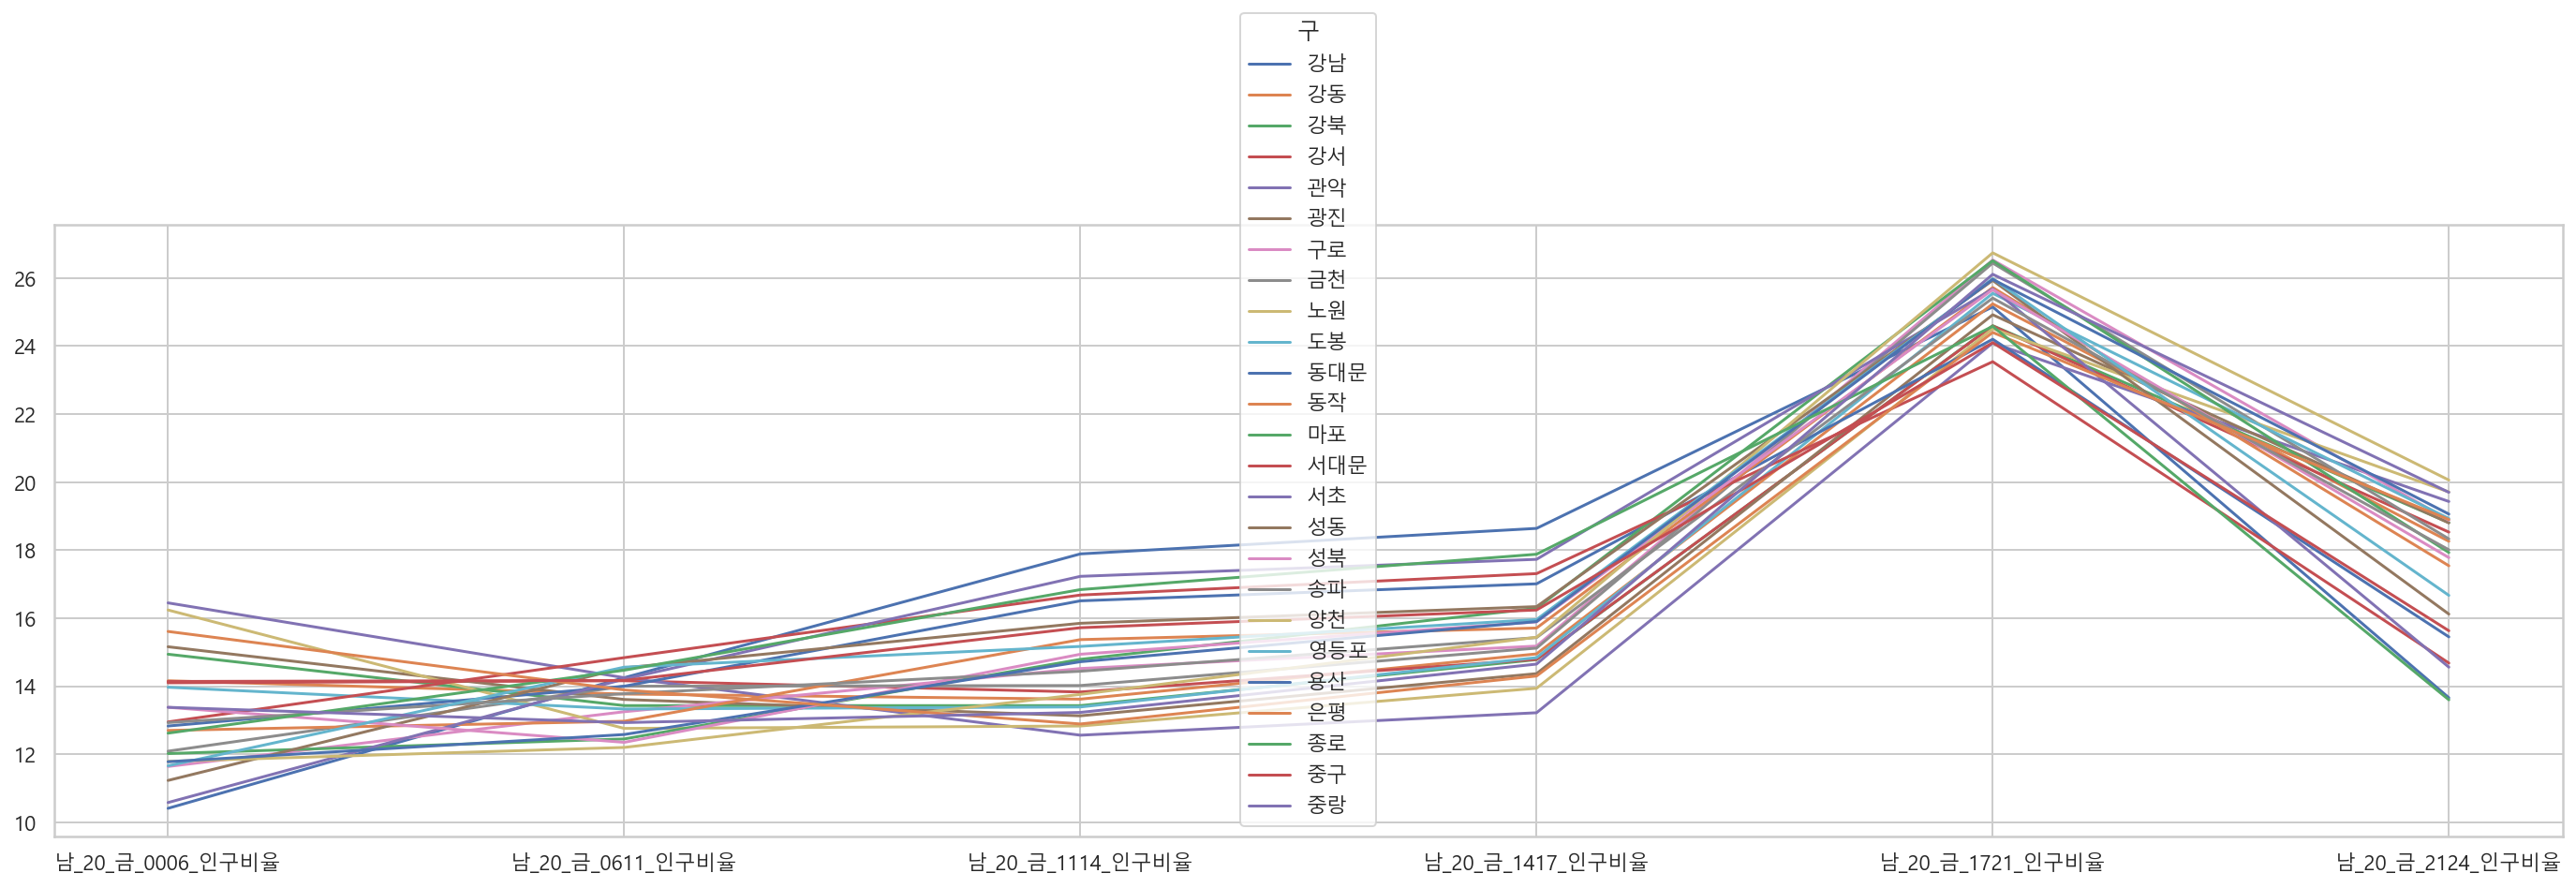

In [44]:
piv.loc[["남_20_금_0006_인구비율", "남_20_금_0611_인구비율", "남_20_금_1114_인구비율", "남_20_금_1417_인구비율", "남_20_금_1721_인구비율", "남_20_금_2124_인구비율"]].plot(figsize = (24,6));

### 시기별 유동 인구수 변화 추이
- 16년도 유동인구가 급격하게 하락한 원인은?

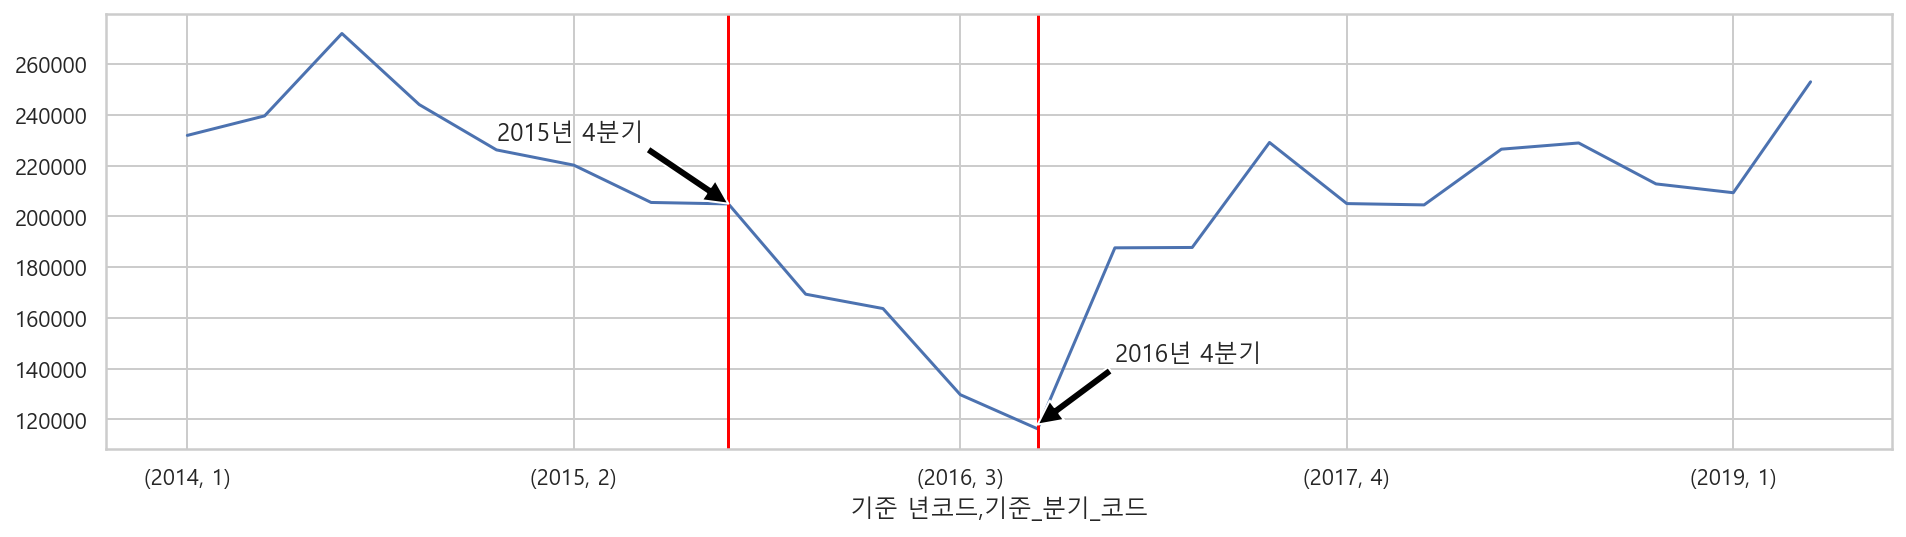

<Figure size 432x288 with 0 Axes>

In [45]:
popul = pd.pivot_table(street, index=["기준 년코드","기준_분기_코드"])
popul["총_유동인구_수"].plot(figsize=(16,4))
plt.axvline(x=7,color='red')
plt.axvline(x=11, color='red')
plt.annotate("2015년 4분기", xy=(7, 205000), xytext=(4, 230000), arrowprops=dict(facecolor='black'))
plt.annotate("2016년 4분기", xy=(11, 118000), xytext=(12, 143000), arrowprops=dict(facecolor='black'))
plt.show()
plt.savefig("연도&분기별 유동인구.png", dpi=300)

# 2. 매출액 데이터 분석

In [46]:
money = pd.read_csv("서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv", encoding = 'euc-kr')
money_pv = money.groupby(money["상권_코드"]).sum()
street_pv = street.groupby(street["상권_코드"]).sum()
popmoney = pd.merge(street_pv, money_pv, left_index = True, right_index = True)

In [47]:
ybp_df= pd.read_csv('ybp_df.csv', encoding = 'utf-8')

### 구별 매출 데이터 지도
- 강남 3구 + 성동구 상권의 매출이 눈에 띄게 높음

In [48]:
import folium 
import json
gu_dfp = pd.read_csv('gu_dfp.csv', encoding = 'utf-8')
gu_dfp.reset_index(drop=False,inplace=True)
geo_path = './03_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502,126.982], zoom_start=10.5)

folium.Choropleth(
    geo_data=geo_str,
    data= gu_dfp, columns=['구','당월매출'],
   # nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='YlOrRd',
    legend_name='당월_매출_금액',
).add_to(my_map)
my_map

In [49]:
df4 = pd.read_csv('./df4.csv')
df_5 = pd.read_csv('./df_5.csv')
df6 = pd.read_csv('./df6.csv')
df7 = pd.read_csv('./df7.csv')
df7_1 = pd.read_csv('./df7_1.csv')
df_8 = pd.read_csv('./df_8.csv')

### 구에 따른 점포수당 매출
- <중랑구, 강북구>보다  <강남구, 서초구>에서 약 1.5 배이상 높게 매출이 나타남

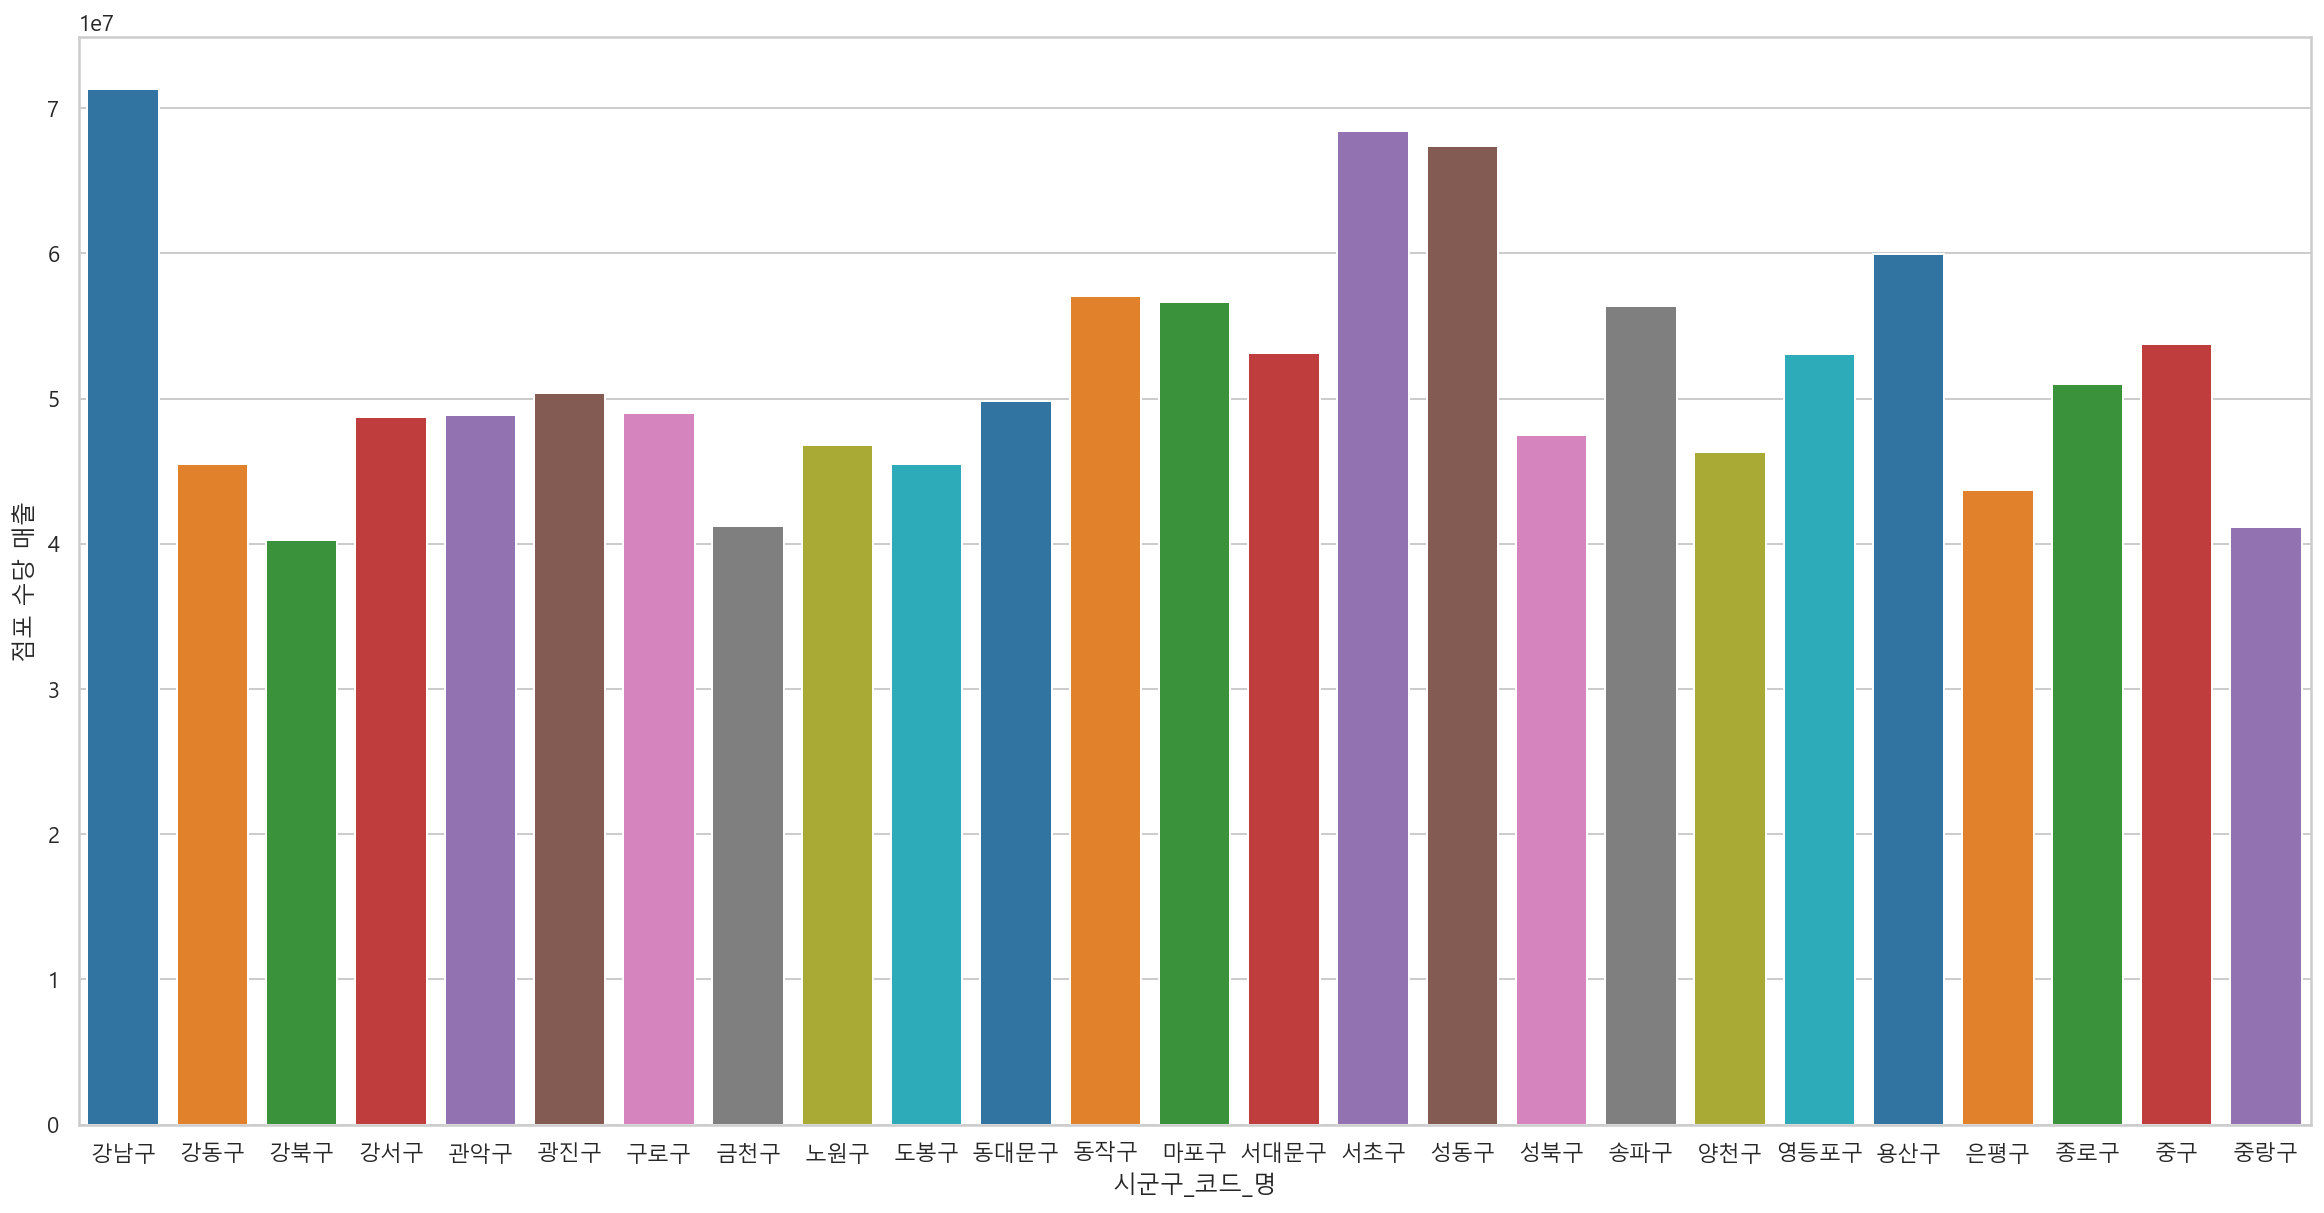

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='시군구_코드_명', y='점포 수당 매출', data = df_5, ci = None, palette="tab10")
plt.show()

### 구에 따른 총 직장 인구 수
- 매출이 높았던 <강남구, 서초구>가 직장인 수가 많았고, <강북구,중랑구>가 적은 직장인구수를 나타냄

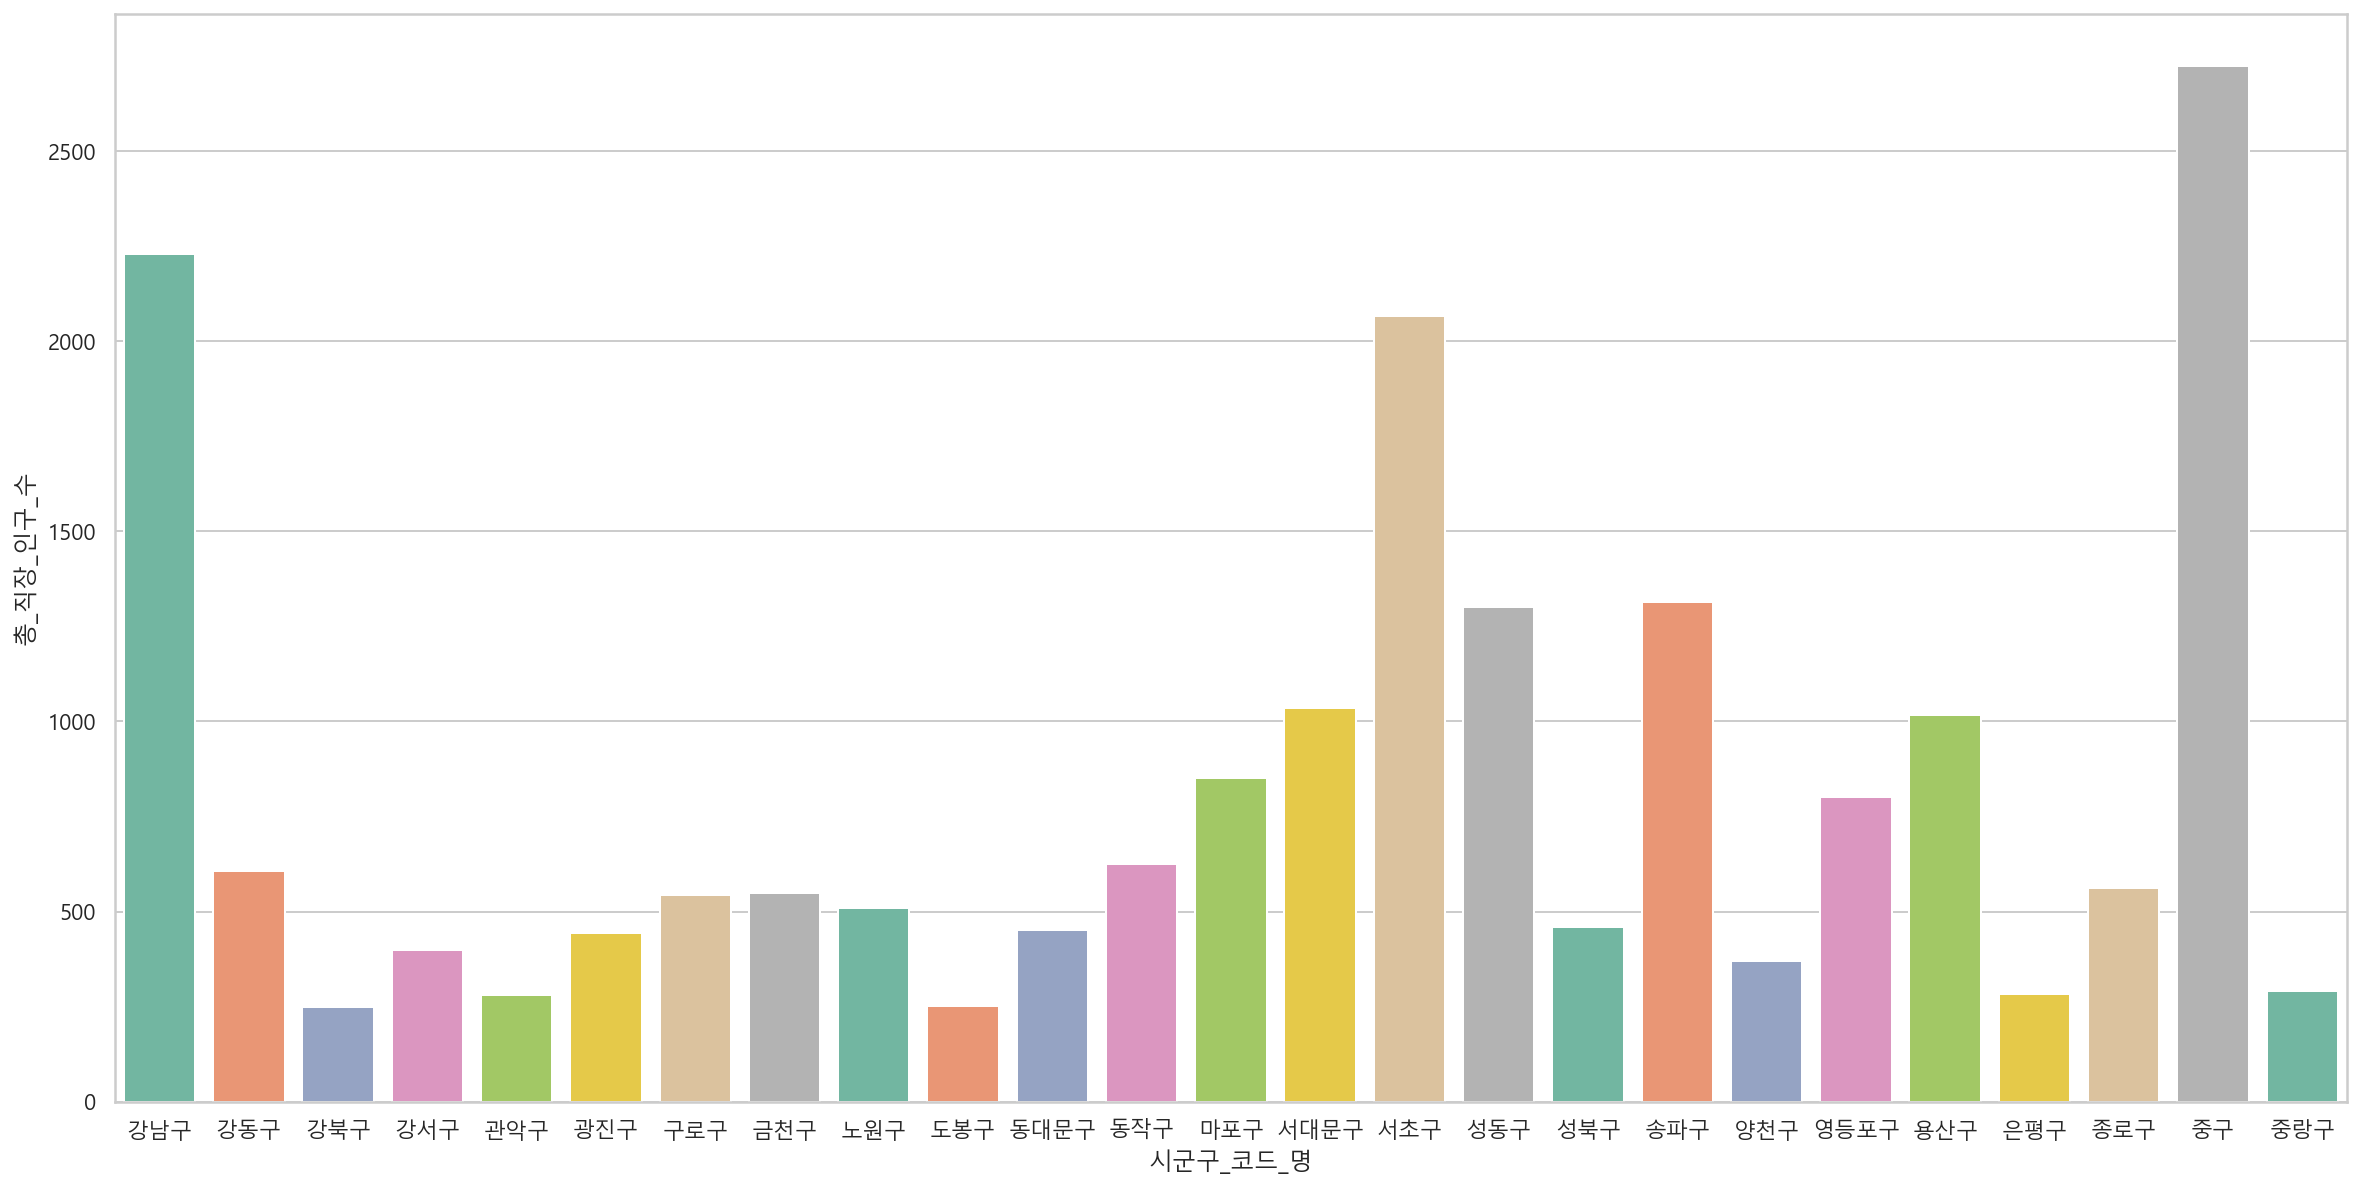

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='시군구_코드_명', y='총_직장_인구_수', data = df6, ci = None, palette="Set2")
plt.show()

### 직장인 수와 매출간의 상관관계 분석
- -0.18의 낮은 상관관계를 갖음

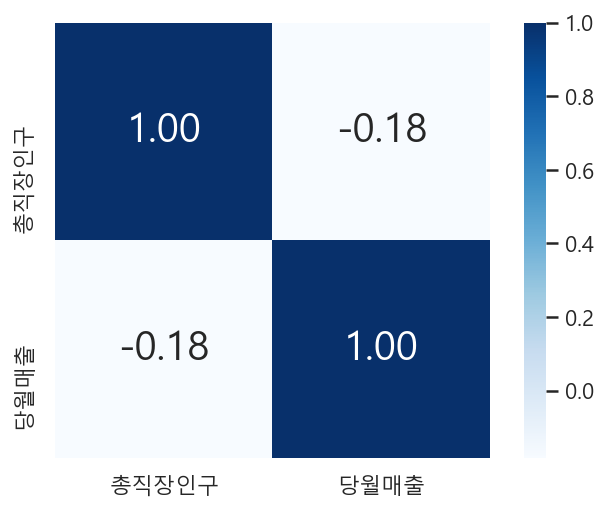

In [52]:
ybp_df= pd.read_csv('ybp_df.csv', encoding = 'utf-8')
ybp_df = ybp_df[['년','총직장인구']]
sales_df= pd.read_csv('sales_df.csv', encoding = 'utf-8')
sales_df = sales_df[['년','당월매출']]
result = pd.merge(ybp_df,sales_df, on='년')
corr = result[["총직장인구","당월매출"]].corr(method = 'pearson')
ys_hmp = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

### 구에 따른 총 상주인구 수(평균)
- <강남구, 서초구>가 <강북구, 중랑구>보다 총 상주인구 수가 적음

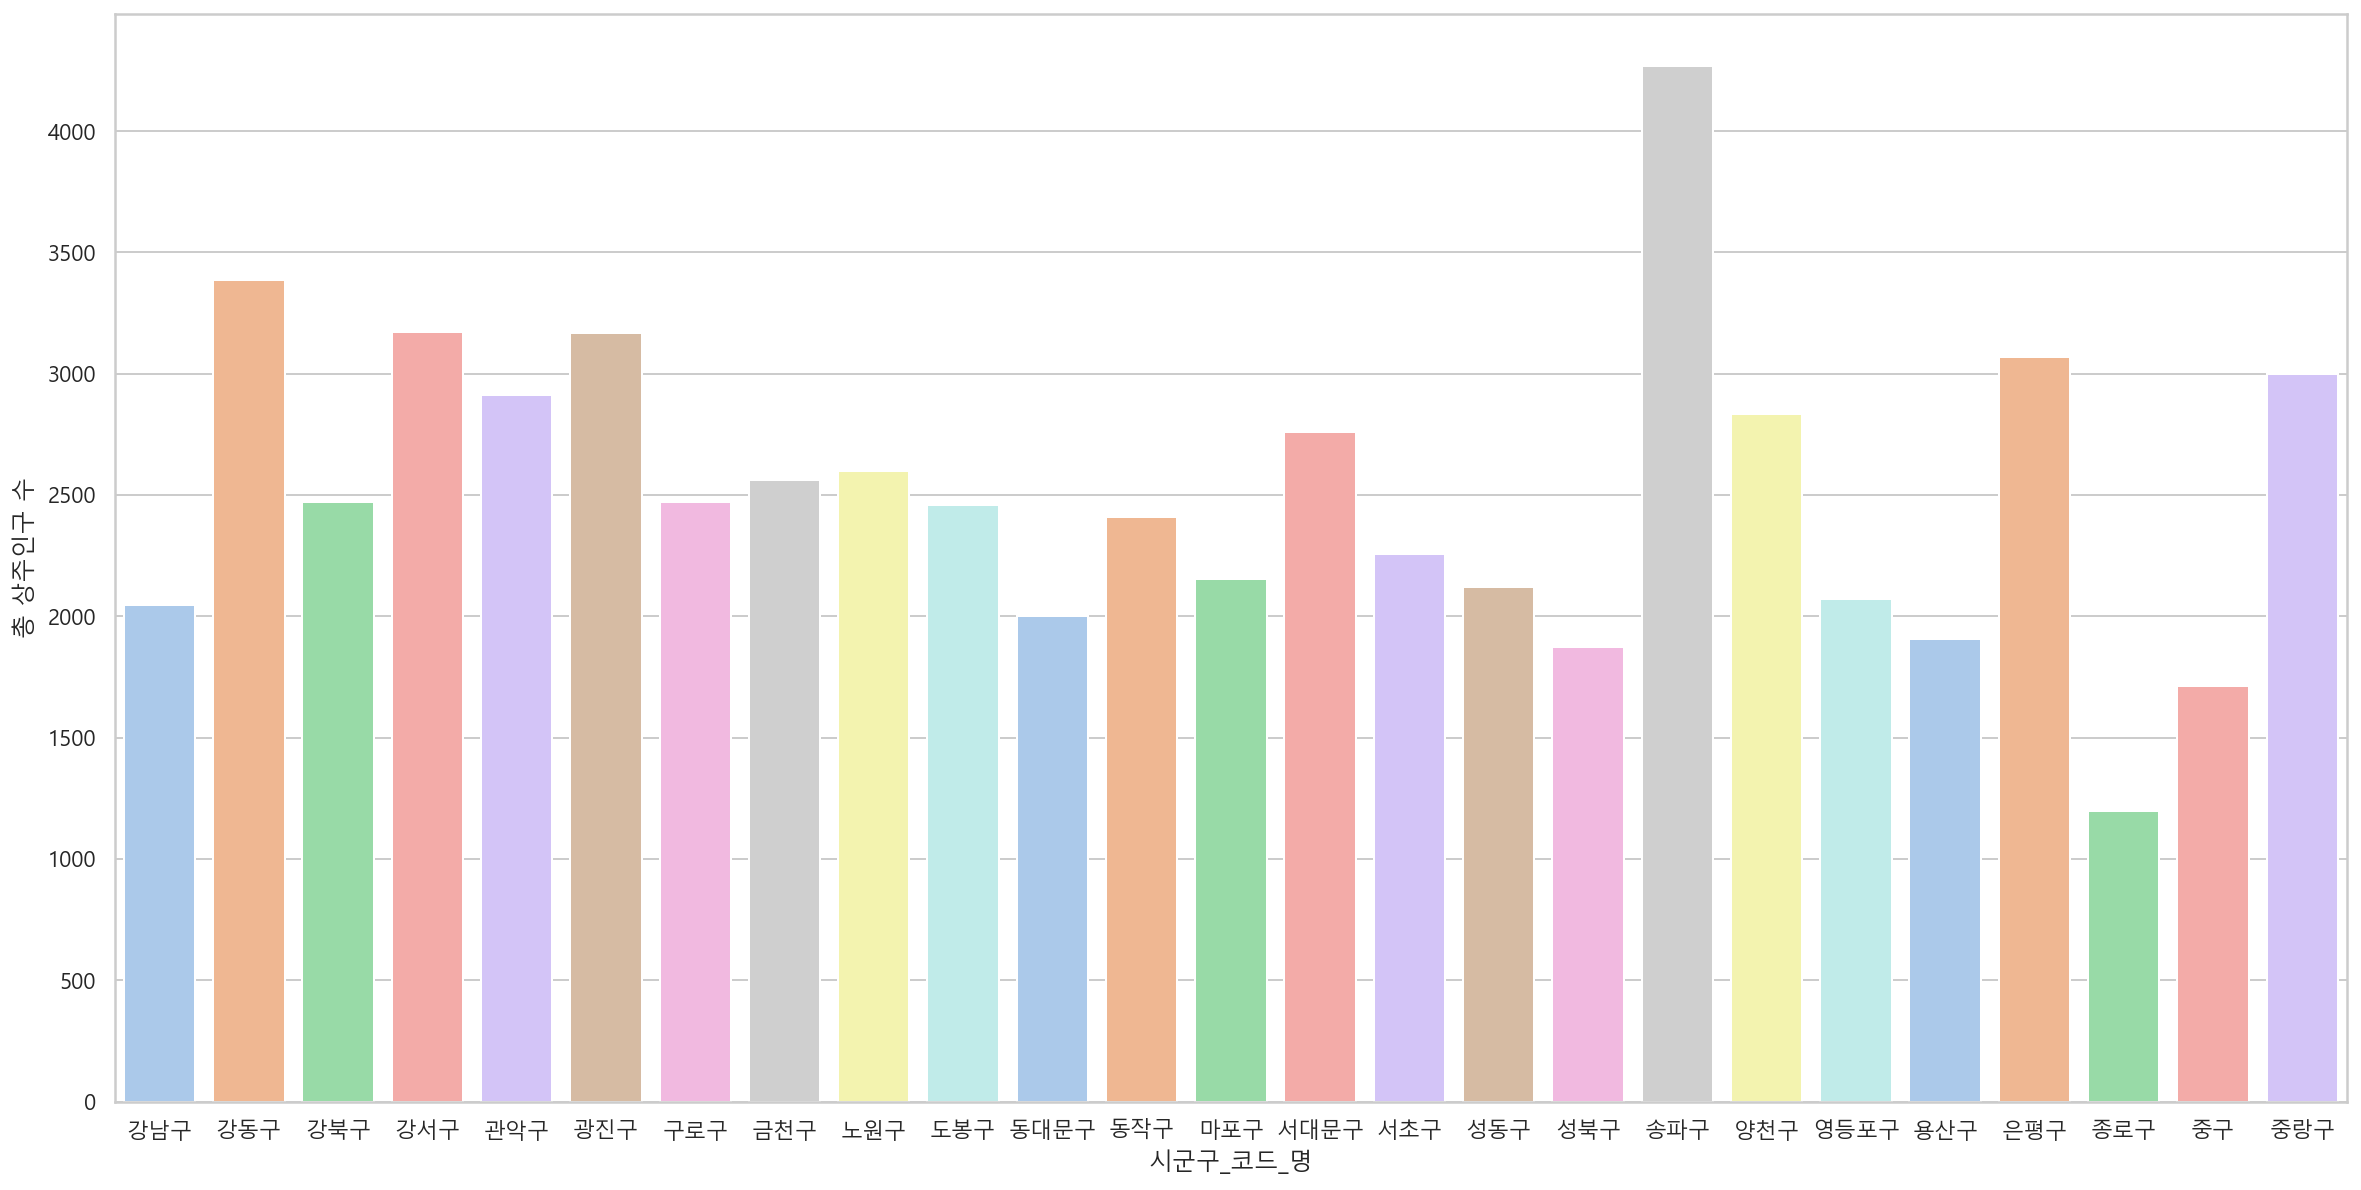

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='시군구_코드_명', y='총 상주인구 수', data = df7_1, ci = None, palette="pastel")
plt.show()

### 매출 상위 두개 구의 업종별 매출

### 강남구
- 주유소가 점포수당 매출이 제일 높음

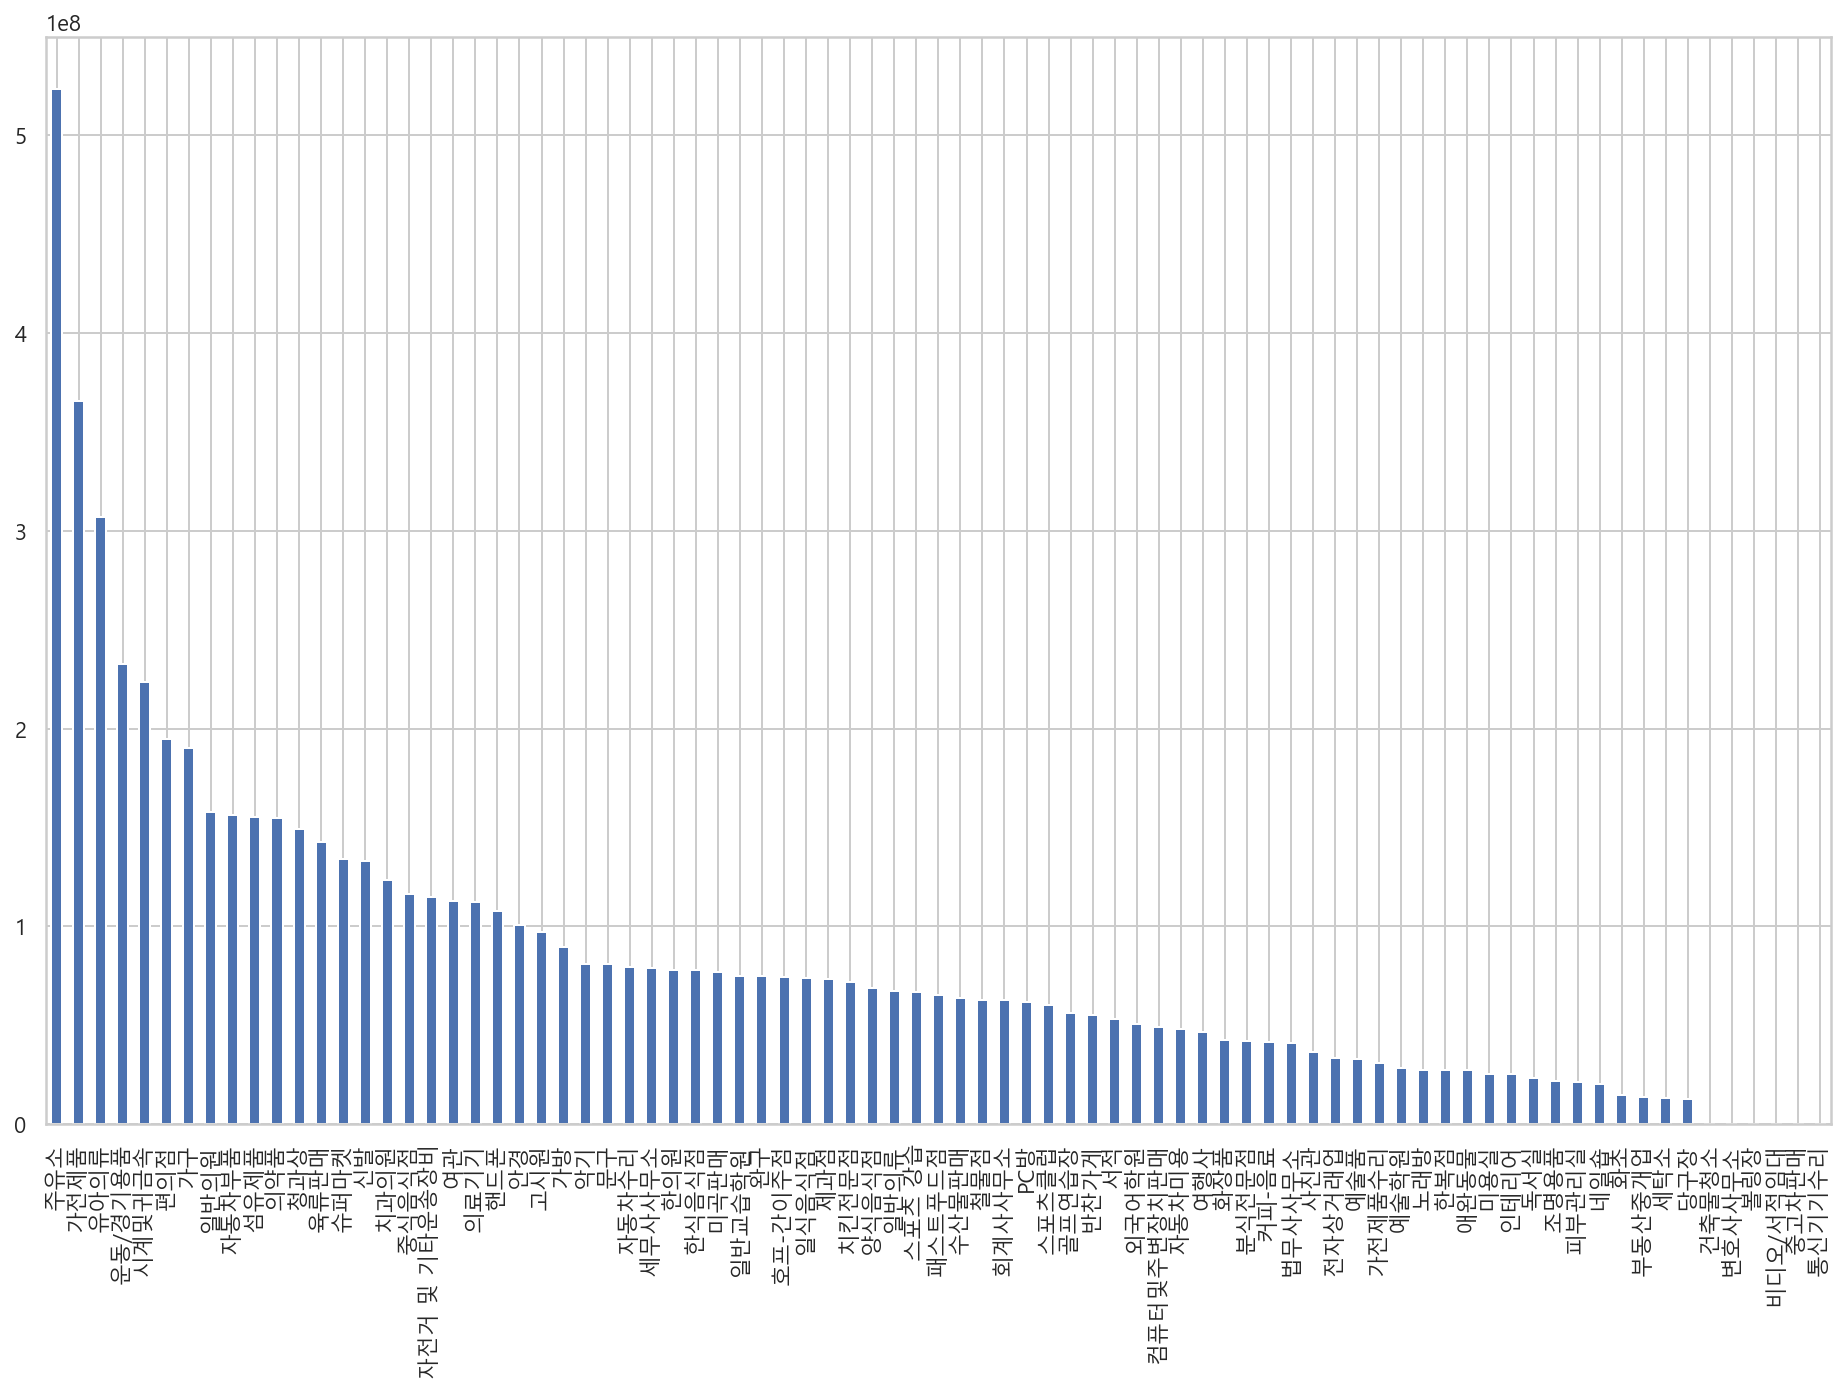

In [54]:
df_8.set_index('시군구_코드_명', inplace=True)
df_8.loc['강남구'].sort_values(ascending=False).plot(kind='bar', figsize=(16, 10))

### 서초구
- 주유소가 점포 수당 매출이 제일 높음

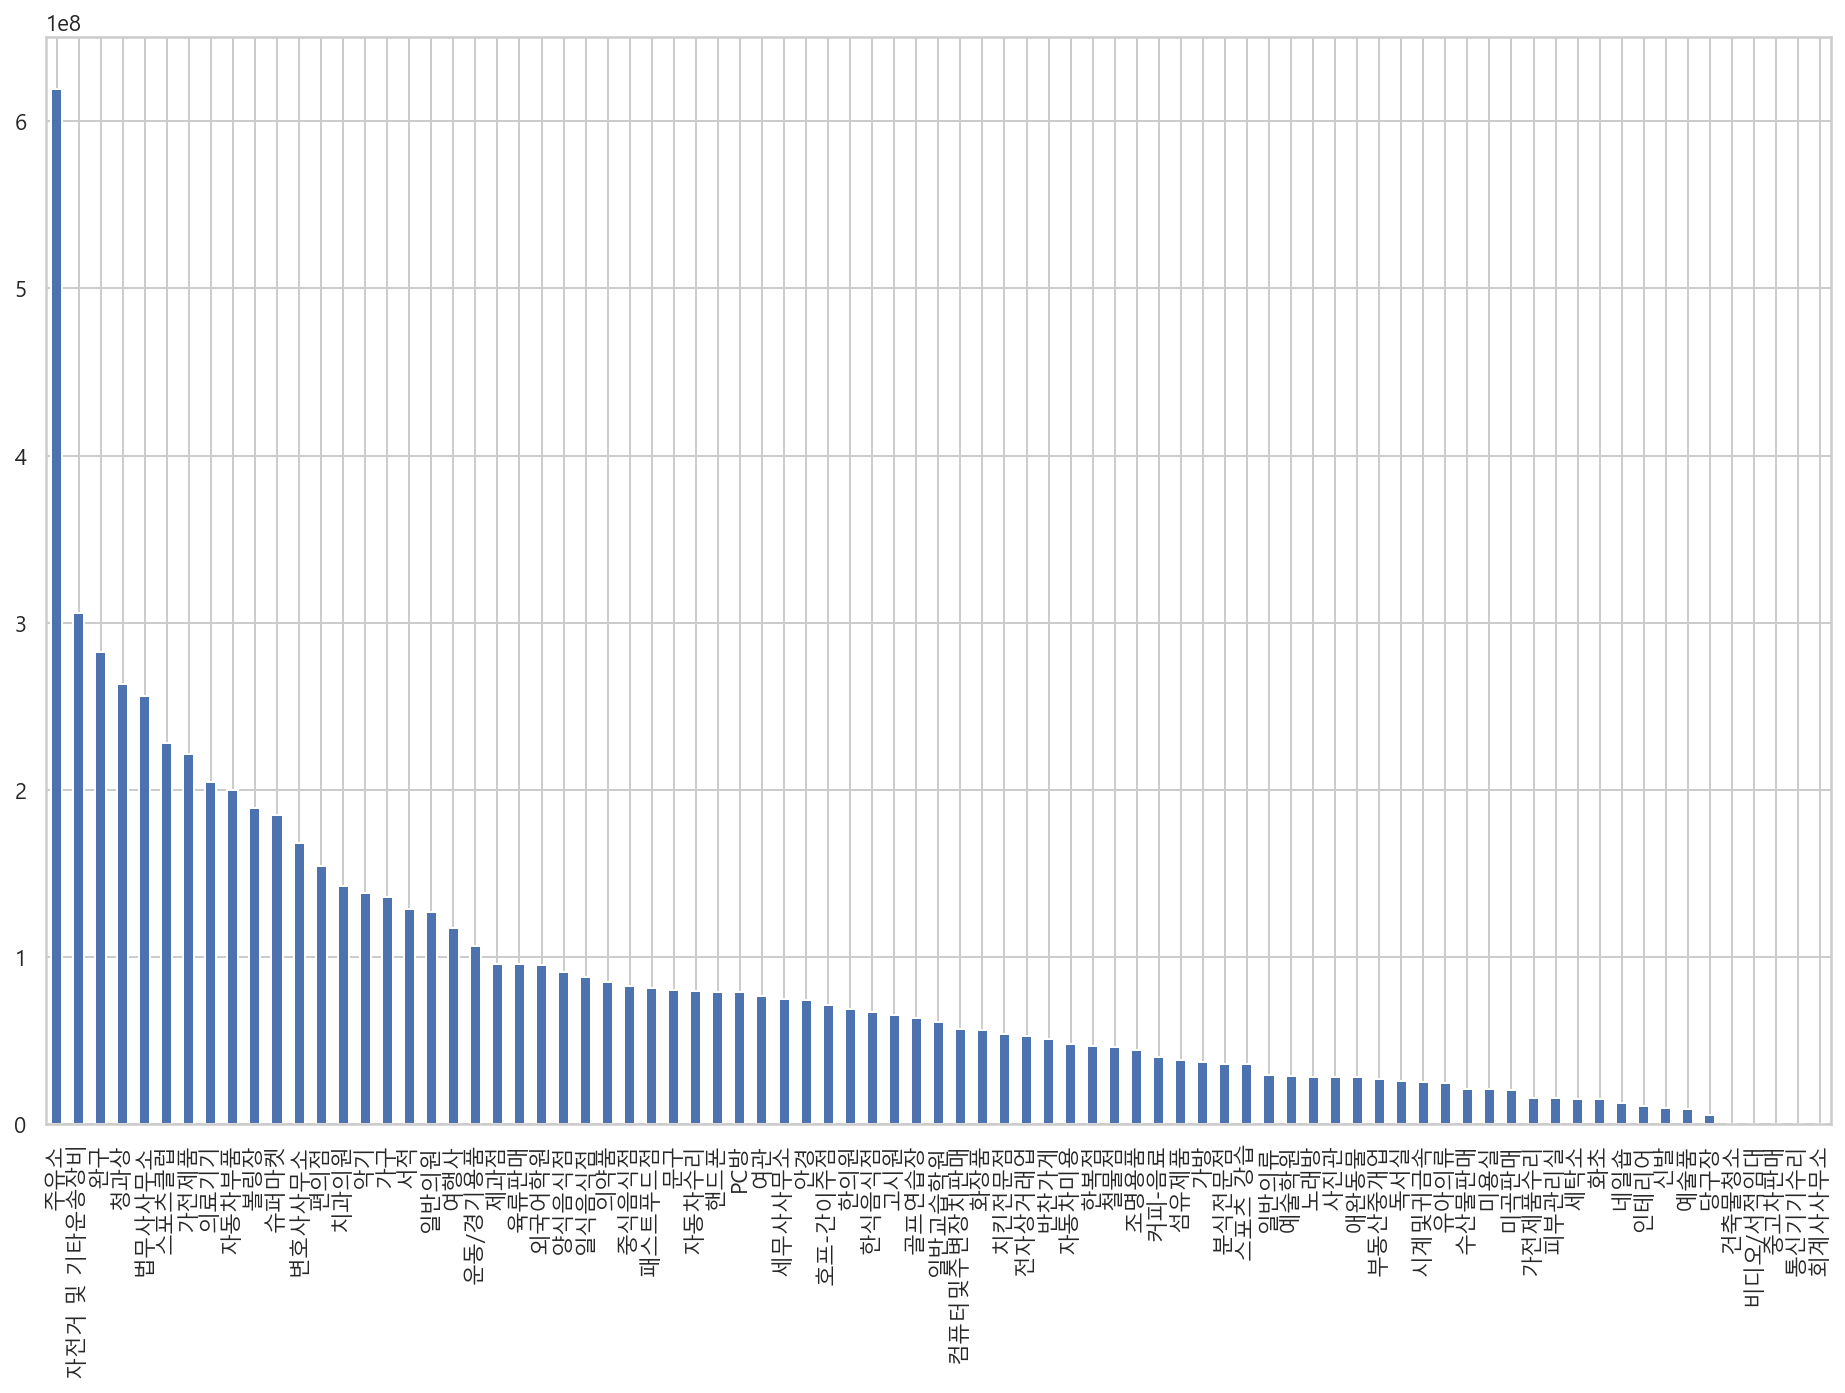

In [55]:
df_8.loc['서초구'].sort_values(ascending=False).plot(kind='bar', figsize=(16, 10));

### 매출 하위 두개 구

### 강북구

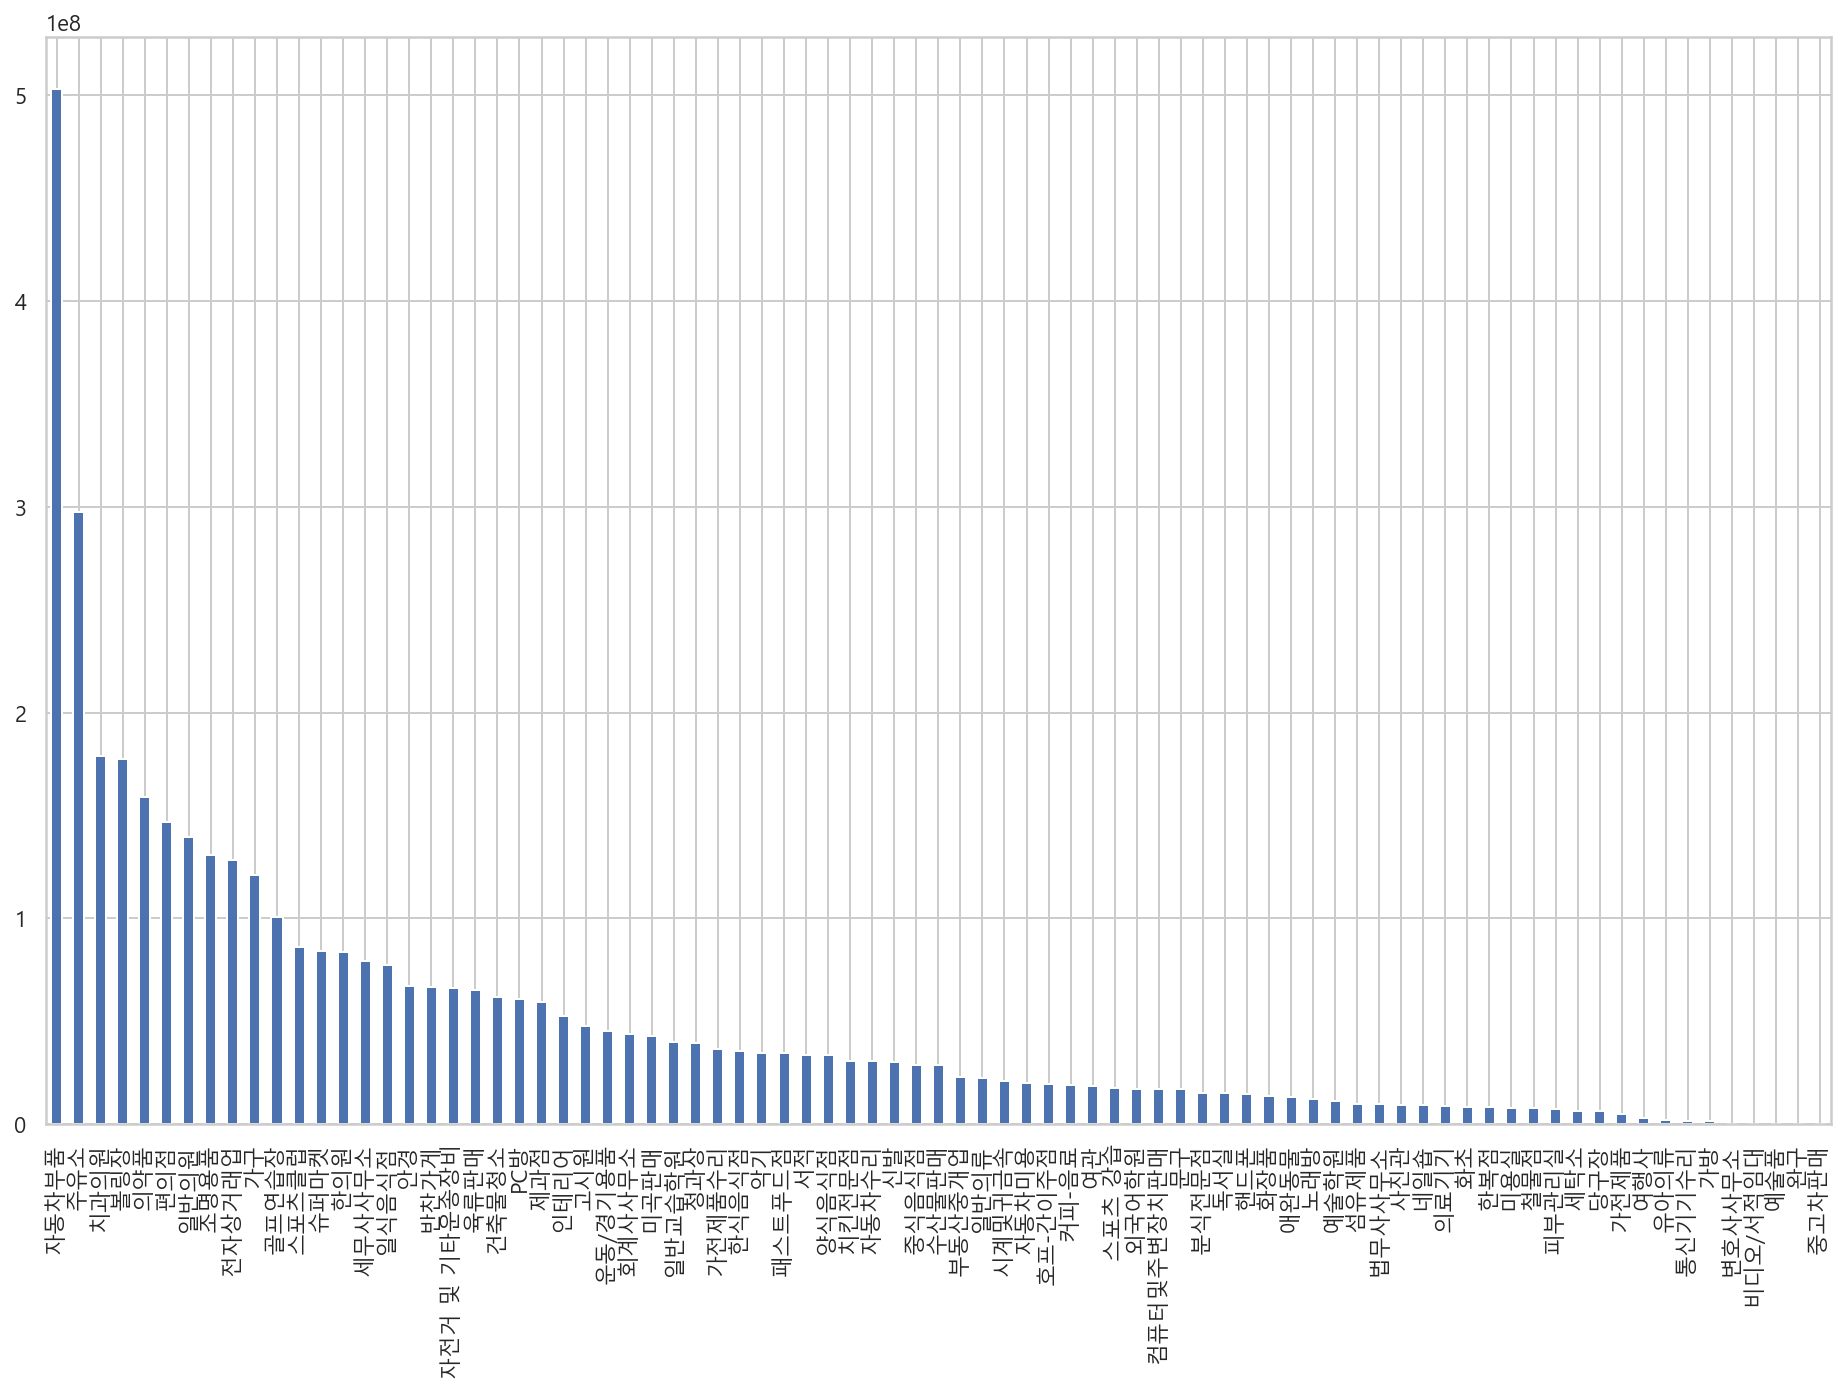

In [56]:
df_8.loc['강북구'].sort_values(ascending=False).plot(kind='bar', figsize=(16, 10));

### 중랑구

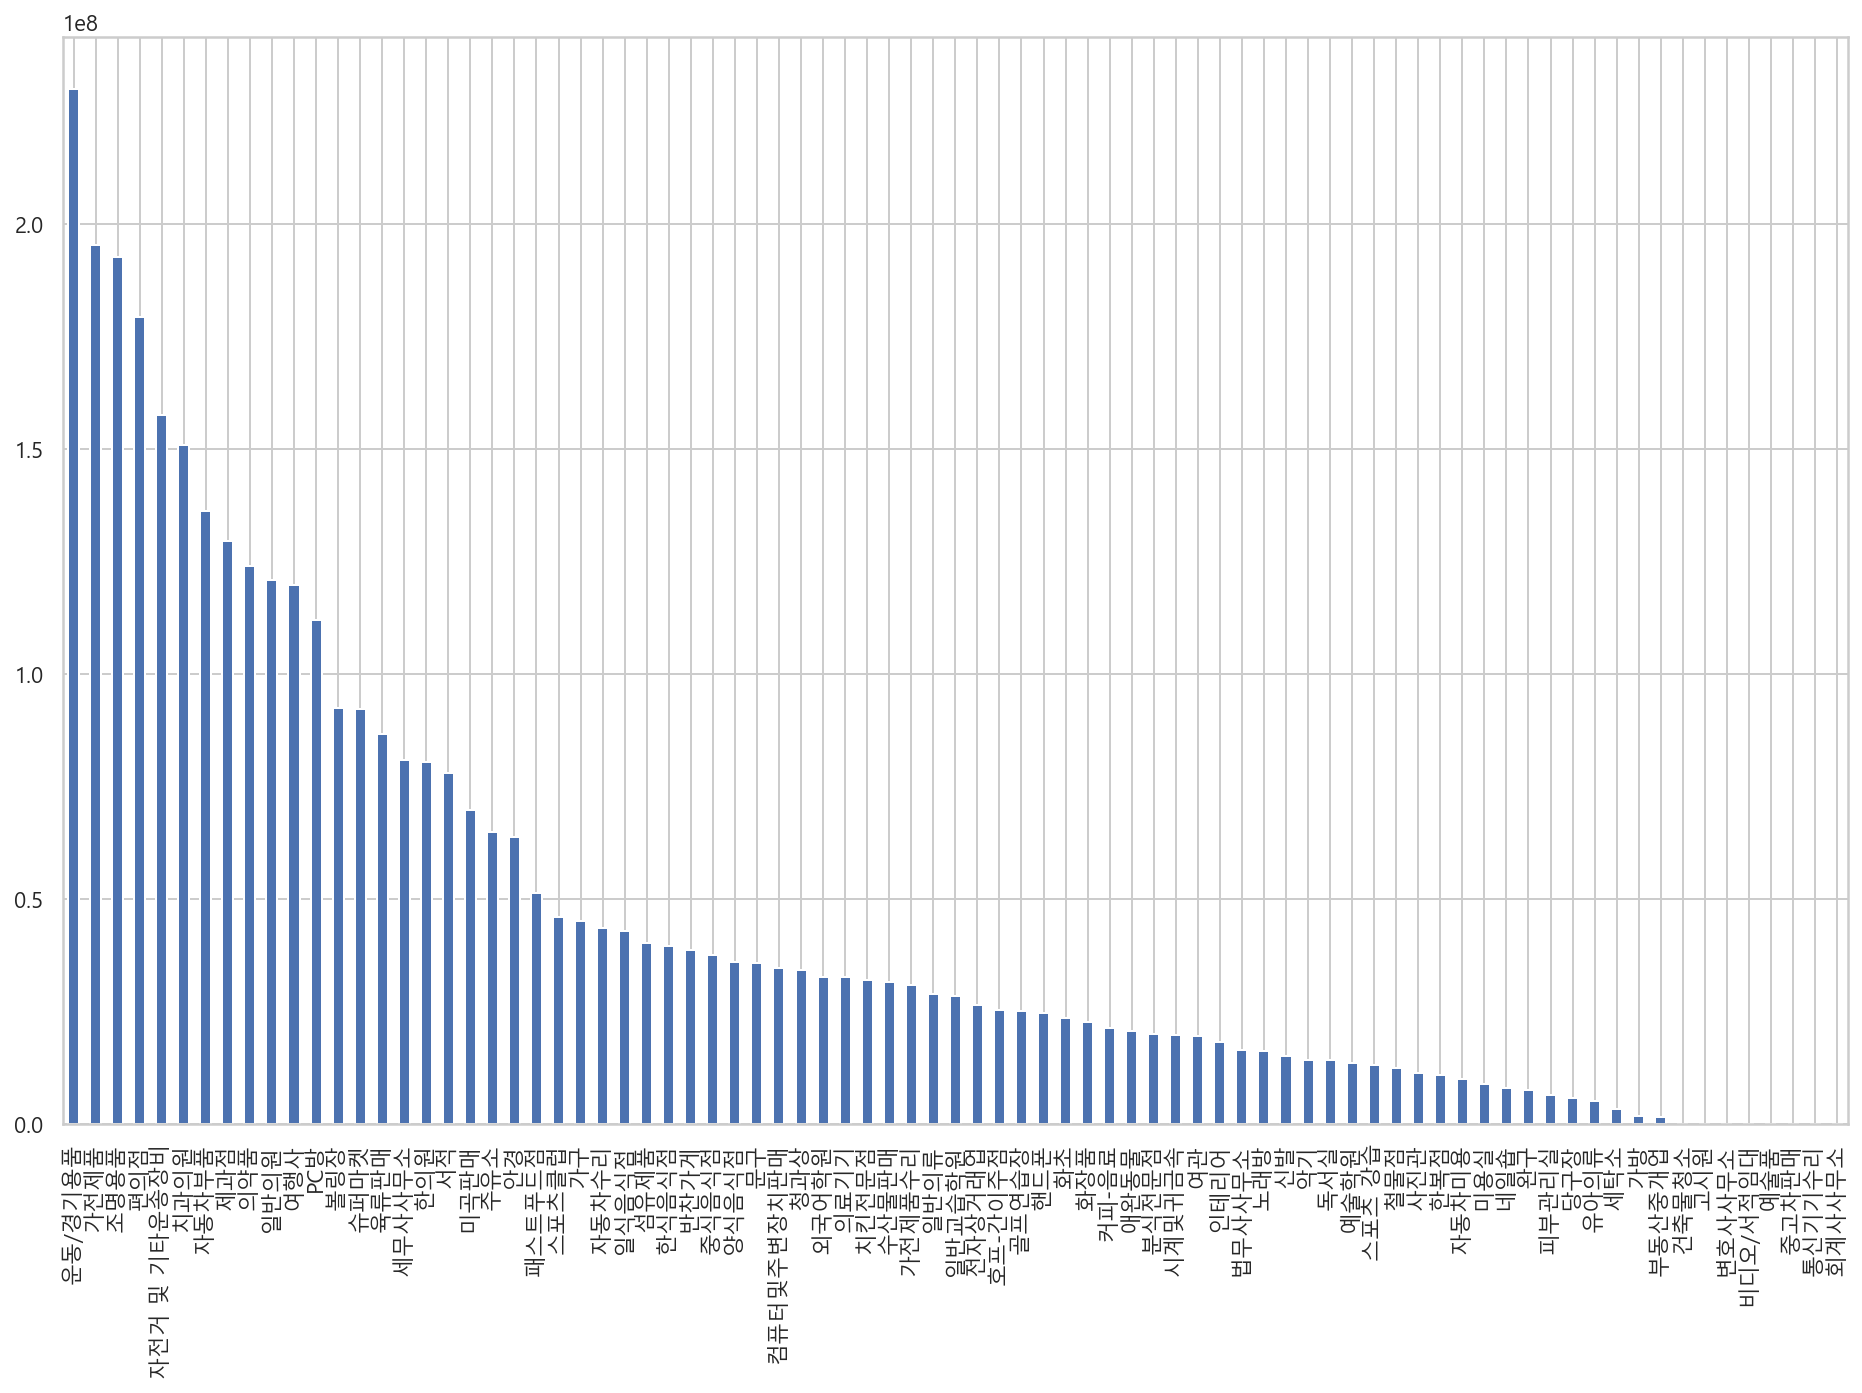

In [57]:
df_8.loc['중랑구'].sort_values(ascending=False).plot(kind='bar', figsize=(16, 10));

### 연령별 점포 수당 매출 금액(평균)
- 10대와 60대 이상의 매출금액이 낮게 나타남

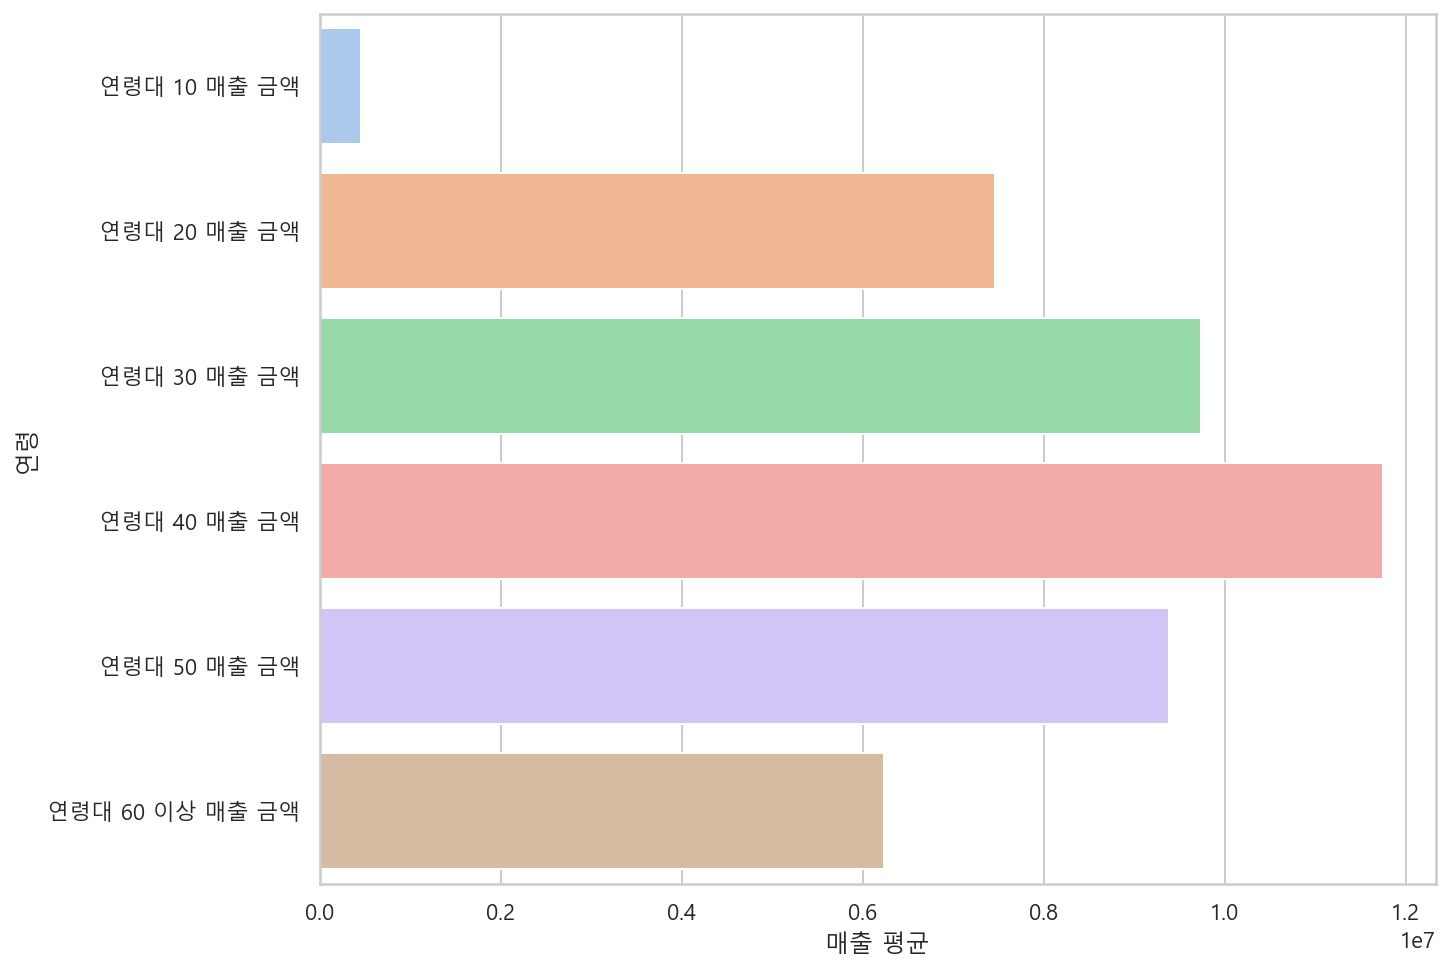

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x='매출 평균', y='연령', data=df4, palette='pastel')
plt.show()

### 연령대별 상권 상주인구 수(평균)
- 매출 금액이 낮게 나타나던 10대는 인구 수도 적은데 비해, 60대 이상은 다른 연령대보다 낮은 매출 금액을 나타내지만 인구 수는 다른 연령대보다 전반적으로 높게 나타남

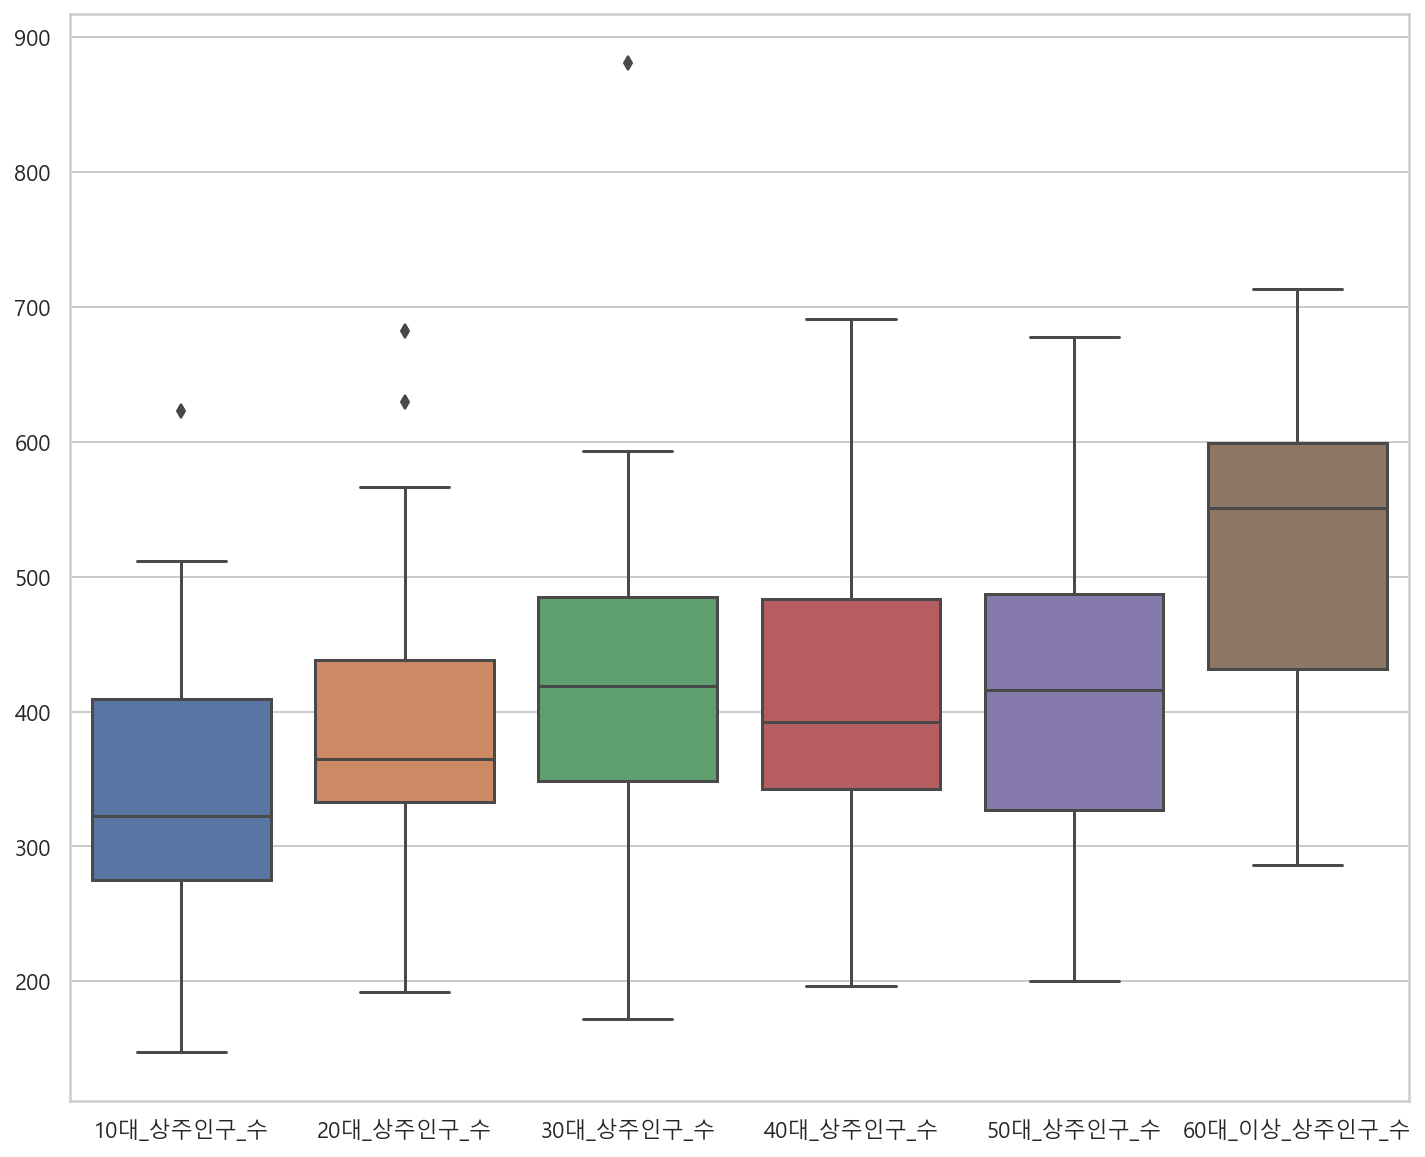

In [59]:
df7.columns = ['시군구_코드_명','10대_상주인구_수','20대_상주인구_수','30대_상주인구_수','40대_상주인구_수','50대_상주인구_수','60대_이상_상주인구_수']
plt.figure(figsize=(12,10))
sns.boxplot(data=df7)
plt.show()

# 3. 유동인구 & 매출액 데이터 결합 분석

### 유동인구 & 매출액 상관관계
- 유동인구와 매출액의 상관 관계가 낮아보임

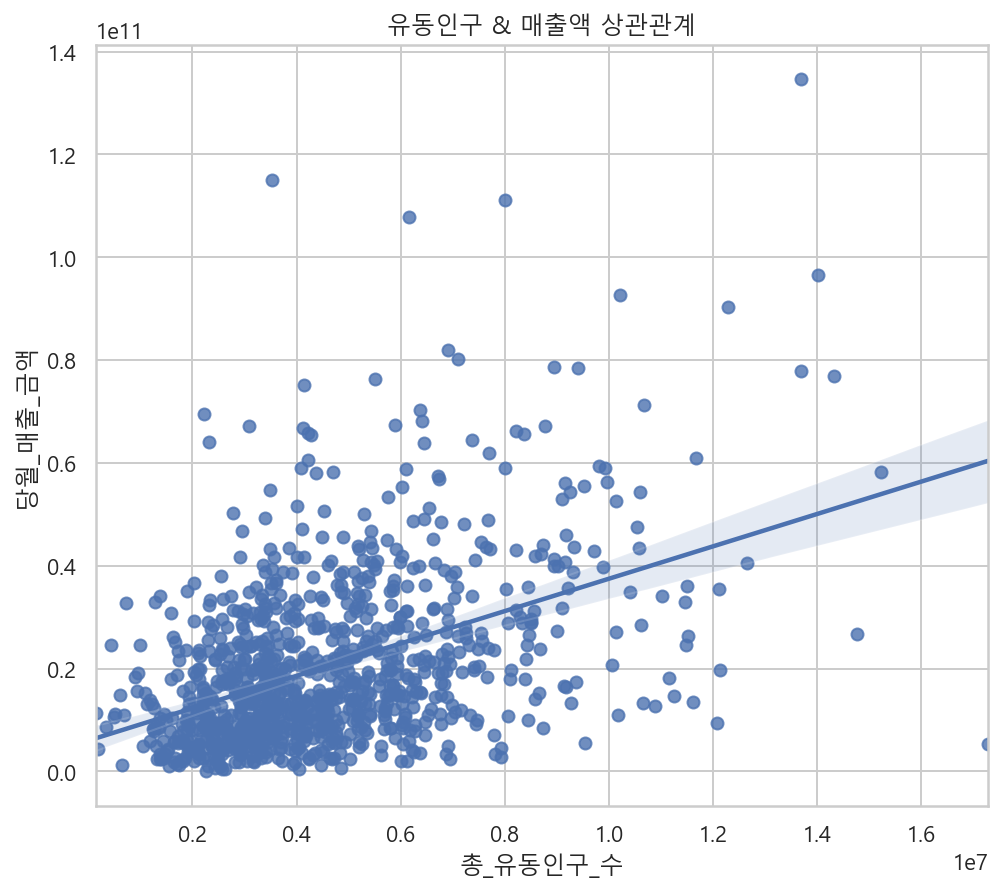

In [60]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.regplot(x="총_유동인구_수", y="당월_매출_금액", data=popmoney)
plt.title("유동인구 & 매출액 상관관계")
plt.show()

### 연령대별 유동인구 1인당 매출액
- 10대가 가장 낮고 연령대 상승에 따라 매출액 동반 상승(50대 제외)
- 10대는 유동 인구 대비 소비를 많이 안 한다.

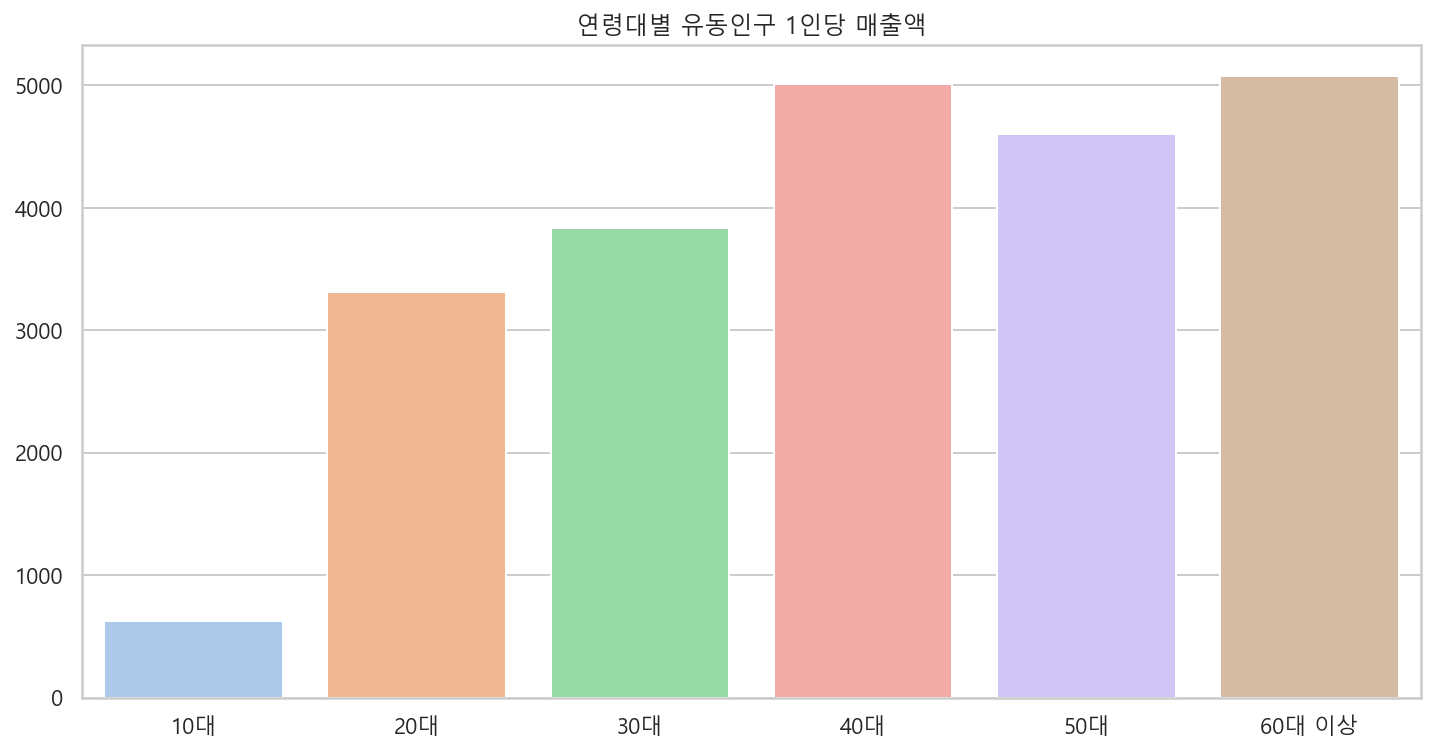

In [61]:
data = pd.DataFrame(columns=["10대", "20대", "30대", "40대", "50대", "60대 이상"])
data.loc[0] = [popmoney["연령대_10_매출_금액"].sum()/popmoney["연령대_10_유동인구_수"].sum(),
      popmoney["연령대_20_매출_금액"].sum()/popmoney["연령대_20_유동인구_수"].sum(),
      popmoney["연령대_30_매출_금액"].sum()/popmoney["연령대_30_유동인구_수"].sum(),
      popmoney["연령대_40_매출_금액"].sum()/popmoney["연령대_40_유동인구_수"].sum(),
      popmoney["연령대_50_매출_금액"].sum()/popmoney["연령대_50_유동인구_수"].sum(),
popmoney["연령대_60_이상_매출_금액"].sum()/popmoney["연령대_60_이상_유동인구_수"].sum()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = data, ci = None, palette="pastel")
plt.title("연령대별 유동인구 1인당 매출액")
plt.show()

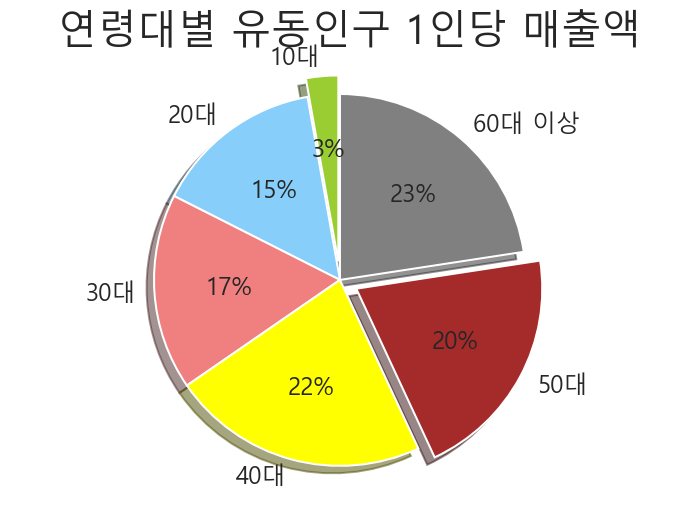

In [62]:
labels = ["10대", "20대", "30대", "40대", "50대", "60대 이상"]
sizes = [data for data in data.loc[0]]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral', 'yellow', 'brown', 'grey']
explodes = (0.1, 0, 0, 0, 0.1, 0)
plt.pie(sizes, explode=explodes, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.axis('equal')
plt.title("연령대별 유동인구 1인당 매출액", fontsize=20)
plt.show()

### 유동인구 성별 대비 매출액
- 남성이 여성보다 조금 더 높음

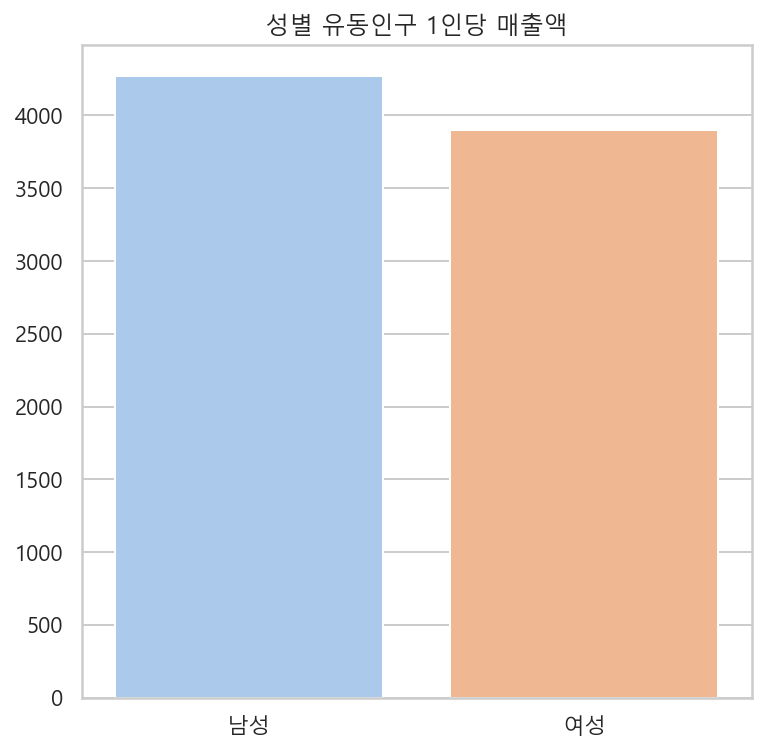

In [63]:
data = pd.DataFrame(columns=["남성", "여성"])
data.loc[0] = [popmoney["남성_매출_금액"].sum()/popmoney["남성_유동인구_수"].sum(),
      popmoney["여성_매출_금액"].sum()/popmoney["여성_유동인구_수"].sum()]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data = data, ci = None, palette="pastel", )
plt.title("성별 유동인구 1인당 매출액")
plt.show()

### 유동인구 시간대 대비 매출액
- 새벽 아침 시간대가 많이 낮음
- 저녁 시간대도 의외로 매출 낮음

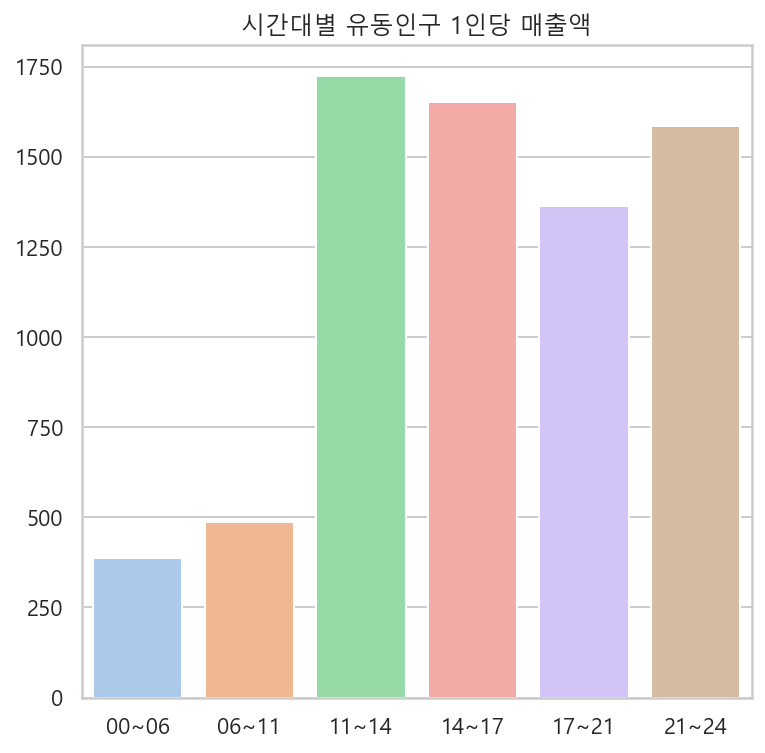

In [64]:
data = pd.DataFrame(columns=["00~06", "06~11", "11~14", "14~17", "17~21", "21~24"])
data.loc[0] = [(popmoney["시간대_00~06_매출_금액"].sum()/popmoney["시간대_1_유동인구_수"].sum())/6,
(popmoney["시간대_06~11_매출_금액"].sum()/popmoney["시간대_2_유동인구_수"].sum())/5,
(popmoney["시간대_11~14_매출_금액"].sum()/popmoney["시간대_3_유동인구_수"].sum())/3,
(popmoney["시간대_14~17_매출_금액"].sum()/popmoney["시간대_4_유동인구_수"].sum())/3,
(popmoney["시간대_17~21_매출_금액"].sum()/popmoney["시간대_5_유동인구_수"].sum())/4,
(popmoney["시간대_21~24_매출_금액"].sum()/popmoney["시간대_6_유동인구_수"].sum())/3]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data = data, ci = None, palette="pastel")
plt.title("시간대별 유동인구 1인당 매출액")
plt.show()

### 유동인구 요일 대비 매출액
- 토요일이 눈에 띄게 높음
- 일요일이 가장 낮음

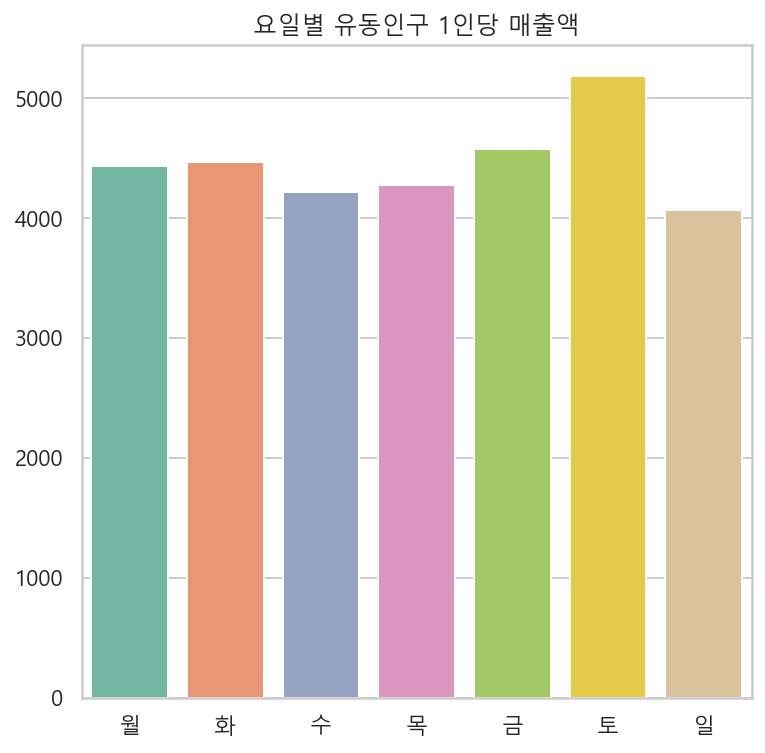

In [65]:
data = pd.DataFrame(columns=["월", "화", "수", "목", "금", "토", "일"])
data.loc[0] = [round(popmoney["월요일_매출_금액"].sum() / popmoney["월요일_유동인구_수"].sum()),
round(popmoney["화요일_매출_금액"].sum() / popmoney["화요일_유동인구_수"].sum()),
round(popmoney["수요일_매출_금액"].sum() / popmoney["수요일_유동인구_수"].sum()),
round(popmoney["목요일_매출_금액"].sum() / popmoney["목요일_유동인구_수"].sum()),
round(popmoney["금요일_매출_금액"].sum() / popmoney["금요일_유동인구_수"].sum()),
round(popmoney["토요일_매출_금액"].sum() / popmoney["토요일_유동인구_수"].sum()),
round(popmoney["일요일_매출_금액"].sum() / popmoney["일요일_유동인구_수"].sum())]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data = data, ci = None, palette="Set2")
plt.title("요일별 유동인구 1인당 매출액")
plt.show()